Let's make the label categorical based on the students' score:
- 1: Below 400; 
- 2: At or above 400 but below 475; 
- 3: At or above 475 but below 550; 
- 4: At or above 550 but below 625; 
- 5: At or above 625


In [1]:
# In order to be able to import config from a parent directory
import sys
sys.path.append("..")
print(sys.path)

['/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/Second_attempts', '/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python311.zip', '/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11', '/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/lib-dynload', '', '/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages', '..']


In [2]:
import pandas as pd
import numpy as np
import config

In [4]:
df_g8_data = pd.read_csv(config.ml_data_1, index_col=False)

In [5]:
df_g8_data.sample()

,BSBG05D,BSBG04,BSBG13E,BSBG13D,BSBG14A,BSBM16A,BSBM17D,BSBM18C,BSBM20E,BSBM20I,mean_PV
7734,Yes,None or very few (0–10 books),Agree a lot,Agree a lot,At least once a week,Agree a little,Agree a lot,Every or almost every lesson,Agree a little,Disagree a little,366.926422


Let's make the label categorical based on the students' mean_PV:
- 1: Below 400; 
- 2: At or above 400 but below 475; 
- 3: At or above 475 but below 550; 
- 4: At or above 550 but below 625; 
- 5: At or above 625

In [6]:
# create a list of our conditions
conditions = [
    (df_g8_data['mean_PV'] < 400),
    (df_g8_data['mean_PV'] >= 400) & (df_g8_data['mean_PV'] < 475),
    (df_g8_data['mean_PV'] >= 475) & (df_g8_data['mean_PV'] < 550),
    (df_g8_data['mean_PV'] >= 550) & (df_g8_data['mean_PV'] < 625),
    (df_g8_data['mean_PV'] >= 625)
]

In [7]:
# create a list of the values we want to assign for each condition

values = ['1','2','3','4','5']

In [8]:
df_g8_data['score_category'] = np.select(conditions, values)

In [9]:
df_g8_data.sample(10)

,BSBG05D,BSBG04,BSBG13E,BSBG13D,BSBG14A,BSBM16A,BSBM17D,BSBM18C,BSBM20E,BSBM20I,mean_PV,score_category
6196,Yes,None or very few (0–10 books),Agree a lot,Disagree a lot,Never,Disagree a lot,Agree a lot,About half the lessons,Disagree a little,Agree a little,331.739518,1
1098,No,Enough to fill two bookcases (101–200 books),Disagree a lot,Disagree a little,At least once a week,Agree a lot,Agree a lot,Never,Agree a little,Agree a lot,469.383548,2
115,Yes,None or very few (0–10 books),Agree a lot,Agree a little,Never,Agree a lot,Agree a lot,Every or almost every lesson,Agree a lot,Agree a lot,360.194564,1
5014,Yes,None or very few (0–10 books),Agree a lot,Agree a lot,A few times a year,Agree a little,Agree a lot,Some lessons,Disagree a little,Disagree a little,342.567036,1
1548,Yes,None or very few (0–10 books),Disagree a lot,Disagree a lot,Once or twice a month,Agree a little,Disagree a little,Some lessons,Agree a little,Disagree a little,336.681152,1
6995,No,Enough to fill one shelf (11–25 books),Agree a lot,Agree a lot,Never,Agree a little,Agree a lot,About half the lessons,Agree a lot,Agree a little,298.984830,1
8151,No,Enough to fill one shelf (11–25 books),Agree a lot,Disagree a little,At least once a week,Agree a lot,Disagree a little,Every or almost every lesson,Agree a little,Agree a lot,477.365856,3
7548,Yes,Enough to fill one shelf (11–25 books),Agree a little,Agree a lot,A few times a year,Agree a lot,Agree a little,Every or almost every lesson,Disagree a lot,Agree a lot,471.022660,2
5049,Yes,None or very few (0–10 books),Agree a little,Disagree a little,A few times a year,Disagree a lot,Disagree a lot,About half the lessons,Disagree a lot,Disagree a lot,330.338058,1
3649,No,Enough to fill one bookcase (26–100 books),Agree a little,Agree a little,At least once a week,Disagree a little,Agree a lot,Some lessons,Disagree a lot,Agree a lot,341.330764,1


In [10]:
df_g8_data.dtypes

BSBG05D            object
BSBG04             object
BSBG13E            object
BSBG13D            object
BSBG14A            object
BSBM16A            object
BSBM17D            object
BSBM18C            object
BSBM20E            object
BSBM20I            object
mean_PV           float64
score_category     object
dtype: object

In [11]:
df_g8_data['score_category'].value_counts()

score_category
1    5300
2    2435
3     623
4      95
5       5
Name: count, dtype: int64

In [12]:
best = df_g8_data[df_g8_data['score_category']=='5']
best

,BSBG05D,BSBG04,BSBG13E,BSBG13D,BSBG14A,BSBM16A,BSBM17D,BSBM18C,BSBM20E,BSBM20I,mean_PV,score_category
1237,Yes,Enough to fill three or more bookcases (more t...,Agree a lot,Agree a lot,A few times a year,Agree a lot,Agree a little,Every or almost every lesson,Agree a lot,Agree a lot,628.041948,5
4167,Yes,Enough to fill two bookcases (101–200 books),Agree a lot,Agree a lot,A few times a year,Agree a lot,Agree a lot,Never,Agree a lot,Agree a lot,633.955688,5
4171,Yes,Enough to fill one bookcase (26–100 books),Agree a lot,Agree a little,A few times a year,Agree a lot,Agree a lot,Never,Agree a little,Agree a lot,633.577474,5
4179,Yes,Enough to fill one bookcase (26–100 books),Agree a lot,Agree a lot,Never,Agree a lot,Agree a lot,Never,Agree a lot,Agree a lot,649.182768,5
6226,Yes,Enough to fill three or more bookcases (more t...,Agree a little,Agree a lot,A few times a year,Agree a lot,Agree a little,Some lessons,Agree a lot,Agree a lot,627.092576,5


In [38]:
df_g8_data.to_csv('../data/TIMSS-2019_data/TIMSS-2019_Morocco_8th/ml_data_2.csv', index=False)

In [67]:
from ydata_profiling import ProfileReport

In [39]:
ml_profiles_2 = ProfileReport(df_g8_data)

In [40]:
ml_profiles_2.to_file("ml_profiles_2.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
BSBG04_percentages = df_g8_data[(df_g8_data['score_category'] == '1')]['BSBG04'].value_counts(normalize=True)
BSBG04_percentages

BSBG04
None or very few (0–10 books)                             0.556604
Enough to fill one shelf (11–25 books)                    0.314906
Enough to fill one bookcase (26–100 books)                0.090377
Enough to fill two bookcases (101–200 books)              0.022830
Enough to fill three or more bookcases (more than 200)    0.015283
Name: proportion, dtype: float64

In [15]:
df_g8_data[(df_g8_data['score_category'] == '1')]['BSBG13E'].value_counts(normalize=True)

BSBG13E
Agree a lot          0.669434
Agree a little       0.217736
Disagree a little    0.062264
Disagree a lot       0.050566
Name: proportion, dtype: float64

Text(0.5, 1.0, 'STUDENTS THINK IMPORTANT TO DO WELL IN MATH')

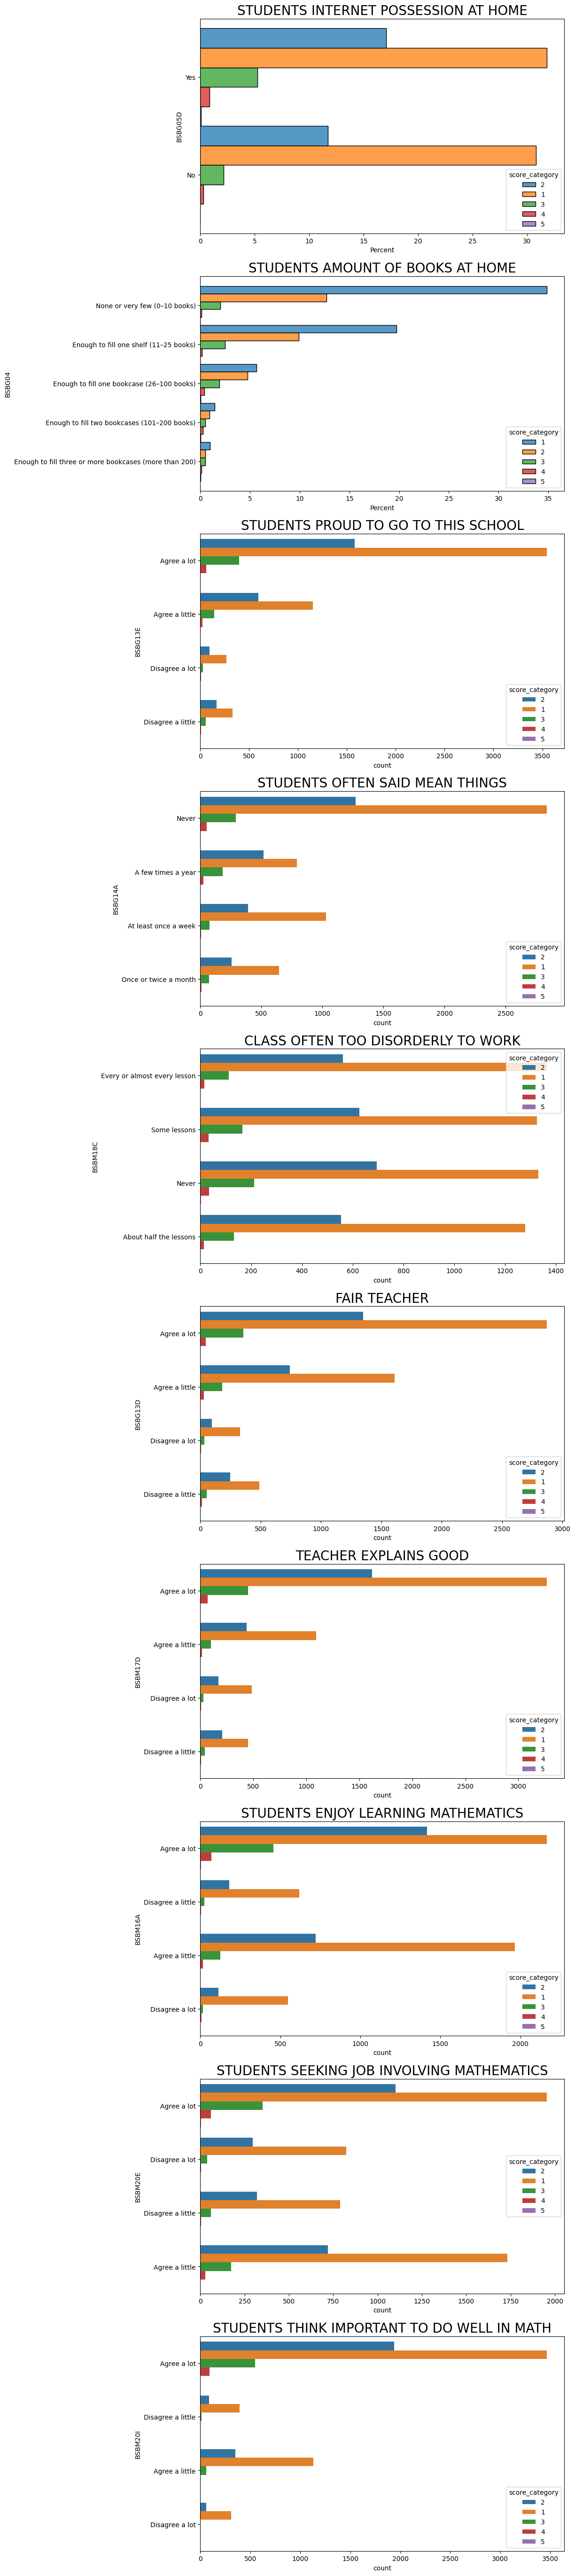

In [49]:
fig, ax = plt.subplots(nrows=10, figsize = [10,70])
order = ['1','2','3','4','5']

sns.histplot(df_g8_data, y=df_g8_data["BSBG05D"], stat = 'percent', multiple="dodge", hue=df_g8_data["score_category"], ax = ax[0]).axes.set_title("STUDENTS INTERNET POSSESSION AT HOME",fontsize=20)
sns.histplot(df_g8_data, y=df_g8_data["BSBG04"], stat = 'percent', multiple="dodge", hue_order=order, hue=df_g8_data["score_category"], ax = ax[1]).axes.set_title("STUDENTS AMOUNT OF BOOKS AT HOME",fontsize=20)
sns.countplot(df_g8_data, y=df_g8_data["BSBG13E"], hue=df_g8_data["score_category"], ax = ax[2]).axes.set_title("STUDENTS PROUD TO GO TO THIS SCHOOL",fontsize=20)
sns.countplot(df_g8_data, y=df_g8_data["BSBG14A"], hue=df_g8_data["score_category"], ax = ax[3]).axes.set_title("STUDENTS OFTEN SAID MEAN THINGS",fontsize=20)
sns.countplot(df_g8_data, y=df_g8_data["BSBM18C"], hue=df_g8_data["score_category"], ax = ax[4]).axes.set_title("CLASS OFTEN TOO DISORDERLY TO WORK",fontsize=20)
sns.countplot(df_g8_data, y=df_g8_data["BSBG13D"], hue=df_g8_data["score_category"], ax = ax[5]).axes.set_title("FAIR TEACHER",fontsize=20)
sns.countplot(df_g8_data, y=df_g8_data["BSBM17D"], hue=df_g8_data["score_category"], ax = ax[6]).axes.set_title("TEACHER EXPLAINS GOOD",fontsize=20)
sns.countplot(df_g8_data, y=df_g8_data["BSBM16A"], hue=df_g8_data["score_category"], ax = ax[7]).axes.set_title("STUDENTS ENJOY LEARNING MATHEMATICS",fontsize=20)
sns.countplot(df_g8_data, y=df_g8_data["BSBM20E"], hue=df_g8_data["score_category"], ax = ax[8]).axes.set_title("STUDENTS SEEKING JOB INVOLVING MATHEMATICS",fontsize=20)
sns.countplot(df_g8_data, y=df_g8_data["BSBM20I"], hue=df_g8_data["score_category"], ax = ax[9]).axes.set_title("STUDENTS THINK IMPORTANT TO DO WELL IN MATH",fontsize=20)


In [16]:
BSBG04_percentages = BSBG04_percentages.to_frame()

In [17]:
BSBG04_percentages

,proportion
BSBG04,
None or very few (0–10 books),0.556604
Enough to fill one shelf (11–25 books),0.314906
Enough to fill one bookcase (26–100 books),0.090377
Enough to fill two bookcases (101–200 books),0.022830
Enough to fill three or more bookcases (more than 200),0.015283


<Axes: xlabel='BSBG04'>

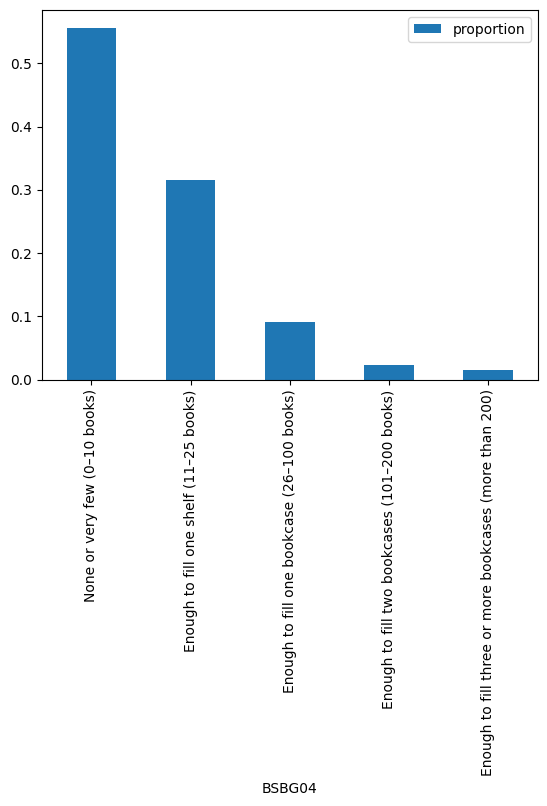

In [21]:
BSBG04_percentages.plot(kind="bar")

In [136]:
df_g8_data = pd.read_csv(config.ml_data_2, index_col=False)

In [137]:
df_g8_data = df_g8_data.drop(columns=['mean_PV'])

In [138]:
df_g8_data.shape

(8458, 11)

Now that our labels aren't continuous, let's check if we have duplicates:

In [139]:
sum(df_g8_data.duplicated())

2076

We have 2076 duplicates. Let's drop them:

In [140]:
df_g8_data = df_g8_data.drop_duplicates()

In [141]:
df_g8_data.shape

(6382, 11)

In [142]:
# Renaming Columns in df_data_encoder

columns_old_names = ['BSBG05D','BSBG04','BSBG13E','BSBG13D','BSBG14A','BSBM16A','BSBM17D','BSBM18C','BSBM20E','BSBM20I']
columns_new_names = ['POSSESS_INTERNET','BOOKS','SCHOOL_PRIDE','TEACHER_FAIR','MEAN_TALK','ENJOY_LEARN_MATH','TEACHER_GOOD_EXPLAINER','DISORDER','JOB_INVOLVE_MATH','IMPORTANT_TO_DO_WELL']
# Convert the 2 above lists into a dictionary:
column_names= dict(zip(columns_old_names, columns_new_names))

# rename in the dataframe and the file:
df_g8_data = df_g8_data.rename(columns=column_names)

In [143]:
df_g8_data.sample()

,POSSESS_INTERNET,BOOKS,SCHOOL_PRIDE,TEACHER_FAIR,MEAN_TALK,ENJOY_LEARN_MATH,TEACHER_GOOD_EXPLAINER,DISORDER,JOB_INVOLVE_MATH,IMPORTANT_TO_DO_WELL,score_category
7677,Yes,Enough to fill one shelf (11–25 books),Agree a little,Agree a little,Never,Disagree a little,Agree a lot,Never,Disagree a little,Agree a lot,2


In [44]:
df_g8_data.to_csv('../data/TIMSS-2019_data/TIMSS-2019_Morocco_8th/ml_cleaned_data_2.csv', index=False)

In [41]:
y = df_g8_data.score_category
y.sample()

768    1
Name: score_category, dtype: int64

In [127]:
x = df_g8_data.drop(columns='score_category')
x.sample()

,POSSESS_INTERNET,BOOKS,SCHOOL_PRIDE,TEACHER_FAIR,MEAN_TALK,ENJOY_LEARN_MATH,TEACHER_GOOD_EXPLAINER,DISORDER,JOB_INVOLVE_MATH,IMPORTANT_TO_DO_WELL
4366,No,Enough to fill one bookcase (26–100 books),Agree a little,Agree a lot,Once or twice a month,Disagree a lot,Agree a lot,Every or almost every lesson,Agree a little,Agree a lot


In [145]:
x.shape

(6382, 10)

Use of the saved clustering model:

In [132]:
import pickle

# Load the saved K-Modes clustering model
with open('../models/kmodes.sav', 'rb') as f:
    loaded_km = pickle.load(f)

In [135]:
cluster_assignment = loaded_km.predict([['Yes','Enough to fill one shelf (11–25 books)','Disagree a little','Agree a little','At least once a week','Agree a lot','Agree a lot','Never','Agree a lot','Agree a lot']])
cluster_assignment

array([5], dtype=uint16)

In [173]:
cluster_assignments = loaded_km.predict(x)
cluster_assignments

array([3, 3, 3, ..., 4, 4, 3], dtype=uint16)

In [174]:
x['clusters'] = cluster_assignments

In [175]:
x['labels'] = y

In [176]:
x.sample()

,POSSESS_INTERNET,BOOKS,SCHOOL_PRIDE,TEACHER_FAIR,MEAN_TALK,ENJOY_LEARN_MATH,TEACHER_GOOD_EXPLAINER,DISORDER,JOB_INVOLVE_MATH,IMPORTANT_TO_DO_WELL,clusters,labels
4193,Yes,Enough to fill one shelf (11–25 books),Agree a little,Agree a little,A few times a year,Agree a lot,Agree a lot,Some lessons,Agree a lot,Agree a lot,5,2


In [177]:
list_of_clusters = x['clusters'].unique()
list_of_clusters

array([3, 4, 5, 1, 2, 0], dtype=uint16)

In [257]:
y_0 = x[['labels','clusters']].query('clusters==0')
x_0 = x.query('clusters==0')
y_1 = x[['labels','clusters']].query('clusters==1')
x_1 = x.query('clusters==1')
y_2 = x[['labels','clusters']].query('clusters==2')
x_2 = x.query('clusters==2')
y_3 = x[['labels','clusters']].query('clusters==3')
x_3 = x.query('clusters==3')
y_4 = x[['labels','clusters']].query('clusters==4')
x_4 = x.query('clusters==4')
y_5 = x[['labels','clusters']].query('clusters==5')
x_5 = x[x['clusters'] ==5]

In [252]:
y_2.count()

labels      589
clusters    589
dtype: int64

In [267]:
import optuna
import xgboost as xgb
#import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, roc_auc_score, accuracy_score

In [258]:
df_list_features = [x_0, x_1, x_2, x_3, x_4, x_5]
df_list_labels = [y_0, y_1, y_2, y_3, y_4, y_5]
for df in df_list_features:
    del df['clusters']
    del df['labels']
for df in df_list_labels:
    del df['clusters']

In [259]:
y_2.count()

labels    589
dtype: int64

In [193]:
x_0.columns

Index(['POSSESS_INTERNET', 'BOOKS', 'SCHOOL_PRIDE', 'TEACHER_FAIR',
       'MEAN_TALK', 'ENJOY_LEARN_MATH', 'TEACHER_GOOD_EXPLAINER', 'DISORDER',
       'JOB_INVOLVE_MATH', 'IMPORTANT_TO_DO_WELL'],
      dtype='object')

In [194]:
x_0.dtypes

POSSESS_INTERNET          object
BOOKS                     object
SCHOOL_PRIDE              object
TEACHER_FAIR              object
MEAN_TALK                 object
ENJOY_LEARN_MATH          object
TEACHER_GOOD_EXPLAINER    object
DISORDER                  object
JOB_INVOLVE_MATH          object
IMPORTANT_TO_DO_WELL      object
dtype: object

In [260]:
x_0 = x_0.astype('category')
x_1 = x_1.astype('category')
x_2 = x_2.astype('category')
x_3 = x_3.astype('category')
x_4 = x_4.astype('category')
x_5 = x_5.astype('category')

In [207]:
y_0.dtypes

labels    int64
dtype: object

In [232]:
y_2 = y_2.astype('category')

In [222]:
y_0.dtypes

labels    category
dtype: object

In [261]:
y_2['labels'].unique()

array([2, 1, 3, 4])

In [196]:
x_0.dtypes

POSSESS_INTERNET          category
BOOKS                     category
SCHOOL_PRIDE              category
TEACHER_FAIR              category
MEAN_TALK                 category
ENJOY_LEARN_MATH          category
TEACHER_GOOD_EXPLAINER    category
DISORDER                  category
JOB_INVOLVE_MATH          category
IMPORTANT_TO_DO_WELL      category
dtype: object

In [269]:
train_x_2, test_x_2, train_y_2, test_y_2 = train_test_split(x_2,y_2, test_size=.20, random_state=30)


In [277]:
train_y_2.sample()

,labels
4806,1


In [301]:
def objective_classification( trail, data = x_2, target = y_2):
    train_x_2, test_x_2, train_y_2, test_y_2 = train_test_split(data,target, test_size=.20, random_state=30)
    param = {
        'tree_method':'hist',
        'enable_categorical':True, # mandatory when we have categorical features
        'objective': "multi:softprob",
        'num_class':5,
        'booster': trail.suggest_categorical('booster', ['dart', 'gbtree', 'gblinear']),
        'lambda': trail.suggest_float('lambda', 1e-10, 10, log=True), # lambda uses L2 regularization
        'alpha': trail.suggest_float('alpha', 1e-10, 10, log=True), # alpha uses L1 regularization
        'colsample_bytree':trail.suggest_categorical('colsample_bytree', [.1,.2,.3,.4,.5,.8,.9]),
        'subsample':trail.suggest_categorical('subsample', [.1,.2,.3,.4,.5,.6,.7,.8,.9]),
        'learning_rate':trail.suggest_categorical('learning_rate', [.00001,.0003,.02,.004,.5,1,10]),
        'n_estimator': trail.suggest_categorical('n_estimator', [30,300,3000,30000]),
        'max_depth':trail.suggest_categorical('max_depth', [3,4,5,6,7,8,9,10,11]),
        'random_state': trail.suggest_categorical('random_state', [10,30,200,5000]),
        #'min_child_weight': trail.suggest_int('min_child_weight',1,200),
        'verbosity': 0
    }
    if param['booster'] in ['dart', 'gbtree']:
        param['gamma'] = trail.suggest_float('gamma',1e-10, 10, log=True)
        param['eta'] = trail.suggest_float('eta',1e-10, 10, log=True)


    xgb_x_2_model = xgb.XGBClassifier(**param)
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    train_y_2 = le.fit_transform(train_y_2)
    #print(train_y_2.dtype)
    xgb_x_2_model.fit(train_x_2,train_y_2,eval_set = [(test_x_2,test_y_2)], verbose = True)
    prediction_xgb = xgb_x_2_model.predict(test_x_2)
    accuracy = roc_auc_score(test_y_2,prediction_xgb)
    #rmse = mean_squared_error(test_y_2,prediction_xgb)
    return accuracy

In [282]:
find_param.best_params

{'booster': 'gbtree',
 'lambda': 0.04775352438442496,
 'alpha': 1.2221090174557654e-05,
 'colsample_bytree': 0.8,
 'subsample': 0.9,
 'learning_rate': 1,
 'random_state': 10}

In [287]:
find_param.best_trial

FrozenTrial(number=7, state=1, values=[0.4732441471571906], datetime_start=datetime.datetime(2023, 11, 20, 17, 32, 20, 820840), datetime_complete=datetime.datetime(2023, 11, 20, 17, 32, 29, 290886), params={'booster': 'dart', 'lambda': 9.997238217778617e-08, 'alpha': 0.001330488505298329, 'colsample_bytree': 0.5, 'subsample': 0.3, 'learning_rate': 1, 'n_estimator': 3000, 'max_depth': 10, 'random_state': 30}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'booster': CategoricalDistribution(choices=('dart', 'gbtree', 'gblinear')), 'lambda': FloatDistribution(high=10.0, log=True, low=1e-10, step=None), 'alpha': FloatDistribution(high=10.0, log=True, low=1e-10, step=None), 'colsample_bytree': CategoricalDistribution(choices=(0.1, 0.2, 0.3, 0.4, 0.5, 0.8, 0.9)), 'subsample': CategoricalDistribution(choices=(0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9)), 'learning_rate': CategoricalDistribution(choices=(1e-05, 0.0003, 0.02, 0.004, 0.5, 1, 10)), 'n_estimator': Categori

In [302]:
find_param = optuna.create_study(direction='maximize')
find_param.optimize(objective_classification, n_trials = 100)
find_param.best_params

[I 2023-11-21 10:22:17,140] A new study created in memory with name: no-name-f86ace3a-5649-418f-93bd-4620816fc8bc


[0]	validation_0-mlogloss:13.40051
[1]	validation_0-mlogloss:13.40051
[2]	validation_0-mlogloss:13.40051
[3]	validation_0-mlogloss:13.40051
[4]	validation_0-mlogloss:13.40051
[5]	validation_0-mlogloss:13.40051


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[6]	validation_0-mlogloss:13.40051
[7]	validation_0-mlogloss:13.40051
[8]	validation_0-mlogloss:13.40051
[9]	validation_0-mlogloss:13.40051
[10]	validation_0-mlogloss:13.40051
[11]	validation_0-mlogloss:13.40051
[12]	validation_0-mlogloss:13.40051
[13]	validation_0-mlogloss:13.40051
[14]	validation_0-mlogloss:13.40051
[15]	validation_0-mlogloss:13.40051
[16]	validation_0-mlogloss:13.40051
[17]	validation_0-mlogloss:13.40051
[18]	validation_0-mlogloss:13.40051
[19]	validation_0-mlogloss:13.40051
[20]	validation_0-mlogloss:13.40051
[21]	validation_0-mlogloss:13.40051
[22]	validation_0-mlogloss:13.40051
[23]	validation_0-mlogloss:13.40051
[24]	validation_0-mlogloss:13.40051
[25]	validation_0-mlogloss:13.40051
[26]	validation_0-mlogloss:13.40051
[27]	validation_0-mlogloss:13.40051
[28]	validation_0-mlogloss:13.40051
[29]	validation_0-mlogloss:13.40051
[30]	validation_0-mlogloss:13.40051
[31]	validation_0-mlogloss:13.40051
[32]	validation_0-mlogloss:13.40051
[33]	validation_0-mlogloss:13.40

[I 2023-11-21 10:22:19,509] Trial 0 finished with value: 0.5167224080267558 and parameters: {'booster': 'gbtree', 'lambda': 0.00014344709360248183, 'alpha': 0.0783081769289055, 'colsample_bytree': 0.2, 'subsample': 0.1, 'learning_rate': 10, 'n_estimator': 3000, 'max_depth': 4, 'random_state': 30, 'gamma': 0.00947238572479427, 'eta': 1.2929334409750985e-10}. Best is trial 0 with value: 0.5167224080267558.


[0]	validation_0-mlogloss:13.75557
[1]	validation_0-mlogloss:8.11759
[2]	validation_0-mlogloss:8.11759
[3]	validation_0-mlogloss:8.11759
[4]	validation_0-mlogloss:8.11759


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[5]	validation_0-mlogloss:8.11759
[6]	validation_0-mlogloss:8.11759
[7]	validation_0-mlogloss:8.11759
[8]	validation_0-mlogloss:8.11759
[9]	validation_0-mlogloss:8.11759
[10]	validation_0-mlogloss:8.11759
[11]	validation_0-mlogloss:8.11759
[12]	validation_0-mlogloss:8.11759
[13]	validation_0-mlogloss:8.11759
[14]	validation_0-mlogloss:8.11759
[15]	validation_0-mlogloss:8.11759
[16]	validation_0-mlogloss:8.11759
[17]	validation_0-mlogloss:8.11759
[18]	validation_0-mlogloss:8.11759
[19]	validation_0-mlogloss:8.11759
[20]	validation_0-mlogloss:8.11759
[21]	validation_0-mlogloss:8.11759
[22]	validation_0-mlogloss:8.11759
[23]	validation_0-mlogloss:8.11759
[24]	validation_0-mlogloss:8.11759
[25]	validation_0-mlogloss:8.11759
[26]	validation_0-mlogloss:8.11759
[27]	validation_0-mlogloss:8.11759
[28]	validation_0-mlogloss:8.11759
[29]	validation_0-mlogloss:8.11759
[30]	validation_0-mlogloss:8.11759
[31]	validation_0-mlogloss:8.11759
[32]	validation_0-mlogloss:8.11759
[33]	validation_0-mloglos

[I 2023-11-21 10:22:29,604] Trial 1 finished with value: 0.5 and parameters: {'booster': 'dart', 'lambda': 1.0398825629855271e-06, 'alpha': 1.3931382220845256e-08, 'colsample_bytree': 0.2, 'subsample': 0.8, 'learning_rate': 10, 'n_estimator': 30, 'max_depth': 8, 'random_state': 5000, 'gamma': 1.1850096454770562e-06, 'eta': 7.0277648408796336e-09}. Best is trial 0 with value: 0.5167224080267558.


[0]	validation_0-mlogloss:1.39069
[1]	validation_0-mlogloss:1.39524
[2]	validation_0-mlogloss:1.39991
[3]	validation_0-mlogloss:1.40471
[4]	validation_0-mlogloss:1.40962
[5]	validation_0-mlogloss:1.41463
[6]	validation_0-mlogloss:1.41974
[7]	validation_0-mlogloss:1.42493
[8]	validation_0-mlogloss:1.43021
[9]	validation_0-mlogloss:1.43556
[10]	validation_0-mlogloss:1.44098
[11]	validation_0-mlogloss:1.44645
[12]	validation_0-mlogloss:1.45197
[13]	validation_0-mlogloss:1.45754
[14]	validation_0-mlogloss:1.46315
[15]	validation_0-mlogloss:1.46880
[16]	validation_0-mlogloss:1.47447


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[17]	validation_0-mlogloss:1.48015
[18]	validation_0-mlogloss:1.48586
[19]	validation_0-mlogloss:1.49158
[20]	validation_0-mlogloss:1.49730
[21]	validation_0-mlogloss:1.50303
[22]	validation_0-mlogloss:1.50875
[23]	validation_0-mlogloss:1.51446
[24]	validation_0-mlogloss:1.52016
[25]	validation_0-mlogloss:1.52585
[26]	validation_0-mlogloss:1.53151
[27]	validation_0-mlogloss:1.53715
[28]	validation_0-mlogloss:1.54276
[29]	validation_0-mlogloss:1.54835
[30]	validation_0-mlogloss:1.55389
[31]	validation_0-mlogloss:1.55940
[32]	validation_0-mlogloss:1.56488
[33]	validation_0-mlogloss:1.57031
[34]	validation_0-mlogloss:1.57569
[35]	validation_0-mlogloss:1.58104
[36]	validation_0-mlogloss:1.58633
[37]	validation_0-mlogloss:1.59158
[38]	validation_0-mlogloss:1.59677
[39]	validation_0-mlogloss:1.60191
[40]	validation_0-mlogloss:1.60699
[41]	validation_0-mlogloss:1.61202
[42]	validation_0-mlogloss:1.61699
[43]	validation_0-mlogloss:1.62190
[44]	validation_0-mlogloss:1.62676
[45]	validation_0-ml

[I 2023-11-21 10:22:31,167] Trial 2 finished with value: 0.5 and parameters: {'booster': 'gblinear', 'lambda': 0.007097637721208073, 'alpha': 5.4938416866650555e-09, 'colsample_bytree': 0.5, 'subsample': 0.7, 'learning_rate': 0.004, 'n_estimator': 3000, 'max_depth': 9, 'random_state': 5000}. Best is trial 0 with value: 0.5167224080267558.


[0]	validation_0-mlogloss:1.85032
[1]	validation_0-mlogloss:1.89905


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[2]	validation_0-mlogloss:2.05485
[3]	validation_0-mlogloss:2.01322
[4]	validation_0-mlogloss:2.10477
[5]	validation_0-mlogloss:2.24204
[6]	validation_0-mlogloss:2.18442
[7]	validation_0-mlogloss:2.18951
[8]	validation_0-mlogloss:2.28516
[9]	validation_0-mlogloss:2.41688
[10]	validation_0-mlogloss:2.46365
[11]	validation_0-mlogloss:2.45444
[12]	validation_0-mlogloss:2.51310
[13]	validation_0-mlogloss:2.44422
[14]	validation_0-mlogloss:2.58738
[15]	validation_0-mlogloss:2.57949
[16]	validation_0-mlogloss:2.55229
[17]	validation_0-mlogloss:2.76051
[18]	validation_0-mlogloss:2.77465
[19]	validation_0-mlogloss:2.68401
[20]	validation_0-mlogloss:2.71486
[21]	validation_0-mlogloss:2.77517
[22]	validation_0-mlogloss:2.74826
[23]	validation_0-mlogloss:2.89093
[24]	validation_0-mlogloss:2.70046
[25]	validation_0-mlogloss:2.78855
[26]	validation_0-mlogloss:2.79053
[27]	validation_0-mlogloss:2.83304
[28]	validation_0-mlogloss:2.95267
[29]	validation_0-mlogloss:2.96475
[30]	validation_0-mlogloss:3

[I 2023-11-21 10:22:42,651] Trial 3 finished with value: 0.4937290969899665 and parameters: {'booster': 'dart', 'lambda': 3.911043920078889e-05, 'alpha': 0.0006901743653666071, 'colsample_bytree': 0.3, 'subsample': 0.6, 'learning_rate': 1, 'n_estimator': 3000, 'max_depth': 3, 'random_state': 200, 'gamma': 2.6068135896004328e-05, 'eta': 2.9798682613429335e-05}. Best is trial 0 with value: 0.5167224080267558.


[0]	validation_0-mlogloss:1.95742
[1]	validation_0-mlogloss:2.32515


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[2]	validation_0-mlogloss:2.59160
[3]	validation_0-mlogloss:2.54584
[4]	validation_0-mlogloss:2.63555
[5]	validation_0-mlogloss:3.29122
[6]	validation_0-mlogloss:3.10021
[7]	validation_0-mlogloss:3.17283
[8]	validation_0-mlogloss:3.54913
[9]	validation_0-mlogloss:3.92985
[10]	validation_0-mlogloss:3.85421
[11]	validation_0-mlogloss:3.53039
[12]	validation_0-mlogloss:3.81277
[13]	validation_0-mlogloss:3.68400
[14]	validation_0-mlogloss:3.81948
[15]	validation_0-mlogloss:4.19963
[16]	validation_0-mlogloss:4.35075
[17]	validation_0-mlogloss:4.75946
[18]	validation_0-mlogloss:4.63803
[19]	validation_0-mlogloss:4.81704
[20]	validation_0-mlogloss:5.56113
[21]	validation_0-mlogloss:5.27408
[22]	validation_0-mlogloss:5.68484
[23]	validation_0-mlogloss:6.62700
[24]	validation_0-mlogloss:4.98746
[25]	validation_0-mlogloss:5.87323
[26]	validation_0-mlogloss:5.20748
[27]	validation_0-mlogloss:6.30539
[28]	validation_0-mlogloss:6.04185
[29]	validation_0-mlogloss:5.79721
[30]	validation_0-mlogloss:5

[I 2023-11-21 10:22:53,024] Trial 4 finished with value: 0.5547658862876254 and parameters: {'booster': 'dart', 'lambda': 4.353495011258181e-09, 'alpha': 2.0392898769459487e-07, 'colsample_bytree': 0.5, 'subsample': 0.2, 'learning_rate': 1, 'n_estimator': 3000, 'max_depth': 11, 'random_state': 200, 'gamma': 0.03486621005444712, 'eta': 0.07611162973000307}. Best is trial 4 with value: 0.5547658862876254.


[0]	validation_0-mlogloss:1.38634
[1]	validation_0-mlogloss:1.38637
[2]	validation_0-mlogloss:1.38641


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[3]	validation_0-mlogloss:1.38644
[4]	validation_0-mlogloss:1.38647
[5]	validation_0-mlogloss:1.38651
[6]	validation_0-mlogloss:1.38654
[7]	validation_0-mlogloss:1.38657
[8]	validation_0-mlogloss:1.38662
[9]	validation_0-mlogloss:1.38663
[10]	validation_0-mlogloss:1.38666
[11]	validation_0-mlogloss:1.38668
[12]	validation_0-mlogloss:1.38670
[13]	validation_0-mlogloss:1.38674
[14]	validation_0-mlogloss:1.38677
[15]	validation_0-mlogloss:1.38681
[16]	validation_0-mlogloss:1.38684
[17]	validation_0-mlogloss:1.38688
[18]	validation_0-mlogloss:1.38692
[19]	validation_0-mlogloss:1.38694
[20]	validation_0-mlogloss:1.38701
[21]	validation_0-mlogloss:1.38705
[22]	validation_0-mlogloss:1.38709
[23]	validation_0-mlogloss:1.38711
[24]	validation_0-mlogloss:1.38714
[25]	validation_0-mlogloss:1.38717
[26]	validation_0-mlogloss:1.38720
[27]	validation_0-mlogloss:1.38724
[28]	validation_0-mlogloss:1.38726
[29]	validation_0-mlogloss:1.38730
[30]	validation_0-mlogloss:1.38734
[31]	validation_0-mlogloss:

[I 2023-11-21 10:22:56,155] Trial 5 finished with value: 0.5 and parameters: {'booster': 'gbtree', 'lambda': 0.0067606810568304485, 'alpha': 0.0003458209599711305, 'colsample_bytree': 0.1, 'subsample': 0.5, 'learning_rate': 0.0003, 'n_estimator': 300, 'max_depth': 5, 'random_state': 200, 'gamma': 3.120700243212059e-10, 'eta': 1.734267683020924e-10}. Best is trial 4 with value: 0.5547658862876254.


[0]	validation_0-mlogloss:1.54244
[1]	validation_0-mlogloss:1.65563
[2]	validation_0-mlogloss:1.75783


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[3]	validation_0-mlogloss:1.86325
[4]	validation_0-mlogloss:1.90116
[5]	validation_0-mlogloss:1.93015
[6]	validation_0-mlogloss:1.93732
[7]	validation_0-mlogloss:1.93547
[8]	validation_0-mlogloss:1.95119
[9]	validation_0-mlogloss:1.96309
[10]	validation_0-mlogloss:1.95981
[11]	validation_0-mlogloss:1.94612
[12]	validation_0-mlogloss:1.96368
[13]	validation_0-mlogloss:1.98672
[14]	validation_0-mlogloss:1.97992
[15]	validation_0-mlogloss:1.99464
[16]	validation_0-mlogloss:1.99622
[17]	validation_0-mlogloss:2.01389
[18]	validation_0-mlogloss:2.04259
[19]	validation_0-mlogloss:2.03093
[20]	validation_0-mlogloss:2.01917
[21]	validation_0-mlogloss:2.01005
[22]	validation_0-mlogloss:2.05194
[23]	validation_0-mlogloss:2.04567
[24]	validation_0-mlogloss:2.04506
[25]	validation_0-mlogloss:2.04264
[26]	validation_0-mlogloss:2.02084
[27]	validation_0-mlogloss:2.01749
[28]	validation_0-mlogloss:2.03463
[29]	validation_0-mlogloss:2.05137
[30]	validation_0-mlogloss:2.04516
[31]	validation_0-mlogloss:

[I 2023-11-21 10:23:07,808] Trial 6 finished with value: 0.5029264214046824 and parameters: {'booster': 'dart', 'lambda': 1.9009757998575796e-06, 'alpha': 0.0012460803831584985, 'colsample_bytree': 0.5, 'subsample': 0.8, 'learning_rate': 0.5, 'n_estimator': 300, 'max_depth': 10, 'random_state': 10, 'gamma': 2.1458844287641643, 'eta': 5.892052060613413e-10}. Best is trial 4 with value: 0.5547658862876254.


[0]	validation_0-mlogloss:1.38635
[1]	validation_0-mlogloss:1.38641
[2]	validation_0-mlogloss:1.38643


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[3]	validation_0-mlogloss:1.38651
[4]	validation_0-mlogloss:1.38655
[5]	validation_0-mlogloss:1.38655
[6]	validation_0-mlogloss:1.38654
[7]	validation_0-mlogloss:1.38655
[8]	validation_0-mlogloss:1.38660
[9]	validation_0-mlogloss:1.38664
[10]	validation_0-mlogloss:1.38671
[11]	validation_0-mlogloss:1.38672
[12]	validation_0-mlogloss:1.38675
[13]	validation_0-mlogloss:1.38683
[14]	validation_0-mlogloss:1.38692
[15]	validation_0-mlogloss:1.38693
[16]	validation_0-mlogloss:1.38701
[17]	validation_0-mlogloss:1.38707
[18]	validation_0-mlogloss:1.38712
[19]	validation_0-mlogloss:1.38714
[20]	validation_0-mlogloss:1.38721
[21]	validation_0-mlogloss:1.38726
[22]	validation_0-mlogloss:1.38731
[23]	validation_0-mlogloss:1.38732
[24]	validation_0-mlogloss:1.38742
[25]	validation_0-mlogloss:1.38749
[26]	validation_0-mlogloss:1.38753
[27]	validation_0-mlogloss:1.38759
[28]	validation_0-mlogloss:1.38765
[29]	validation_0-mlogloss:1.38766
[30]	validation_0-mlogloss:1.38770
[31]	validation_0-mlogloss:

[I 2023-11-21 10:23:19,514] Trial 7 finished with value: 0.5 and parameters: {'booster': 'dart', 'lambda': 2.722009577859179e-07, 'alpha': 3.759093970325309e-05, 'colsample_bytree': 0.8, 'subsample': 0.2, 'learning_rate': 0.0003, 'n_estimator': 3000, 'max_depth': 9, 'random_state': 30, 'gamma': 0.20067270913775273, 'eta': 0.002749470022200785}. Best is trial 4 with value: 0.5547658862876254.


[0]	validation_0-mlogloss:1.40914
[1]	validation_0-mlogloss:1.43187
[2]	validation_0-mlogloss:1.45434
[3]	validation_0-mlogloss:1.47636
[4]	validation_0-mlogloss:1.49777
[5]	validation_0-mlogloss:1.51844
[6]	validation_0-mlogloss:1.53829
[7]	validation_0-mlogloss:1.55722
[8]	validation_0-mlogloss:1.57511
[9]	validation_0-mlogloss:1.59185
[10]	validation_0-mlogloss:1.60754


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[11]	validation_0-mlogloss:1.62215
[12]	validation_0-mlogloss:1.63575
[13]	validation_0-mlogloss:1.64831
[14]	validation_0-mlogloss:1.65985
[15]	validation_0-mlogloss:1.67042
[16]	validation_0-mlogloss:1.67993
[17]	validation_0-mlogloss:1.68867
[18]	validation_0-mlogloss:1.69658
[19]	validation_0-mlogloss:1.70371
[20]	validation_0-mlogloss:1.71011
[21]	validation_0-mlogloss:1.71584
[22]	validation_0-mlogloss:1.72094
[23]	validation_0-mlogloss:1.72546
[24]	validation_0-mlogloss:1.72943
[25]	validation_0-mlogloss:1.73289
[26]	validation_0-mlogloss:1.73586
[27]	validation_0-mlogloss:1.73837
[28]	validation_0-mlogloss:1.74047
[29]	validation_0-mlogloss:1.74218
[30]	validation_0-mlogloss:1.74354
[31]	validation_0-mlogloss:1.74465
[32]	validation_0-mlogloss:1.74553
[33]	validation_0-mlogloss:1.74622
[34]	validation_0-mlogloss:1.74672
[35]	validation_0-mlogloss:1.74704
[36]	validation_0-mlogloss:1.74721
[37]	validation_0-mlogloss:1.74722
[38]	validation_0-mlogloss:1.74710
[39]	validation_0-ml

[I 2023-11-21 10:23:21,789] Trial 8 finished with value: 0.5 and parameters: {'booster': 'gblinear', 'lambda': 3.27287503096471e-05, 'alpha': 0.18336434178587824, 'colsample_bytree': 0.3, 'subsample': 0.1, 'learning_rate': 0.02, 'n_estimator': 3000, 'max_depth': 7, 'random_state': 10}. Best is trial 4 with value: 0.5547658862876254.


[0]	validation_0-mlogloss:1.89939


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	validation_0-mlogloss:1.86935
[2]	validation_0-mlogloss:1.92138
[3]	validation_0-mlogloss:1.99315
[4]	validation_0-mlogloss:2.00131
[5]	validation_0-mlogloss:2.01762
[6]	validation_0-mlogloss:2.03615
[7]	validation_0-mlogloss:2.04339
[8]	validation_0-mlogloss:2.00434
[9]	validation_0-mlogloss:2.03686
[10]	validation_0-mlogloss:2.04404
[11]	validation_0-mlogloss:2.04477
[12]	validation_0-mlogloss:2.05581
[13]	validation_0-mlogloss:2.05551
[14]	validation_0-mlogloss:2.05712
[15]	validation_0-mlogloss:2.05819
[16]	validation_0-mlogloss:2.05667
[17]	validation_0-mlogloss:2.05674
[18]	validation_0-mlogloss:2.05590
[19]	validation_0-mlogloss:2.04519
[20]	validation_0-mlogloss:2.05069
[21]	validation_0-mlogloss:2.05144
[22]	validation_0-mlogloss:2.05159
[23]	validation_0-mlogloss:2.05148
[24]	validation_0-mlogloss:2.05097
[25]	validation_0-mlogloss:2.04885
[26]	validation_0-mlogloss:2.04953
[27]	validation_0-mlogloss:2.05020
[28]	validation_0-mlogloss:2.05008
[29]	validation_0-mlogloss:2.

[I 2023-11-21 10:23:24,002] Trial 9 finished with value: 0.4891304347826087 and parameters: {'booster': 'gblinear', 'lambda': 7.171217800325024e-06, 'alpha': 3.7364530399356356e-09, 'colsample_bytree': 0.4, 'subsample': 0.9, 'learning_rate': 1, 'n_estimator': 300, 'max_depth': 4, 'random_state': 5000}. Best is trial 4 with value: 0.5547658862876254.


[0]	validation_0-mlogloss:1.38630
[1]	validation_0-mlogloss:1.38630
[2]	validation_0-mlogloss:1.38630


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[3]	validation_0-mlogloss:1.38630
[4]	validation_0-mlogloss:1.38630
[5]	validation_0-mlogloss:1.38630
[6]	validation_0-mlogloss:1.38631
[7]	validation_0-mlogloss:1.38631
[8]	validation_0-mlogloss:1.38631
[9]	validation_0-mlogloss:1.38631
[10]	validation_0-mlogloss:1.38631
[11]	validation_0-mlogloss:1.38631
[12]	validation_0-mlogloss:1.38631
[13]	validation_0-mlogloss:1.38631
[14]	validation_0-mlogloss:1.38631
[15]	validation_0-mlogloss:1.38632
[16]	validation_0-mlogloss:1.38632
[17]	validation_0-mlogloss:1.38632
[18]	validation_0-mlogloss:1.38632
[19]	validation_0-mlogloss:1.38632
[20]	validation_0-mlogloss:1.38632
[21]	validation_0-mlogloss:1.38632
[22]	validation_0-mlogloss:1.38632
[23]	validation_0-mlogloss:1.38632
[24]	validation_0-mlogloss:1.38633
[25]	validation_0-mlogloss:1.38633
[26]	validation_0-mlogloss:1.38633
[27]	validation_0-mlogloss:1.38633
[28]	validation_0-mlogloss:1.38633
[29]	validation_0-mlogloss:1.38633
[30]	validation_0-mlogloss:1.38633
[31]	validation_0-mlogloss:

[I 2023-11-21 10:23:36,245] Trial 10 finished with value: 0.5 and parameters: {'booster': 'dart', 'lambda': 2.3091470764547118e-10, 'alpha': 4.2751098072750654e-07, 'colsample_bytree': 0.9, 'subsample': 0.2, 'learning_rate': 1e-05, 'n_estimator': 30000, 'max_depth': 11, 'random_state': 200, 'gamma': 0.004073762223202197, 'eta': 7.565178879446035}. Best is trial 4 with value: 0.5547658862876254.


[0]	validation_0-mlogloss:9.33651
[1]	validation_0-mlogloss:9.33651
[2]	validation_0-mlogloss:9.33651
[3]	validation_0-mlogloss:9.33651
[4]	validation_0-mlogloss:9.33651
[5]	validation_0-mlogloss:9.33651
[6]	validation_0-mlogloss:9.33651
[7]	validation_0-mlogloss:9.33651
[8]	validation_0-mlogloss:9.33651
[9]	validation_0-mlogloss:9.33651
[10]	validation_0-mlogloss:9.33651
[11]	validation_0-mlogloss:9.33651
[12]	validation_0-mlogloss:9.33651
[13]	validation_0-mlogloss:9.33651
[14]	validation_0-mlogloss:9.33651
[15]	validation_0-mlogloss:9.33651


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[16]	validation_0-mlogloss:9.33651
[17]	validation_0-mlogloss:9.33651
[18]	validation_0-mlogloss:9.33651
[19]	validation_0-mlogloss:9.33651
[20]	validation_0-mlogloss:9.33651
[21]	validation_0-mlogloss:9.33651
[22]	validation_0-mlogloss:9.33651
[23]	validation_0-mlogloss:9.33651
[24]	validation_0-mlogloss:9.33651
[25]	validation_0-mlogloss:9.33651
[26]	validation_0-mlogloss:9.33651
[27]	validation_0-mlogloss:9.33651
[28]	validation_0-mlogloss:9.33651
[29]	validation_0-mlogloss:9.33651
[30]	validation_0-mlogloss:9.33651
[31]	validation_0-mlogloss:9.33651
[32]	validation_0-mlogloss:9.33651
[33]	validation_0-mlogloss:9.33651
[34]	validation_0-mlogloss:9.33651
[35]	validation_0-mlogloss:9.33651
[36]	validation_0-mlogloss:9.33651
[37]	validation_0-mlogloss:9.33651
[38]	validation_0-mlogloss:9.33651
[39]	validation_0-mlogloss:9.33651
[40]	validation_0-mlogloss:9.33651
[41]	validation_0-mlogloss:9.33651
[42]	validation_0-mlogloss:9.33651
[43]	validation_0-mlogloss:9.33651
[44]	validation_0-ml

[I 2023-11-21 10:23:38,906] Trial 11 finished with value: 0.5 and parameters: {'booster': 'gbtree', 'lambda': 0.597249065394423, 'alpha': 4.968084732336948, 'colsample_bytree': 0.2, 'subsample': 0.1, 'learning_rate': 10, 'n_estimator': 3000, 'max_depth': 4, 'random_state': 30, 'gamma': 0.002867831247620787, 'eta': 9.501080709900056e-07}. Best is trial 4 with value: 0.5547658862876254.


[0]	validation_0-mlogloss:12.64175
[1]	validation_0-mlogloss:12.64175
[2]	validation_0-mlogloss:12.64175


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[3]	validation_0-mlogloss:12.64175
[4]	validation_0-mlogloss:12.64175
[5]	validation_0-mlogloss:12.64175
[6]	validation_0-mlogloss:12.64175
[7]	validation_0-mlogloss:12.64175
[8]	validation_0-mlogloss:12.64175
[9]	validation_0-mlogloss:12.64175
[10]	validation_0-mlogloss:12.64175
[11]	validation_0-mlogloss:12.64175
[12]	validation_0-mlogloss:12.64175
[13]	validation_0-mlogloss:12.64175
[14]	validation_0-mlogloss:12.64175
[15]	validation_0-mlogloss:12.64175
[16]	validation_0-mlogloss:12.64175
[17]	validation_0-mlogloss:12.64175
[18]	validation_0-mlogloss:12.64175
[19]	validation_0-mlogloss:12.64175
[20]	validation_0-mlogloss:12.64175
[21]	validation_0-mlogloss:12.64175
[22]	validation_0-mlogloss:12.64175
[23]	validation_0-mlogloss:12.64175
[24]	validation_0-mlogloss:12.64175
[25]	validation_0-mlogloss:12.64175
[26]	validation_0-mlogloss:12.64175
[27]	validation_0-mlogloss:12.64175
[28]	validation_0-mlogloss:12.64175
[29]	validation_0-mlogloss:12.64175
[30]	validation_0-mlogloss:12.64175

[I 2023-11-21 10:23:41,583] Trial 12 finished with value: 0.5 and parameters: {'booster': 'gbtree', 'lambda': 4.967314226886496e-10, 'alpha': 7.899831461688054e-07, 'colsample_bytree': 0.2, 'subsample': 0.4, 'learning_rate': 10, 'n_estimator': 30, 'max_depth': 11, 'random_state': 30, 'gamma': 6.396013772848326, 'eta': 0.014699491688469178}. Best is trial 4 with value: 0.5547658862876254.


[0]	validation_0-mlogloss:1.95786
[1]	validation_0-mlogloss:2.15432
[2]	validation_0-mlogloss:2.17738
[3]	validation_0-mlogloss:2.25698
[4]	validation_0-mlogloss:2.52791
[5]	validation_0-mlogloss:2.62120


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[6]	validation_0-mlogloss:2.56976
[7]	validation_0-mlogloss:2.85666
[8]	validation_0-mlogloss:2.75110
[9]	validation_0-mlogloss:2.90788
[10]	validation_0-mlogloss:2.95398
[11]	validation_0-mlogloss:3.17379
[12]	validation_0-mlogloss:3.20659
[13]	validation_0-mlogloss:3.35327
[14]	validation_0-mlogloss:3.61308
[15]	validation_0-mlogloss:3.54562
[16]	validation_0-mlogloss:3.48240
[17]	validation_0-mlogloss:3.88599
[18]	validation_0-mlogloss:3.73193
[19]	validation_0-mlogloss:3.75349
[20]	validation_0-mlogloss:4.11494
[21]	validation_0-mlogloss:4.45215
[22]	validation_0-mlogloss:4.10616
[23]	validation_0-mlogloss:4.28899
[24]	validation_0-mlogloss:4.79691
[25]	validation_0-mlogloss:4.91131
[26]	validation_0-mlogloss:4.69023
[27]	validation_0-mlogloss:4.84044
[28]	validation_0-mlogloss:4.58939
[29]	validation_0-mlogloss:5.02443
[30]	validation_0-mlogloss:4.99719
[31]	validation_0-mlogloss:4.47537
[32]	validation_0-mlogloss:4.93313
[33]	validation_0-mlogloss:4.90872
[34]	validation_0-mloglo

[I 2023-11-21 10:23:44,517] Trial 13 finished with value: 0.5413879598662207 and parameters: {'booster': 'gbtree', 'lambda': 3.843563414544032e-09, 'alpha': 3.064788596085635e-10, 'colsample_bytree': 0.5, 'subsample': 0.3, 'learning_rate': 1, 'n_estimator': 30000, 'max_depth': 6, 'random_state': 30, 'gamma': 0.012943337424662934, 'eta': 1.3909831004034268e-07}. Best is trial 4 with value: 0.5547658862876254.
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-mlogloss:1.99729
[1]	validation_0-mlogloss:2.19005
[2]	validation_0-mlogloss:2.21666
[3]	validation_0-mlogloss:2.53397
[4]	validation_0-mlogloss:2.61974
[5]	validation_0-mlogloss:3.00383
[6]	validation_0-mlogloss:2.99330
[7]	validation_0-mlogloss:2.64237
[8]	validation_0-mlogloss:3.50929
[9]	validation_0-mlogloss:3.06269
[10]	validation_0-mlogloss:3.40372
[11]	validation_0-mlogloss:3.68045
[12]	validation_0-mlogloss:3.53808
[13]	validation_0-mlogloss:4.16226
[14]	validation_0-mlogloss:3.93959
[15]	validation_0-mlogloss:4.07010
[16]	validation_0-mlogloss:3.84820
[17]	validation_0-mlogloss:4.33471
[18]	validation_0-mlogloss:4.27823
[19]	validation_0-mlogloss:4.19392
[20]	validation_0-mlogloss:4.71708
[21]	validation_0-mlogloss:4.71398
[22]	validation_0-mlogloss:4.48978
[23]	validation_0-mlogloss:4.56544
[24]	validation_0-mlogloss:4.85911
[25]	validation_0-mlogloss:4.42420
[26]	validation_0-mlogloss:4.68141
[27]	validation_0-mlogloss:4.92730
[28]	validation_0-mlogloss:4.9

[I 2023-11-21 10:23:48,339] Trial 14 finished with value: 0.5012541806020068 and parameters: {'booster': 'gbtree', 'lambda': 1.3869875330113177e-08, 'alpha': 5.248600596687167e-10, 'colsample_bytree': 0.5, 'subsample': 0.3, 'learning_rate': 1, 'n_estimator': 30000, 'max_depth': 6, 'random_state': 200, 'gamma': 0.04770479603167409, 'eta': 1.6560941413588026e-07}. Best is trial 4 with value: 0.5547658862876254.


[0]	validation_0-mlogloss:1.95786
[1]	validation_0-mlogloss:1.97460
[2]	validation_0-mlogloss:2.25419
[3]	validation_0-mlogloss:2.29777


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[4]	validation_0-mlogloss:2.39506
[5]	validation_0-mlogloss:2.43501
[6]	validation_0-mlogloss:2.56327
[7]	validation_0-mlogloss:2.77017
[8]	validation_0-mlogloss:2.91254
[9]	validation_0-mlogloss:2.95240
[10]	validation_0-mlogloss:3.06928
[11]	validation_0-mlogloss:2.84994
[12]	validation_0-mlogloss:3.08417
[13]	validation_0-mlogloss:3.27967
[14]	validation_0-mlogloss:3.36552
[15]	validation_0-mlogloss:3.13759
[16]	validation_0-mlogloss:3.84732
[17]	validation_0-mlogloss:3.64999
[18]	validation_0-mlogloss:4.01645
[19]	validation_0-mlogloss:3.98094
[20]	validation_0-mlogloss:4.38154
[21]	validation_0-mlogloss:4.28769
[22]	validation_0-mlogloss:4.12794
[23]	validation_0-mlogloss:4.24963
[24]	validation_0-mlogloss:4.88821
[25]	validation_0-mlogloss:4.19048
[26]	validation_0-mlogloss:3.97702
[27]	validation_0-mlogloss:4.30022
[28]	validation_0-mlogloss:4.13668
[29]	validation_0-mlogloss:4.22910
[30]	validation_0-mlogloss:4.69400
[31]	validation_0-mlogloss:4.34871
[32]	validation_0-mlogloss

[I 2023-11-21 10:24:01,259] Trial 15 finished with value: 0.5083612040133779 and parameters: {'booster': 'dart', 'lambda': 9.474096517098469e-09, 'alpha': 1.46631321338718e-10, 'colsample_bytree': 0.5, 'subsample': 0.3, 'learning_rate': 1, 'n_estimator': 30000, 'max_depth': 6, 'random_state': 30, 'gamma': 0.0008410147315269462, 'eta': 3.090897878754e-05}. Best is trial 4 with value: 0.5547658862876254.


[0]	validation_0-mlogloss:1.99029
[1]	validation_0-mlogloss:2.18562
[2]	validation_0-mlogloss:2.17672


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[3]	validation_0-mlogloss:2.41822
[4]	validation_0-mlogloss:2.48029
[5]	validation_0-mlogloss:3.01398
[6]	validation_0-mlogloss:2.88571
[7]	validation_0-mlogloss:2.71045
[8]	validation_0-mlogloss:3.47226
[9]	validation_0-mlogloss:3.18030
[10]	validation_0-mlogloss:3.35375
[11]	validation_0-mlogloss:3.59048
[12]	validation_0-mlogloss:3.39491
[13]	validation_0-mlogloss:3.76816
[14]	validation_0-mlogloss:3.91217
[15]	validation_0-mlogloss:4.27054
[16]	validation_0-mlogloss:4.34530
[17]	validation_0-mlogloss:4.54913
[18]	validation_0-mlogloss:4.34893
[19]	validation_0-mlogloss:4.26161
[20]	validation_0-mlogloss:4.73174
[21]	validation_0-mlogloss:4.49971
[22]	validation_0-mlogloss:4.86973
[23]	validation_0-mlogloss:4.79223
[24]	validation_0-mlogloss:5.02776
[25]	validation_0-mlogloss:5.00393
[26]	validation_0-mlogloss:5.27890
[27]	validation_0-mlogloss:5.24291
[28]	validation_0-mlogloss:5.20303
[29]	validation_0-mlogloss:5.26640
[30]	validation_0-mlogloss:5.22903
[31]	validation_0-mlogloss:

[I 2023-11-21 10:24:04,824] Trial 16 finished with value: 0.5426421404682275 and parameters: {'booster': 'gbtree', 'lambda': 3.338559245660788e-08, 'alpha': 9.451617929207149e-08, 'colsample_bytree': 0.5, 'subsample': 0.3, 'learning_rate': 1, 'n_estimator': 30000, 'max_depth': 6, 'random_state': 200, 'gamma': 0.18453809778851857, 'eta': 8.99922318799098e-08}. Best is trial 4 with value: 0.5547658862876254.
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-mlogloss:1.38950
[1]	validation_0-mlogloss:1.39431
[2]	validation_0-mlogloss:1.39967
[3]	validation_0-mlogloss:1.39948
[4]	validation_0-mlogloss:1.40177
[5]	validation_0-mlogloss:1.40749
[6]	validation_0-mlogloss:1.41176
[7]	validation_0-mlogloss:1.41408
[8]	validation_0-mlogloss:1.41657
[9]	validation_0-mlogloss:1.41990
[10]	validation_0-mlogloss:1.42311
[11]	validation_0-mlogloss:1.42423
[12]	validation_0-mlogloss:1.42782
[13]	validation_0-mlogloss:1.43090
[14]	validation_0-mlogloss:1.43527
[15]	validation_0-mlogloss:1.44046
[16]	validation_0-mlogloss:1.44419
[17]	validation_0-mlogloss:1.44642
[18]	validation_0-mlogloss:1.44875
[19]	validation_0-mlogloss:1.45569
[20]	validation_0-mlogloss:1.45776
[21]	validation_0-mlogloss:1.45996
[22]	validation_0-mlogloss:1.46203
[23]	validation_0-mlogloss:1.46480
[24]	validation_0-mlogloss:1.46762
[25]	validation_0-mlogloss:1.47281
[26]	validation_0-mlogloss:1.47623
[27]	validation_0-mlogloss:1.47857
[28]	validation_0-mlogloss:1.4

[I 2023-11-21 10:24:15,335] Trial 17 finished with value: 0.508361204013378 and parameters: {'booster': 'dart', 'lambda': 9.104615089421556e-08, 'alpha': 3.04112687044388e-07, 'colsample_bytree': 0.9, 'subsample': 0.2, 'learning_rate': 0.02, 'n_estimator': 30000, 'max_depth': 11, 'random_state': 200, 'gamma': 0.3686109471036711, 'eta': 0.0038900917183828823}. Best is trial 4 with value: 0.5547658862876254.


[0]	validation_0-mlogloss:1.38688
[1]	validation_0-mlogloss:1.38752
[2]	validation_0-mlogloss:1.38805
[3]	validation_0-mlogloss:1.38858
[4]	validation_0-mlogloss:1.38912
[5]	validation_0-mlogloss:1.38973
[6]	validation_0-mlogloss:1.39036
[7]	validation_0-mlogloss:1.39100


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[8]	validation_0-mlogloss:1.39152
[9]	validation_0-mlogloss:1.39210
[10]	validation_0-mlogloss:1.39259
[11]	validation_0-mlogloss:1.39316
[12]	validation_0-mlogloss:1.39378
[13]	validation_0-mlogloss:1.39436
[14]	validation_0-mlogloss:1.39501
[15]	validation_0-mlogloss:1.39582
[16]	validation_0-mlogloss:1.39637
[17]	validation_0-mlogloss:1.39695
[18]	validation_0-mlogloss:1.39751
[19]	validation_0-mlogloss:1.39816
[20]	validation_0-mlogloss:1.39876
[21]	validation_0-mlogloss:1.39943
[22]	validation_0-mlogloss:1.40000
[23]	validation_0-mlogloss:1.40057
[24]	validation_0-mlogloss:1.40115
[25]	validation_0-mlogloss:1.40175
[26]	validation_0-mlogloss:1.40247
[27]	validation_0-mlogloss:1.40319
[28]	validation_0-mlogloss:1.40379
[29]	validation_0-mlogloss:1.40447
[30]	validation_0-mlogloss:1.40510
[31]	validation_0-mlogloss:1.40582
[32]	validation_0-mlogloss:1.40658
[33]	validation_0-mlogloss:1.40717
[34]	validation_0-mlogloss:1.40797
[35]	validation_0-mlogloss:1.40856
[36]	validation_0-mlog

[I 2023-11-21 10:24:17,549] Trial 18 finished with value: 0.5 and parameters: {'booster': 'gbtree', 'lambda': 3.48424558493676e-10, 'alpha': 4.238055949851998e-06, 'colsample_bytree': 0.8, 'subsample': 0.9, 'learning_rate': 0.004, 'n_estimator': 30, 'max_depth': 10, 'random_state': 200, 'gamma': 4.066894516541407, 'eta': 6.137872944798876}. Best is trial 4 with value: 0.5547658862876254.
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-mlogloss:1.38630
[1]	validation_0-mlogloss:1.38632
[2]	validation_0-mlogloss:1.38633
[3]	validation_0-mlogloss:1.38634
[4]	validation_0-mlogloss:1.38635
[5]	validation_0-mlogloss:1.38636
[6]	validation_0-mlogloss:1.38637
[7]	validation_0-mlogloss:1.38638
[8]	validation_0-mlogloss:1.38639
[9]	validation_0-mlogloss:1.38640
[10]	validation_0-mlogloss:1.38641
[11]	validation_0-mlogloss:1.38642
[12]	validation_0-mlogloss:1.38643
[13]	validation_0-mlogloss:1.38644
[14]	validation_0-mlogloss:1.38645
[15]	validation_0-mlogloss:1.38646
[16]	validation_0-mlogloss:1.38647
[17]	validation_0-mlogloss:1.38648
[18]	validation_0-mlogloss:1.38649
[19]	validation_0-mlogloss:1.38650
[20]	validation_0-mlogloss:1.38651
[21]	validation_0-mlogloss:1.38652
[22]	validation_0-mlogloss:1.38653
[23]	validation_0-mlogloss:1.38654
[24]	validation_0-mlogloss:1.38655
[25]	validation_0-mlogloss:1.38657
[26]	validation_0-mlogloss:1.38658
[27]	validation_0-mlogloss:1.38659
[28]	validation_0-mlogloss:1.3

[I 2023-11-21 10:24:19,826] Trial 19 finished with value: 0.5 and parameters: {'booster': 'gblinear', 'lambda': 4.8357902092827066e-08, 'alpha': 5.76591760524119e-08, 'colsample_bytree': 0.1, 'subsample': 0.6, 'learning_rate': 1e-05, 'n_estimator': 30000, 'max_depth': 7, 'random_state': 200}. Best is trial 4 with value: 0.5547658862876254.


[0]	validation_0-mlogloss:1.55252
[1]	validation_0-mlogloss:1.72344
[2]	validation_0-mlogloss:1.83140


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[3]	validation_0-mlogloss:1.88488
[4]	validation_0-mlogloss:1.93621
[5]	validation_0-mlogloss:2.03752
[6]	validation_0-mlogloss:2.09073
[7]	validation_0-mlogloss:2.14474
[8]	validation_0-mlogloss:2.19771
[9]	validation_0-mlogloss:2.20403
[10]	validation_0-mlogloss:2.25486
[11]	validation_0-mlogloss:2.27669
[12]	validation_0-mlogloss:2.30833
[13]	validation_0-mlogloss:2.38548
[14]	validation_0-mlogloss:2.43451
[15]	validation_0-mlogloss:2.43625
[16]	validation_0-mlogloss:2.46188
[17]	validation_0-mlogloss:2.51872
[18]	validation_0-mlogloss:2.54663
[19]	validation_0-mlogloss:2.57557
[20]	validation_0-mlogloss:2.64437
[21]	validation_0-mlogloss:2.66106
[22]	validation_0-mlogloss:2.61828
[23]	validation_0-mlogloss:2.65521
[24]	validation_0-mlogloss:2.71468
[25]	validation_0-mlogloss:2.76642
[26]	validation_0-mlogloss:2.78314
[27]	validation_0-mlogloss:2.83659
[28]	validation_0-mlogloss:2.89827
[29]	validation_0-mlogloss:2.88558
[30]	validation_0-mlogloss:2.88483
[31]	validation_0-mlogloss:

[I 2023-11-21 10:24:23,471] Trial 20 finished with value: 0.47742474916387956 and parameters: {'booster': 'gbtree', 'lambda': 2.7719374809453345e-09, 'alpha': 4.1155348531566913e-08, 'colsample_bytree': 0.4, 'subsample': 0.7, 'learning_rate': 0.5, 'n_estimator': 3000, 'max_depth': 8, 'random_state': 200, 'gamma': 0.12650138838483452, 'eta': 0.17028695304025082}. Best is trial 4 with value: 0.5547658862876254.


[0]	validation_0-mlogloss:1.84367
[1]	validation_0-mlogloss:1.99988
[2]	validation_0-mlogloss:2.27175
[3]	validation_0-mlogloss:2.42756
[4]	validation_0-mlogloss:2.49332
[5]	validation_0-mlogloss:2.41704


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[6]	validation_0-mlogloss:2.58162
[7]	validation_0-mlogloss:2.77390
[8]	validation_0-mlogloss:2.72173
[9]	validation_0-mlogloss:2.92221
[10]	validation_0-mlogloss:2.98815
[11]	validation_0-mlogloss:2.83887
[12]	validation_0-mlogloss:2.83574
[13]	validation_0-mlogloss:2.89879
[14]	validation_0-mlogloss:3.32582
[15]	validation_0-mlogloss:3.97156
[16]	validation_0-mlogloss:4.01947
[17]	validation_0-mlogloss:3.87653
[18]	validation_0-mlogloss:3.95191
[19]	validation_0-mlogloss:4.40891
[20]	validation_0-mlogloss:4.51592
[21]	validation_0-mlogloss:3.89242
[22]	validation_0-mlogloss:3.82429
[23]	validation_0-mlogloss:4.30553
[24]	validation_0-mlogloss:4.35254
[25]	validation_0-mlogloss:4.38336
[26]	validation_0-mlogloss:4.40399
[27]	validation_0-mlogloss:4.63618
[28]	validation_0-mlogloss:4.50456
[29]	validation_0-mlogloss:4.61247
[30]	validation_0-mlogloss:4.50456
[31]	validation_0-mlogloss:4.79988
[32]	validation_0-mlogloss:5.04575
[33]	validation_0-mlogloss:4.51404
[34]	validation_0-mloglo

[I 2023-11-21 10:24:26,466] Trial 21 finished with value: 0.4569397993311037 and parameters: {'booster': 'gbtree', 'lambda': 2.748165341162452e-09, 'alpha': 4.071403084925611e-10, 'colsample_bytree': 0.5, 'subsample': 0.3, 'learning_rate': 1, 'n_estimator': 30000, 'max_depth': 6, 'random_state': 10, 'gamma': 0.03651432379406295, 'eta': 1.3984647525448067e-07}. Best is trial 4 with value: 0.5547658862876254.
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-mlogloss:1.95786
[1]	validation_0-mlogloss:2.15559
[2]	validation_0-mlogloss:2.17923
[3]	validation_0-mlogloss:2.26163
[4]	validation_0-mlogloss:2.51575
[5]	validation_0-mlogloss:2.54013
[6]	validation_0-mlogloss:2.46219
[7]	validation_0-mlogloss:2.66638
[8]	validation_0-mlogloss:2.70635
[9]	validation_0-mlogloss:2.71104
[10]	validation_0-mlogloss:3.01314
[11]	validation_0-mlogloss:3.21662
[12]	validation_0-mlogloss:3.15366
[13]	validation_0-mlogloss:3.06146
[14]	validation_0-mlogloss:3.24645
[15]	validation_0-mlogloss:3.42668
[16]	validation_0-mlogloss:3.29721
[17]	validation_0-mlogloss:3.74606
[18]	validation_0-mlogloss:3.37589
[19]	validation_0-mlogloss:3.59757
[20]	validation_0-mlogloss:3.70898
[21]	validation_0-mlogloss:3.63584
[22]	validation_0-mlogloss:3.60971
[23]	validation_0-mlogloss:3.63100
[24]	validation_0-mlogloss:4.01030
[25]	validation_0-mlogloss:4.32540
[26]	validation_0-mlogloss:4.16413
[27]	validation_0-mlogloss:4.24171
[28]	validation_0-mlogloss:3.9

[I 2023-11-21 10:24:30,231] Trial 22 finished with value: 0.49205685618729095 and parameters: {'booster': 'gbtree', 'lambda': 5.070969890479165e-08, 'alpha': 2.1066986180440725e-09, 'colsample_bytree': 0.5, 'subsample': 0.3, 'learning_rate': 1, 'n_estimator': 30000, 'max_depth': 6, 'random_state': 30, 'gamma': 0.0002260313504542354, 'eta': 2.2405926040341486e-06}. Best is trial 4 with value: 0.5547658862876254.
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-mlogloss:1.97243
[1]	validation_0-mlogloss:2.26437
[2]	validation_0-mlogloss:2.27462
[3]	validation_0-mlogloss:2.47617
[4]	validation_0-mlogloss:2.60784
[5]	validation_0-mlogloss:3.24367
[6]	validation_0-mlogloss:3.02414
[7]	validation_0-mlogloss:2.81996
[8]	validation_0-mlogloss:3.36241
[9]	validation_0-mlogloss:2.74940
[10]	validation_0-mlogloss:3.25583
[11]	validation_0-mlogloss:3.36722
[12]	validation_0-mlogloss:2.88019
[13]	validation_0-mlogloss:3.45734
[14]	validation_0-mlogloss:3.66679
[15]	validation_0-mlogloss:3.88568
[16]	validation_0-mlogloss:3.55438
[17]	validation_0-mlogloss:3.87275
[18]	validation_0-mlogloss:3.93657
[19]	validation_0-mlogloss:3.76877
[20]	validation_0-mlogloss:4.25125
[21]	validation_0-mlogloss:4.51078
[22]	validation_0-mlogloss:4.41824
[23]	validation_0-mlogloss:4.81023
[24]	validation_0-mlogloss:4.82878
[25]	validation_0-mlogloss:4.96488
[26]	validation_0-mlogloss:5.22857
[27]	validation_0-mlogloss:5.34423
[28]	validation_0-mlogloss:5.2

[I 2023-11-21 10:24:33,923] Trial 23 finished with value: 0.5025083612040133 and parameters: {'booster': 'gbtree', 'lambda': 2.4268960957174882e-09, 'alpha': 1.0144344457254772e-10, 'colsample_bytree': 0.5, 'subsample': 0.3, 'learning_rate': 1, 'n_estimator': 30000, 'max_depth': 6, 'random_state': 200, 'gamma': 0.34487945555572996, 'eta': 1.144110543909591e-08}. Best is trial 4 with value: 0.5547658862876254.


[0]	validation_0-mlogloss:1.95440
[1]	validation_0-mlogloss:2.00001


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[2]	validation_0-mlogloss:2.07994
[3]	validation_0-mlogloss:2.16914
[4]	validation_0-mlogloss:2.32470
[5]	validation_0-mlogloss:2.68782
[6]	validation_0-mlogloss:2.72667
[7]	validation_0-mlogloss:2.59460
[8]	validation_0-mlogloss:2.71803
[9]	validation_0-mlogloss:2.62882
[10]	validation_0-mlogloss:2.68399
[11]	validation_0-mlogloss:2.88079
[12]	validation_0-mlogloss:2.83992
[13]	validation_0-mlogloss:3.00559
[14]	validation_0-mlogloss:3.09856
[15]	validation_0-mlogloss:3.20413
[16]	validation_0-mlogloss:3.30698
[17]	validation_0-mlogloss:3.30556
[18]	validation_0-mlogloss:3.32732
[19]	validation_0-mlogloss:3.30558
[20]	validation_0-mlogloss:3.66493
[21]	validation_0-mlogloss:3.65276
[22]	validation_0-mlogloss:3.72603
[23]	validation_0-mlogloss:3.74780
[24]	validation_0-mlogloss:3.77496
[25]	validation_0-mlogloss:3.89475
[26]	validation_0-mlogloss:3.75703
[27]	validation_0-mlogloss:3.81851
[28]	validation_0-mlogloss:3.90163
[29]	validation_0-mlogloss:3.89859
[30]	validation_0-mlogloss:3

[I 2023-11-21 10:24:38,190] Trial 24 finished with value: 0.4439799331103678 and parameters: {'booster': 'gbtree', 'lambda': 1.430451153397849e-10, 'alpha': 6.189976120421371e-08, 'colsample_bytree': 0.5, 'subsample': 0.5, 'learning_rate': 1, 'n_estimator': 30000, 'max_depth': 5, 'random_state': 200, 'gamma': 0.008276436002444081, 'eta': 0.0002255922580514434}. Best is trial 4 with value: 0.5547658862876254.
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-mlogloss:1.82378
[1]	validation_0-mlogloss:1.87695
[2]	validation_0-mlogloss:2.09706
[3]	validation_0-mlogloss:2.21407
[4]	validation_0-mlogloss:2.38786
[5]	validation_0-mlogloss:2.31718
[6]	validation_0-mlogloss:2.39973
[7]	validation_0-mlogloss:2.51889
[8]	validation_0-mlogloss:2.54987
[9]	validation_0-mlogloss:2.54417
[10]	validation_0-mlogloss:2.70522
[11]	validation_0-mlogloss:2.60888
[12]	validation_0-mlogloss:2.65490
[13]	validation_0-mlogloss:2.73383
[14]	validation_0-mlogloss:2.81722
[15]	validation_0-mlogloss:2.76000
[16]	validation_0-mlogloss:3.05230
[17]	validation_0-mlogloss:3.02438
[18]	validation_0-mlogloss:3.03043
[19]	validation_0-mlogloss:3.08616
[20]	validation_0-mlogloss:3.20570
[21]	validation_0-mlogloss:3.19426
[22]	validation_0-mlogloss:3.18321
[23]	validation_0-mlogloss:3.18676
[24]	validation_0-mlogloss:3.46044
[25]	validation_0-mlogloss:3.40858
[26]	validation_0-mlogloss:3.17615
[27]	validation_0-mlogloss:3.23463
[28]	validation_0-mlogloss:3.4

[I 2023-11-21 10:24:49,457] Trial 25 finished with value: 0.4983277591973244 and parameters: {'booster': 'dart', 'lambda': 2.643764754074678e-07, 'alpha': 1.9001827266720335e-09, 'colsample_bytree': 0.5, 'subsample': 0.4, 'learning_rate': 1, 'n_estimator': 30000, 'max_depth': 3, 'random_state': 30, 'gamma': 0.0001703433761000978, 'eta': 6.326810256446848e-06}. Best is trial 4 with value: 0.5547658862876254.


[0]	validation_0-mlogloss:1.94093
[1]	validation_0-mlogloss:2.06200
[2]	validation_0-mlogloss:1.99656


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[3]	validation_0-mlogloss:2.38159
[4]	validation_0-mlogloss:2.43721
[5]	validation_0-mlogloss:2.53677
[6]	validation_0-mlogloss:2.64702
[7]	validation_0-mlogloss:2.66453
[8]	validation_0-mlogloss:2.81940
[9]	validation_0-mlogloss:2.64331
[10]	validation_0-mlogloss:2.62977
[11]	validation_0-mlogloss:3.18294
[12]	validation_0-mlogloss:3.21830
[13]	validation_0-mlogloss:3.69350
[14]	validation_0-mlogloss:3.66082
[15]	validation_0-mlogloss:2.93731
[16]	validation_0-mlogloss:3.54255
[17]	validation_0-mlogloss:3.35774
[18]	validation_0-mlogloss:3.51662
[19]	validation_0-mlogloss:3.32912
[20]	validation_0-mlogloss:3.50519
[21]	validation_0-mlogloss:3.83799
[22]	validation_0-mlogloss:4.33161
[23]	validation_0-mlogloss:4.38692
[24]	validation_0-mlogloss:4.18977
[25]	validation_0-mlogloss:4.32634
[26]	validation_0-mlogloss:4.79877
[27]	validation_0-mlogloss:4.50452
[28]	validation_0-mlogloss:4.59425
[29]	validation_0-mlogloss:5.05922
[30]	validation_0-mlogloss:4.97797
[31]	validation_0-mlogloss:

[I 2023-11-21 10:24:54,092] Trial 26 finished with value: 0.5163043478260869 and parameters: {'booster': 'gbtree', 'lambda': 1.676384917412907e-08, 'alpha': 4.5202255252767635e-06, 'colsample_bytree': 0.5, 'subsample': 0.2, 'learning_rate': 1, 'n_estimator': 300, 'max_depth': 11, 'random_state': 5000, 'gamma': 0.8197975931234871, 'eta': 0.00024104397916372333}. Best is trial 4 with value: 0.5547658862876254.
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-mlogloss:1.83976
[1]	validation_0-mlogloss:2.00194
[2]	validation_0-mlogloss:2.25946
[3]	validation_0-mlogloss:2.36020
[4]	validation_0-mlogloss:2.49093
[5]	validation_0-mlogloss:2.52149
[6]	validation_0-mlogloss:2.48015
[7]	validation_0-mlogloss:2.62698
[8]	validation_0-mlogloss:2.63706
[9]	validation_0-mlogloss:2.74276
[10]	validation_0-mlogloss:2.88750
[11]	validation_0-mlogloss:3.00351
[12]	validation_0-mlogloss:3.33047
[13]	validation_0-mlogloss:3.12342
[14]	validation_0-mlogloss:3.40158
[15]	validation_0-mlogloss:3.68751
[16]	validation_0-mlogloss:4.03360
[17]	validation_0-mlogloss:4.04372
[18]	validation_0-mlogloss:3.85040
[19]	validation_0-mlogloss:4.27521
[20]	validation_0-mlogloss:4.45508
[21]	validation_0-mlogloss:3.57437
[22]	validation_0-mlogloss:3.94411
[23]	validation_0-mlogloss:4.26348
[24]	validation_0-mlogloss:4.27717
[25]	validation_0-mlogloss:3.95512
[26]	validation_0-mlogloss:4.29880
[27]	validation_0-mlogloss:4.53194
[28]	validation_0-mlogloss:4.3

[I 2023-11-21 10:24:56,899] Trial 27 finished with value: 0.49498327759197325 and parameters: {'booster': 'gbtree', 'lambda': 1.149746002541154e-09, 'alpha': 4.410669938314124e-08, 'colsample_bytree': 0.5, 'subsample': 0.3, 'learning_rate': 1, 'n_estimator': 30, 'max_depth': 6, 'random_state': 10, 'gamma': 0.0275566595489092, 'eta': 3.4201499235922565e-07}. Best is trial 4 with value: 0.5547658862876254.
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-mlogloss:1.41275
[1]	validation_0-mlogloss:1.44076
[2]	validation_0-mlogloss:1.46994
[3]	validation_0-mlogloss:1.49921
[4]	validation_0-mlogloss:1.52840
[5]	validation_0-mlogloss:1.55676
[6]	validation_0-mlogloss:1.58422
[7]	validation_0-mlogloss:1.61033
[8]	validation_0-mlogloss:1.63503
[9]	validation_0-mlogloss:1.65768
[10]	validation_0-mlogloss:1.67922
[11]	validation_0-mlogloss:1.69902
[12]	validation_0-mlogloss:1.71723
[13]	validation_0-mlogloss:1.73386
[14]	validation_0-mlogloss:1.74895
[15]	validation_0-mlogloss:1.76267
[16]	validation_0-mlogloss:1.77496
[17]	validation_0-mlogloss:1.78624
[18]	validation_0-mlogloss:1.79642
[19]	validation_0-mlogloss:1.80557
[20]	validation_0-mlogloss:1.81390
[21]	validation_0-mlogloss:1.82139
[22]	validation_0-mlogloss:1.82820
[23]	validation_0-mlogloss:1.83437
[24]	validation_0-mlogloss:1.84000
[25]	validation_0-mlogloss:1.84508
[26]	validation_0-mlogloss:1.84974
[27]	validation_0-mlogloss:1.85400
[28]	validation_0-mlogloss:1.8

[I 2023-11-21 10:24:59,539] Trial 28 finished with value: 0.5 and parameters: {'booster': 'gblinear', 'lambda': 1.0034317582007787e-10, 'alpha': 9.198877362780562e-10, 'colsample_bytree': 0.1, 'subsample': 0.3, 'learning_rate': 0.02, 'n_estimator': 30000, 'max_depth': 6, 'random_state': 200}. Best is trial 4 with value: 0.5547658862876254.
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-mlogloss:1.38703
[1]	validation_0-mlogloss:1.38788
[2]	validation_0-mlogloss:1.38854
[3]	validation_0-mlogloss:1.38982
[4]	validation_0-mlogloss:1.39045
[5]	validation_0-mlogloss:1.39069
[6]	validation_0-mlogloss:1.39099
[7]	validation_0-mlogloss:1.39148
[8]	validation_0-mlogloss:1.39233
[9]	validation_0-mlogloss:1.39287
[10]	validation_0-mlogloss:1.39382
[11]	validation_0-mlogloss:1.39422
[12]	validation_0-mlogloss:1.39436
[13]	validation_0-mlogloss:1.39551
[14]	validation_0-mlogloss:1.39688
[15]	validation_0-mlogloss:1.39747
[16]	validation_0-mlogloss:1.39882
[17]	validation_0-mlogloss:1.39944
[18]	validation_0-mlogloss:1.40039
[19]	validation_0-mlogloss:1.40060
[20]	validation_0-mlogloss:1.40136
[21]	validation_0-mlogloss:1.40201
[22]	validation_0-mlogloss:1.40266
[23]	validation_0-mlogloss:1.40307
[24]	validation_0-mlogloss:1.40457
[25]	validation_0-mlogloss:1.40553
[26]	validation_0-mlogloss:1.40642
[27]	validation_0-mlogloss:1.40758
[28]	validation_0-mlogloss:1.4

[I 2023-11-21 10:25:12,628] Trial 29 finished with value: 0.5 and parameters: {'booster': 'dart', 'lambda': 7.0185170616679704e-09, 'alpha': 9.918519374187988e-09, 'colsample_bytree': 0.9, 'subsample': 0.2, 'learning_rate': 0.004, 'n_estimator': 3000, 'max_depth': 11, 'random_state': 30, 'gamma': 0.8155416473652398, 'eta': 2.051626585691341e-08}. Best is trial 4 with value: 0.5547658862876254.
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-mlogloss:1.38634
[1]	validation_0-mlogloss:1.38638
[2]	validation_0-mlogloss:1.38641
[3]	validation_0-mlogloss:1.38644
[4]	validation_0-mlogloss:1.38648
[5]	validation_0-mlogloss:1.38653
[6]	validation_0-mlogloss:1.38656
[7]	validation_0-mlogloss:1.38660
[8]	validation_0-mlogloss:1.38664
[9]	validation_0-mlogloss:1.38668
[10]	validation_0-mlogloss:1.38674
[11]	validation_0-mlogloss:1.38678
[12]	validation_0-mlogloss:1.38681
[13]	validation_0-mlogloss:1.38684
[14]	validation_0-mlogloss:1.38688
[15]	validation_0-mlogloss:1.38693
[16]	validation_0-mlogloss:1.38693
[17]	validation_0-mlogloss:1.38698
[18]	validation_0-mlogloss:1.38701
[19]	validation_0-mlogloss:1.38704
[20]	validation_0-mlogloss:1.38704
[21]	validation_0-mlogloss:1.38706
[22]	validation_0-mlogloss:1.38711
[23]	validation_0-mlogloss:1.38716
[24]	validation_0-mlogloss:1.38720
[25]	validation_0-mlogloss:1.38724
[26]	validation_0-mlogloss:1.38729
[27]	validation_0-mlogloss:1.38731
[28]	validation_0-mlogloss:1.3

[I 2023-11-21 10:25:15,692] Trial 30 finished with value: 0.5 and parameters: {'booster': 'gbtree', 'lambda': 1.3516308960392823e-09, 'alpha': 2.685069819223533e-07, 'colsample_bytree': 0.4, 'subsample': 0.3, 'learning_rate': 0.0003, 'n_estimator': 3000, 'max_depth': 6, 'random_state': 30, 'gamma': 7.797896919228609, 'eta': 3.6207331990237167e-06}. Best is trial 4 with value: 0.5547658862876254.


[0]	validation_0-mlogloss:13.55431


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	validation_0-mlogloss:13.55431
[2]	validation_0-mlogloss:13.55431
[3]	validation_0-mlogloss:13.55431
[4]	validation_0-mlogloss:13.55431
[5]	validation_0-mlogloss:13.55431
[6]	validation_0-mlogloss:13.55431
[7]	validation_0-mlogloss:13.55431
[8]	validation_0-mlogloss:1.96765
[9]	validation_0-mlogloss:13.92327
[10]	validation_0-mlogloss:29.56684
[11]	validation_0-mlogloss:29.28789
[12]	validation_0-mlogloss:36.84136
[13]	validation_0-mlogloss:36.84136
[14]	validation_0-mlogloss:36.84136
[15]	validation_0-mlogloss:36.84136
[16]	validation_0-mlogloss:36.84136
[17]	validation_0-mlogloss:36.84136
[18]	validation_0-mlogloss:36.84136
[19]	validation_0-mlogloss:36.84136
[20]	validation_0-mlogloss:36.84136
[21]	validation_0-mlogloss:36.84136
[22]	validation_0-mlogloss:36.84136
[23]	validation_0-mlogloss:36.84136
[24]	validation_0-mlogloss:36.84136
[25]	validation_0-mlogloss:36.84136
[26]	validation_0-mlogloss:36.84136
[27]	validation_0-mlogloss:36.84136
[28]	validation_0-mlogloss:36.84136
[2

[I 2023-11-21 10:25:18,005] Trial 31 finished with value: 0.5 and parameters: {'booster': 'gbtree', 'lambda': 1.0272236708675983e-06, 'alpha': 1.466553503486703e-08, 'colsample_bytree': 0.2, 'subsample': 0.1, 'learning_rate': 10, 'n_estimator': 3000, 'max_depth': 4, 'random_state': 30, 'gamma': 0.013598960200056116, 'eta': 1.3770953581034663e-09}. Best is trial 4 with value: 0.5547658862876254.
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-mlogloss:13.74190
[1]	validation_0-mlogloss:8.11759
[2]	validation_0-mlogloss:8.11759
[3]	validation_0-mlogloss:8.11759
[4]	validation_0-mlogloss:8.11759
[5]	validation_0-mlogloss:8.11759
[6]	validation_0-mlogloss:8.11759
[7]	validation_0-mlogloss:8.11759
[8]	validation_0-mlogloss:8.11759
[9]	validation_0-mlogloss:8.11759
[10]	validation_0-mlogloss:8.11759
[11]	validation_0-mlogloss:8.11759
[12]	validation_0-mlogloss:8.11759
[13]	validation_0-mlogloss:8.11759
[14]	validation_0-mlogloss:8.11759
[15]	validation_0-mlogloss:8.11759
[16]	validation_0-mlogloss:8.11759
[17]	validation_0-mlogloss:8.11759
[18]	validation_0-mlogloss:8.11759
[19]	validation_0-mlogloss:8.11759
[20]	validation_0-mlogloss:8.11759
[21]	validation_0-mlogloss:8.11759
[22]	validation_0-mlogloss:8.11759
[23]	validation_0-mlogloss:8.11759
[24]	validation_0-mlogloss:8.11759
[25]	validation_0-mlogloss:8.11759
[26]	validation_0-mlogloss:8.11759
[27]	validation_0-mlogloss:8.11759
[28]	validation_0-mlogloss:8.

[I 2023-11-21 10:25:20,856] Trial 32 finished with value: 0.5 and parameters: {'booster': 'gbtree', 'lambda': 8.617837969628155e-05, 'alpha': 9.76666364191283e-09, 'colsample_bytree': 0.2, 'subsample': 0.8, 'learning_rate': 10, 'n_estimator': 3000, 'max_depth': 8, 'random_state': 5000, 'gamma': 0.0257711540907346, 'eta': 2.898659428220199e-08}. Best is trial 4 with value: 0.5547658862876254.


[0]	validation_0-mlogloss:13.55319
[1]	validation_0-mlogloss:13.55319
[2]	validation_0-mlogloss:13.55319
[3]	validation_0-mlogloss:13.55319
[4]	validation_0-mlogloss:13.55319
[5]	validation_0-mlogloss:13.55319
[6]	validation_0-mlogloss:13.55319
[7]	validation_0-mlogloss:13.55319
[8]	validation_0-mlogloss:1.96742


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[9]	validation_0-mlogloss:13.92283
[10]	validation_0-mlogloss:29.56768
[11]	validation_0-mlogloss:29.28049
[12]	validation_0-mlogloss:35.82628
[13]	validation_0-mlogloss:35.82628
[14]	validation_0-mlogloss:35.82628
[15]	validation_0-mlogloss:35.82628
[16]	validation_0-mlogloss:35.82628
[17]	validation_0-mlogloss:35.82628
[18]	validation_0-mlogloss:35.82628
[19]	validation_0-mlogloss:35.82628
[20]	validation_0-mlogloss:35.82628
[21]	validation_0-mlogloss:35.82628
[22]	validation_0-mlogloss:35.82628
[23]	validation_0-mlogloss:35.82628
[24]	validation_0-mlogloss:35.82628
[25]	validation_0-mlogloss:35.82628
[26]	validation_0-mlogloss:35.82628
[27]	validation_0-mlogloss:35.82628
[28]	validation_0-mlogloss:35.82628
[29]	validation_0-mlogloss:35.82628
[30]	validation_0-mlogloss:35.82628
[31]	validation_0-mlogloss:35.82628
[32]	validation_0-mlogloss:35.82628
[33]	validation_0-mlogloss:35.82628
[34]	validation_0-mlogloss:35.82628
[35]	validation_0-mlogloss:35.82628
[36]	validation_0-mlogloss:35

[I 2023-11-21 10:25:23,342] Trial 33 finished with value: 0.5 and parameters: {'booster': 'gbtree', 'lambda': 0.00023217299488608855, 'alpha': 2.418036546135775e-09, 'colsample_bytree': 0.2, 'subsample': 0.1, 'learning_rate': 10, 'n_estimator': 3000, 'max_depth': 4, 'random_state': 30, 'gamma': 0.00290192059125905, 'eta': 1.634315082189129e-09}. Best is trial 4 with value: 0.5547658862876254.


[0]	validation_0-mlogloss:1.38630
[1]	validation_0-mlogloss:1.38630
[2]	validation_0-mlogloss:1.38630
[3]	validation_0-mlogloss:1.38630


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[4]	validation_0-mlogloss:1.38630
[5]	validation_0-mlogloss:1.38630
[6]	validation_0-mlogloss:1.38630
[7]	validation_0-mlogloss:1.38630
[8]	validation_0-mlogloss:1.38630
[9]	validation_0-mlogloss:1.38631
[10]	validation_0-mlogloss:1.38631
[11]	validation_0-mlogloss:1.38631
[12]	validation_0-mlogloss:1.38631
[13]	validation_0-mlogloss:1.38631
[14]	validation_0-mlogloss:1.38631
[15]	validation_0-mlogloss:1.38631
[16]	validation_0-mlogloss:1.38631
[17]	validation_0-mlogloss:1.38632
[18]	validation_0-mlogloss:1.38632
[19]	validation_0-mlogloss:1.38632
[20]	validation_0-mlogloss:1.38632
[21]	validation_0-mlogloss:1.38632
[22]	validation_0-mlogloss:1.38632
[23]	validation_0-mlogloss:1.38632
[24]	validation_0-mlogloss:1.38633
[25]	validation_0-mlogloss:1.38633
[26]	validation_0-mlogloss:1.38633
[27]	validation_0-mlogloss:1.38633
[28]	validation_0-mlogloss:1.38633
[29]	validation_0-mlogloss:1.38633
[30]	validation_0-mlogloss:1.38633
[31]	validation_0-mlogloss:1.38634
[32]	validation_0-mlogloss

[I 2023-11-21 10:25:35,396] Trial 34 finished with value: 0.5 and parameters: {'booster': 'dart', 'lambda': 8.252105278542847e-06, 'alpha': 2.859047733610193e-06, 'colsample_bytree': 0.3, 'subsample': 0.7, 'learning_rate': 1e-05, 'n_estimator': 30, 'max_depth': 9, 'random_state': 30, 'gamma': 0.07015240977111566, 'eta': 1.438287458321974e-10}. Best is trial 4 with value: 0.5547658862876254.


[0]	validation_0-mlogloss:1.56932
[1]	validation_0-mlogloss:1.72106
[2]	validation_0-mlogloss:1.84324
[3]	validation_0-mlogloss:1.88793
[4]	validation_0-mlogloss:1.96151
[5]	validation_0-mlogloss:2.05695
[6]	validation_0-mlogloss:2.08703
[7]	validation_0-mlogloss:2.10920
[8]	validation_0-mlogloss:2.16844
[9]	validation_0-mlogloss:2.09458
[10]	validation_0-mlogloss:2.18826


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[11]	validation_0-mlogloss:2.24166
[12]	validation_0-mlogloss:2.23411
[13]	validation_0-mlogloss:2.32603
[14]	validation_0-mlogloss:2.36687
[15]	validation_0-mlogloss:2.38022
[16]	validation_0-mlogloss:2.40612
[17]	validation_0-mlogloss:2.40414
[18]	validation_0-mlogloss:2.45250
[19]	validation_0-mlogloss:2.42123
[20]	validation_0-mlogloss:2.59022
[21]	validation_0-mlogloss:2.62216
[22]	validation_0-mlogloss:2.58773
[23]	validation_0-mlogloss:2.55094
[24]	validation_0-mlogloss:2.59385
[25]	validation_0-mlogloss:2.60494
[26]	validation_0-mlogloss:2.59430
[27]	validation_0-mlogloss:2.63608
[28]	validation_0-mlogloss:2.66284
[29]	validation_0-mlogloss:2.69634
[30]	validation_0-mlogloss:2.77234
[31]	validation_0-mlogloss:2.80513
[32]	validation_0-mlogloss:2.79048
[33]	validation_0-mlogloss:2.85151
[34]	validation_0-mlogloss:2.88049
[35]	validation_0-mlogloss:2.90866
[36]	validation_0-mlogloss:3.00770
[37]	validation_0-mlogloss:2.92637
[38]	validation_0-mlogloss:2.94705
[39]	validation_0-ml

[I 2023-11-21 10:25:37,254] Trial 35 finished with value: 0.5190217391304348 and parameters: {'booster': 'gbtree', 'lambda': 0.00035677985986386446, 'alpha': 5.839471649316681e-05, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 0.5, 'n_estimator': 3000, 'max_depth': 3, 'random_state': 200, 'gamma': 0.19539103285412557, 'eta': 6.5908877623231555e-09}. Best is trial 4 with value: 0.5547658862876254.


[0]	validation_0-mlogloss:1.56438
[1]	validation_0-mlogloss:1.71686


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[2]	validation_0-mlogloss:1.81538
[3]	validation_0-mlogloss:1.84471
[4]	validation_0-mlogloss:1.90274
[5]	validation_0-mlogloss:1.99996
[6]	validation_0-mlogloss:2.04246
[7]	validation_0-mlogloss:2.06949
[8]	validation_0-mlogloss:2.14709
[9]	validation_0-mlogloss:2.08208
[10]	validation_0-mlogloss:2.10406
[11]	validation_0-mlogloss:2.16203
[12]	validation_0-mlogloss:2.13393
[13]	validation_0-mlogloss:2.16763
[14]	validation_0-mlogloss:2.23608
[15]	validation_0-mlogloss:2.27183
[16]	validation_0-mlogloss:2.24180
[17]	validation_0-mlogloss:2.25125
[18]	validation_0-mlogloss:2.27414
[19]	validation_0-mlogloss:2.23815
[20]	validation_0-mlogloss:2.38745
[21]	validation_0-mlogloss:2.42512
[22]	validation_0-mlogloss:2.36292
[23]	validation_0-mlogloss:2.31158
[24]	validation_0-mlogloss:2.29819
[25]	validation_0-mlogloss:2.31153
[26]	validation_0-mlogloss:2.27987
[27]	validation_0-mlogloss:2.31899
[28]	validation_0-mlogloss:2.34260
[29]	validation_0-mlogloss:2.38052
[30]	validation_0-mlogloss:2

[I 2023-11-21 10:25:40,226] Trial 36 finished with value: 0.5033444816053512 and parameters: {'booster': 'gbtree', 'lambda': 0.0005886905349860609, 'alpha': 6.192975129823778e-05, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 0.5, 'n_estimator': 3000, 'max_depth': 3, 'random_state': 200, 'gamma': 1.197140624525773, 'eta': 6.296489959374198e-08}. Best is trial 4 with value: 0.5547658862876254.
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-mlogloss:1.56932
[1]	validation_0-mlogloss:1.65840
[2]	validation_0-mlogloss:1.79137
[3]	validation_0-mlogloss:1.91233
[4]	validation_0-mlogloss:1.97958
[5]	validation_0-mlogloss:2.10249
[6]	validation_0-mlogloss:2.16688
[7]	validation_0-mlogloss:2.13985
[8]	validation_0-mlogloss:2.14029
[9]	validation_0-mlogloss:2.18750
[10]	validation_0-mlogloss:2.25891
[11]	validation_0-mlogloss:2.25234
[12]	validation_0-mlogloss:2.31638
[13]	validation_0-mlogloss:2.30753
[14]	validation_0-mlogloss:2.39834
[15]	validation_0-mlogloss:2.44226
[16]	validation_0-mlogloss:2.45579
[17]	validation_0-mlogloss:2.50488
[18]	validation_0-mlogloss:2.50549
[19]	validation_0-mlogloss:2.44403
[20]	validation_0-mlogloss:2.46081
[21]	validation_0-mlogloss:2.50198
[22]	validation_0-mlogloss:2.56580
[23]	validation_0-mlogloss:2.67229
[24]	validation_0-mlogloss:2.63965
[25]	validation_0-mlogloss:2.63625
[26]	validation_0-mlogloss:2.57781
[27]	validation_0-mlogloss:2.66293
[28]	validation_0-mlogloss:2.7

[I 2023-11-21 10:25:52,643] Trial 37 finished with value: 0.513586956521739 and parameters: {'booster': 'dart', 'lambda': 2.0913851420895566e-07, 'alpha': 0.00013574766205503796, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 0.5, 'n_estimator': 300, 'max_depth': 3, 'random_state': 200, 'gamma': 0.13138026908358444, 'eta': 4.773156648288662e-09}. Best is trial 4 with value: 0.5547658862876254.


[0]	validation_0-mlogloss:1.92074
[1]	validation_0-mlogloss:1.95566
[2]	validation_0-mlogloss:1.97917


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[3]	validation_0-mlogloss:1.95823
[4]	validation_0-mlogloss:1.96684
[5]	validation_0-mlogloss:1.98508
[6]	validation_0-mlogloss:1.98465
[7]	validation_0-mlogloss:1.98935
[8]	validation_0-mlogloss:1.99196
[9]	validation_0-mlogloss:2.00258
[10]	validation_0-mlogloss:2.00473
[11]	validation_0-mlogloss:2.00279
[12]	validation_0-mlogloss:2.00762
[13]	validation_0-mlogloss:2.01025
[14]	validation_0-mlogloss:2.01321
[15]	validation_0-mlogloss:2.01652
[16]	validation_0-mlogloss:2.01851
[17]	validation_0-mlogloss:2.02042
[18]	validation_0-mlogloss:2.02059
[19]	validation_0-mlogloss:2.02313
[20]	validation_0-mlogloss:2.02303
[21]	validation_0-mlogloss:2.02573
[22]	validation_0-mlogloss:2.02720
[23]	validation_0-mlogloss:2.02891
[24]	validation_0-mlogloss:2.02989
[25]	validation_0-mlogloss:2.03076
[26]	validation_0-mlogloss:2.03229
[27]	validation_0-mlogloss:2.03322
[28]	validation_0-mlogloss:2.03370
[29]	validation_0-mlogloss:2.03457
[30]	validation_0-mlogloss:2.03545
[31]	validation_0-mlogloss:

[I 2023-11-21 10:25:55,536] Trial 38 finished with value: 0.4945652173913043 and parameters: {'booster': 'gblinear', 'lambda': 7.776069076056156e-07, 'alpha': 1.16945098165559e-05, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 0.5, 'n_estimator': 3000, 'max_depth': 3, 'random_state': 200}. Best is trial 4 with value: 0.5547658862876254.


[0]	validation_0-mlogloss:1.53858


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	validation_0-mlogloss:1.70309
[2]	validation_0-mlogloss:1.76958
[3]	validation_0-mlogloss:1.83962
[4]	validation_0-mlogloss:1.92998
[5]	validation_0-mlogloss:2.05249
[6]	validation_0-mlogloss:2.08694
[7]	validation_0-mlogloss:2.11317
[8]	validation_0-mlogloss:2.18474
[9]	validation_0-mlogloss:2.23832
[10]	validation_0-mlogloss:2.27163
[11]	validation_0-mlogloss:2.32024
[12]	validation_0-mlogloss:2.30962
[13]	validation_0-mlogloss:2.37684
[14]	validation_0-mlogloss:2.43767
[15]	validation_0-mlogloss:2.48869
[16]	validation_0-mlogloss:2.52690
[17]	validation_0-mlogloss:2.61921
[18]	validation_0-mlogloss:2.63267
[19]	validation_0-mlogloss:2.58330
[20]	validation_0-mlogloss:2.68280
[21]	validation_0-mlogloss:2.72616
[22]	validation_0-mlogloss:2.73312
[23]	validation_0-mlogloss:2.73039
[24]	validation_0-mlogloss:2.76396
[25]	validation_0-mlogloss:2.77335
[26]	validation_0-mlogloss:2.79577
[27]	validation_0-mlogloss:2.78841
[28]	validation_0-mlogloss:2.87888
[29]	validation_0-mlogloss:2.

[I 2023-11-21 10:25:58,676] Trial 39 finished with value: 0.544732441471572 and parameters: {'booster': 'gbtree', 'lambda': 5.276442828381178e-06, 'alpha': 0.0017879467625074661, 'colsample_bytree': 0.5, 'subsample': 0.6, 'learning_rate': 0.5, 'n_estimator': 30000, 'max_depth': 5, 'random_state': 200, 'gamma': 0.314739279397306, 'eta': 3.9092610550348245e-07}. Best is trial 4 with value: 0.5547658862876254.


[0]	validation_0-mlogloss:1.38634
[1]	validation_0-mlogloss:1.38638
[2]	validation_0-mlogloss:1.38640


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[3]	validation_0-mlogloss:1.38646
[4]	validation_0-mlogloss:1.38652
[5]	validation_0-mlogloss:1.38654
[6]	validation_0-mlogloss:1.38656
[7]	validation_0-mlogloss:1.38660
[8]	validation_0-mlogloss:1.38663
[9]	validation_0-mlogloss:1.38668
[10]	validation_0-mlogloss:1.38676
[11]	validation_0-mlogloss:1.38680
[12]	validation_0-mlogloss:1.38686
[13]	validation_0-mlogloss:1.38691
[14]	validation_0-mlogloss:1.38696
[15]	validation_0-mlogloss:1.38699
[16]	validation_0-mlogloss:1.38706
[17]	validation_0-mlogloss:1.38709
[18]	validation_0-mlogloss:1.38712
[19]	validation_0-mlogloss:1.38716
[20]	validation_0-mlogloss:1.38719
[21]	validation_0-mlogloss:1.38724
[22]	validation_0-mlogloss:1.38728
[23]	validation_0-mlogloss:1.38734
[24]	validation_0-mlogloss:1.38738
[25]	validation_0-mlogloss:1.38741
[26]	validation_0-mlogloss:1.38746
[27]	validation_0-mlogloss:1.38750
[28]	validation_0-mlogloss:1.38754
[29]	validation_0-mlogloss:1.38759
[30]	validation_0-mlogloss:1.38763
[31]	validation_0-mlogloss:

[I 2023-11-21 10:26:11,969] Trial 40 finished with value: 0.5 and parameters: {'booster': 'dart', 'lambda': 2.402878360335652e-08, 'alpha': 0.0009714370438848815, 'colsample_bytree': 0.5, 'subsample': 0.6, 'learning_rate': 0.0003, 'n_estimator': 30000, 'max_depth': 5, 'random_state': 5000, 'gamma': 1.3899822153336983, 'eta': 6.511312944614886e-07}. Best is trial 4 with value: 0.5547658862876254.


[0]	validation_0-mlogloss:1.53174
[1]	validation_0-mlogloss:1.68961
[2]	validation_0-mlogloss:1.78519


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[3]	validation_0-mlogloss:1.86067
[4]	validation_0-mlogloss:1.95958
[5]	validation_0-mlogloss:2.08968
[6]	validation_0-mlogloss:2.13198
[7]	validation_0-mlogloss:2.17686
[8]	validation_0-mlogloss:2.24492
[9]	validation_0-mlogloss:2.27355
[10]	validation_0-mlogloss:2.31151
[11]	validation_0-mlogloss:2.35944
[12]	validation_0-mlogloss:2.37721
[13]	validation_0-mlogloss:2.45282
[14]	validation_0-mlogloss:2.50404
[15]	validation_0-mlogloss:2.53405
[16]	validation_0-mlogloss:2.57131
[17]	validation_0-mlogloss:2.65290
[18]	validation_0-mlogloss:2.68030
[19]	validation_0-mlogloss:2.66198
[20]	validation_0-mlogloss:2.78002
[21]	validation_0-mlogloss:2.80473
[22]	validation_0-mlogloss:2.80980
[23]	validation_0-mlogloss:2.80457
[24]	validation_0-mlogloss:2.85884
[25]	validation_0-mlogloss:2.88608
[26]	validation_0-mlogloss:2.93282
[27]	validation_0-mlogloss:2.94644
[28]	validation_0-mlogloss:3.03150
[29]	validation_0-mlogloss:3.05401
[30]	validation_0-mlogloss:3.06406
[31]	validation_0-mlogloss:

[I 2023-11-21 10:26:15,072] Trial 41 finished with value: 0.48641304347826086 and parameters: {'booster': 'gbtree', 'lambda': 4.440824005471361e-06, 'alpha': 0.003277292469816397, 'colsample_bytree': 0.5, 'subsample': 0.6, 'learning_rate': 0.5, 'n_estimator': 30000, 'max_depth': 5, 'random_state': 200, 'gamma': 0.16249667149655228, 'eta': 1.4999436936757553e-07}. Best is trial 4 with value: 0.5547658862876254.


[0]	validation_0-mlogloss:1.53322
[1]	validation_0-mlogloss:1.69188


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[2]	validation_0-mlogloss:1.78408
[3]	validation_0-mlogloss:1.87127
[4]	validation_0-mlogloss:1.97403
[5]	validation_0-mlogloss:2.09490
[6]	validation_0-mlogloss:2.16052
[7]	validation_0-mlogloss:2.18163
[8]	validation_0-mlogloss:2.28987
[9]	validation_0-mlogloss:2.33145
[10]	validation_0-mlogloss:2.35773
[11]	validation_0-mlogloss:2.39285
[12]	validation_0-mlogloss:2.43476
[13]	validation_0-mlogloss:2.51853
[14]	validation_0-mlogloss:2.60847
[15]	validation_0-mlogloss:2.64925
[16]	validation_0-mlogloss:2.64892
[17]	validation_0-mlogloss:2.73002
[18]	validation_0-mlogloss:2.74693
[19]	validation_0-mlogloss:2.74100
[20]	validation_0-mlogloss:2.84563
[21]	validation_0-mlogloss:2.85269
[22]	validation_0-mlogloss:2.88760
[23]	validation_0-mlogloss:2.87493
[24]	validation_0-mlogloss:2.90309
[25]	validation_0-mlogloss:2.91397
[26]	validation_0-mlogloss:2.98249
[27]	validation_0-mlogloss:3.00705
[28]	validation_0-mlogloss:3.06002
[29]	validation_0-mlogloss:3.07258
[30]	validation_0-mlogloss:3

[I 2023-11-21 10:26:18,344] Trial 42 finished with value: 0.463628762541806 and parameters: {'booster': 'gbtree', 'lambda': 7.618606406311482e-08, 'alpha': 0.00010536484870856327, 'colsample_bytree': 0.5, 'subsample': 0.6, 'learning_rate': 0.5, 'n_estimator': 30000, 'max_depth': 5, 'random_state': 200, 'gamma': 0.0149179593643471, 'eta': 1.8436263299099912e-08}. Best is trial 4 with value: 0.5547658862876254.
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-mlogloss:1.53885
[1]	validation_0-mlogloss:1.68225
[2]	validation_0-mlogloss:1.76406
[3]	validation_0-mlogloss:1.82319
[4]	validation_0-mlogloss:1.87462
[5]	validation_0-mlogloss:1.92579
[6]	validation_0-mlogloss:1.98092
[7]	validation_0-mlogloss:2.02883
[8]	validation_0-mlogloss:2.05901
[9]	validation_0-mlogloss:2.10516
[10]	validation_0-mlogloss:2.11231
[11]	validation_0-mlogloss:2.12950
[12]	validation_0-mlogloss:2.15848
[13]	validation_0-mlogloss:2.17404
[14]	validation_0-mlogloss:2.23105
[15]	validation_0-mlogloss:2.20932
[16]	validation_0-mlogloss:2.20972
[17]	validation_0-mlogloss:2.26440
[18]	validation_0-mlogloss:2.28194
[19]	validation_0-mlogloss:2.27830
[20]	validation_0-mlogloss:2.32299
[21]	validation_0-mlogloss:2.34316
[22]	validation_0-mlogloss:2.32550
[23]	validation_0-mlogloss:2.33613
[24]	validation_0-mlogloss:2.38348
[25]	validation_0-mlogloss:2.44447
[26]	validation_0-mlogloss:2.45027
[27]	validation_0-mlogloss:2.46998
[28]	validation_0-mlogloss:2.4

[I 2023-11-21 10:26:21,887] Trial 43 finished with value: 0.4864130434782609 and parameters: {'booster': 'gbtree', 'lambda': 6.908031852386351e-09, 'alpha': 1.637822972520836e-05, 'colsample_bytree': 0.3, 'subsample': 0.8, 'learning_rate': 0.5, 'n_estimator': 30000, 'max_depth': 10, 'random_state': 200, 'gamma': 0.24204140989611994, 'eta': 6.206668102305425e-08}. Best is trial 4 with value: 0.5547658862876254.


[0]	validation_0-mlogloss:1.89917
[1]	validation_0-mlogloss:1.95248
[2]	validation_0-mlogloss:2.05984
[3]	validation_0-mlogloss:2.10562


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[4]	validation_0-mlogloss:2.12636
[5]	validation_0-mlogloss:2.16099
[6]	validation_0-mlogloss:2.17899
[7]	validation_0-mlogloss:2.17856
[8]	validation_0-mlogloss:2.14280
[9]	validation_0-mlogloss:2.20151
[10]	validation_0-mlogloss:2.19359
[11]	validation_0-mlogloss:2.17904
[12]	validation_0-mlogloss:2.19304
[13]	validation_0-mlogloss:2.17137
[14]	validation_0-mlogloss:2.23454
[15]	validation_0-mlogloss:2.27112
[16]	validation_0-mlogloss:2.25279
[17]	validation_0-mlogloss:2.28258
[18]	validation_0-mlogloss:2.28946
[19]	validation_0-mlogloss:2.27762
[20]	validation_0-mlogloss:2.30581
[21]	validation_0-mlogloss:2.29369
[22]	validation_0-mlogloss:2.27096
[23]	validation_0-mlogloss:2.26413
[24]	validation_0-mlogloss:2.25294
[25]	validation_0-mlogloss:2.28912
[26]	validation_0-mlogloss:2.28754
[27]	validation_0-mlogloss:2.29645
[28]	validation_0-mlogloss:2.28316
[29]	validation_0-mlogloss:2.30165
[30]	validation_0-mlogloss:2.27932
[31]	validation_0-mlogloss:2.27206
[32]	validation_0-mlogloss

[I 2023-11-21 10:26:23,658] Trial 44 finished with value: 0.5217391304347826 and parameters: {'booster': 'gbtree', 'lambda': 1.0618060911674268e-05, 'alpha': 0.004222508746391442, 'colsample_bytree': 0.8, 'subsample': 0.9, 'learning_rate': 1, 'n_estimator': 3000, 'max_depth': 7, 'random_state': 200, 'gamma': 1.8133707441187137, 'eta': 3.372144355205442e-09}. Best is trial 4 with value: 0.5547658862876254.


[0]	validation_0-mlogloss:1.79248
[1]	validation_0-mlogloss:1.80800
[2]	validation_0-mlogloss:1.80844
[3]	validation_0-mlogloss:1.80586
[4]	validation_0-mlogloss:1.82770
[5]	validation_0-mlogloss:1.82651
[6]	validation_0-mlogloss:1.80740


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[7]	validation_0-mlogloss:1.82072
[8]	validation_0-mlogloss:1.86781
[9]	validation_0-mlogloss:1.81397
[10]	validation_0-mlogloss:1.81953
[11]	validation_0-mlogloss:1.84933
[12]	validation_0-mlogloss:1.83071
[13]	validation_0-mlogloss:1.84000
[14]	validation_0-mlogloss:1.83791
[15]	validation_0-mlogloss:1.86008
[16]	validation_0-mlogloss:1.84272
[17]	validation_0-mlogloss:1.82731
[18]	validation_0-mlogloss:1.85019
[19]	validation_0-mlogloss:1.86012
[20]	validation_0-mlogloss:1.84818
[21]	validation_0-mlogloss:1.81943
[22]	validation_0-mlogloss:1.85531
[23]	validation_0-mlogloss:1.85267
[24]	validation_0-mlogloss:1.85179
[25]	validation_0-mlogloss:1.85309
[26]	validation_0-mlogloss:1.82389
[27]	validation_0-mlogloss:1.83382
[28]	validation_0-mlogloss:1.80734
[29]	validation_0-mlogloss:1.82735
[30]	validation_0-mlogloss:1.83935
[31]	validation_0-mlogloss:1.84766
[32]	validation_0-mlogloss:1.80774
[33]	validation_0-mlogloss:1.83723
[34]	validation_0-mlogloss:1.81794
[35]	validation_0-mlogl

[I 2023-11-21 10:26:27,531] Trial 45 finished with value: 0.5 and parameters: {'booster': 'gbtree', 'lambda': 1.9801460049007372e-05, 'alpha': 0.004595797324687683, 'colsample_bytree': 0.5, 'subsample': 0.9, 'learning_rate': 1, 'n_estimator': 300, 'max_depth': 7, 'random_state': 10, 'gamma': 9.452400181683007, 'eta': 1.0454996891262092e-06}. Best is trial 4 with value: 0.5547658862876254.


[0]	validation_0-mlogloss:1.94341
[1]	validation_0-mlogloss:1.95571
[2]	validation_0-mlogloss:1.96902
[3]	validation_0-mlogloss:1.97388
[4]	validation_0-mlogloss:1.95512


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[5]	validation_0-mlogloss:1.95219
[6]	validation_0-mlogloss:1.94598
[7]	validation_0-mlogloss:1.92523
[8]	validation_0-mlogloss:1.92154
[9]	validation_0-mlogloss:1.91895
[10]	validation_0-mlogloss:1.91686
[11]	validation_0-mlogloss:1.91526
[12]	validation_0-mlogloss:1.91386
[13]	validation_0-mlogloss:1.91160
[14]	validation_0-mlogloss:1.91045
[15]	validation_0-mlogloss:1.90927
[16]	validation_0-mlogloss:1.90732
[17]	validation_0-mlogloss:1.90784
[18]	validation_0-mlogloss:1.90816
[19]	validation_0-mlogloss:1.90790
[20]	validation_0-mlogloss:1.90802
[21]	validation_0-mlogloss:1.90915
[22]	validation_0-mlogloss:1.90952
[23]	validation_0-mlogloss:1.90948
[24]	validation_0-mlogloss:1.90987
[25]	validation_0-mlogloss:1.90993
[26]	validation_0-mlogloss:1.90975
[27]	validation_0-mlogloss:1.90985
[28]	validation_0-mlogloss:1.90993
[29]	validation_0-mlogloss:1.90997
[30]	validation_0-mlogloss:1.91000
[31]	validation_0-mlogloss:1.91003
[32]	validation_0-mlogloss:1.90994
[33]	validation_0-mloglos

[I 2023-11-21 10:26:30,705] Trial 46 finished with value: 0.5 and parameters: {'booster': 'gblinear', 'lambda': 1.4530321195520699e-06, 'alpha': 0.013773811981367758, 'colsample_bytree': 0.5, 'subsample': 0.9, 'learning_rate': 1, 'n_estimator': 30000, 'max_depth': 7, 'random_state': 200}. Best is trial 4 with value: 0.5547658862876254.


[0]	validation_0-mlogloss:1.86952
[1]	validation_0-mlogloss:1.87457


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[2]	validation_0-mlogloss:1.89688
[3]	validation_0-mlogloss:1.87206
[4]	validation_0-mlogloss:1.88763
[5]	validation_0-mlogloss:1.91168
[6]	validation_0-mlogloss:1.92606
[7]	validation_0-mlogloss:1.91748
[8]	validation_0-mlogloss:1.91237
[9]	validation_0-mlogloss:1.98639
[10]	validation_0-mlogloss:1.97057
[11]	validation_0-mlogloss:1.97455
[12]	validation_0-mlogloss:1.98920
[13]	validation_0-mlogloss:1.97727
[14]	validation_0-mlogloss:1.99242
[15]	validation_0-mlogloss:1.97447
[16]	validation_0-mlogloss:1.95999
[17]	validation_0-mlogloss:1.99700
[18]	validation_0-mlogloss:2.00015
[19]	validation_0-mlogloss:1.99196
[20]	validation_0-mlogloss:2.02688
[21]	validation_0-mlogloss:2.02166
[22]	validation_0-mlogloss:1.98731
[23]	validation_0-mlogloss:1.98825
[24]	validation_0-mlogloss:1.97979
[25]	validation_0-mlogloss:2.00957
[26]	validation_0-mlogloss:2.00916
[27]	validation_0-mlogloss:2.02886
[28]	validation_0-mlogloss:2.01063
[29]	validation_0-mlogloss:2.03835
[30]	validation_0-mlogloss:2

[I 2023-11-21 10:26:33,153] Trial 47 finished with value: 0.5 and parameters: {'booster': 'gbtree', 'lambda': 2.3957132623108055e-07, 'alpha': 0.00042757834387357194, 'colsample_bytree': 0.1, 'subsample': 0.9, 'learning_rate': 1, 'n_estimator': 3000, 'max_depth': 7, 'random_state': 200, 'gamma': 1.769217263393245, 'eta': 9.227579548346452e-06}. Best is trial 4 with value: 0.5547658862876254.


[0]	validation_0-mlogloss:1.94689
[1]	validation_0-mlogloss:2.24885
[2]	validation_0-mlogloss:2.48373
[3]	validation_0-mlogloss:2.65231


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[4]	validation_0-mlogloss:2.41859
[5]	validation_0-mlogloss:3.05850
[6]	validation_0-mlogloss:2.97502
[7]	validation_0-mlogloss:3.43029
[8]	validation_0-mlogloss:3.52492
[9]	validation_0-mlogloss:3.64613
[10]	validation_0-mlogloss:4.34411
[11]	validation_0-mlogloss:3.95436
[12]	validation_0-mlogloss:4.32779
[13]	validation_0-mlogloss:4.21423
[14]	validation_0-mlogloss:5.01778
[15]	validation_0-mlogloss:4.68456
[16]	validation_0-mlogloss:4.61743
[17]	validation_0-mlogloss:5.05003
[18]	validation_0-mlogloss:5.22253
[19]	validation_0-mlogloss:5.48418
[20]	validation_0-mlogloss:5.96566
[21]	validation_0-mlogloss:5.72751
[22]	validation_0-mlogloss:5.31860
[23]	validation_0-mlogloss:6.73871
[24]	validation_0-mlogloss:6.58548
[25]	validation_0-mlogloss:6.21426
[26]	validation_0-mlogloss:5.39193
[27]	validation_0-mlogloss:6.96132
[28]	validation_0-mlogloss:6.93804
[29]	validation_0-mlogloss:6.55992
[30]	validation_0-mlogloss:6.21097
[31]	validation_0-mlogloss:7.30136
[32]	validation_0-mlogloss

[I 2023-11-21 10:26:44,810] Trial 48 finished with value: 0.48202341137123744 and parameters: {'booster': 'dart', 'lambda': 6.295008800543362e-10, 'alpha': 1.4456257982726366e-06, 'colsample_bytree': 0.8, 'subsample': 0.2, 'learning_rate': 1, 'n_estimator': 30000, 'max_depth': 9, 'random_state': 200, 'gamma': 7.026969683339575e-06, 'eta': 4.886891254180598e-07}. Best is trial 4 with value: 0.5547658862876254.


[0]	validation_0-mlogloss:1.38684


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	validation_0-mlogloss:1.38772
[2]	validation_0-mlogloss:1.38825
[3]	validation_0-mlogloss:1.38889
[4]	validation_0-mlogloss:1.38927
[5]	validation_0-mlogloss:1.39008
[6]	validation_0-mlogloss:1.39078
[7]	validation_0-mlogloss:1.39104
[8]	validation_0-mlogloss:1.39163
[9]	validation_0-mlogloss:1.39174
[10]	validation_0-mlogloss:1.39221
[11]	validation_0-mlogloss:1.39270
[12]	validation_0-mlogloss:1.39289
[13]	validation_0-mlogloss:1.39367
[14]	validation_0-mlogloss:1.39429
[15]	validation_0-mlogloss:1.39469
[16]	validation_0-mlogloss:1.39519
[17]	validation_0-mlogloss:1.39603
[18]	validation_0-mlogloss:1.39685
[19]	validation_0-mlogloss:1.39721
[20]	validation_0-mlogloss:1.39815
[21]	validation_0-mlogloss:1.39898
[22]	validation_0-mlogloss:1.39951
[23]	validation_0-mlogloss:1.40004
[24]	validation_0-mlogloss:1.40080
[25]	validation_0-mlogloss:1.40118
[26]	validation_0-mlogloss:1.40173
[27]	validation_0-mlogloss:1.40254
[28]	validation_0-mlogloss:1.40302
[29]	validation_0-mlogloss:1.

[I 2023-11-21 10:26:47,738] Trial 49 finished with value: 0.5 and parameters: {'booster': 'gbtree', 'lambda': 3.436790086682837e-06, 'alpha': 0.00028420731362704824, 'colsample_bytree': 0.5, 'subsample': 0.4, 'learning_rate': 0.004, 'n_estimator': 30, 'max_depth': 11, 'random_state': 200, 'gamma': 0.5946166197668311, 'eta': 5.729255738388919e-10}. Best is trial 4 with value: 0.5547658862876254.


[0]	validation_0-mlogloss:1.38854
[1]	validation_0-mlogloss:1.39170


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[2]	validation_0-mlogloss:1.39546
[3]	validation_0-mlogloss:1.40052
[4]	validation_0-mlogloss:1.40395
[5]	validation_0-mlogloss:1.40648
[6]	validation_0-mlogloss:1.41068
[7]	validation_0-mlogloss:1.41398
[8]	validation_0-mlogloss:1.41899
[9]	validation_0-mlogloss:1.42352
[10]	validation_0-mlogloss:1.42802
[11]	validation_0-mlogloss:1.42928
[12]	validation_0-mlogloss:1.43236
[13]	validation_0-mlogloss:1.43611
[14]	validation_0-mlogloss:1.43895
[15]	validation_0-mlogloss:1.44201
[16]	validation_0-mlogloss:1.44706
[17]	validation_0-mlogloss:1.45018
[18]	validation_0-mlogloss:1.45587
[19]	validation_0-mlogloss:1.46161
[20]	validation_0-mlogloss:1.46627
[21]	validation_0-mlogloss:1.46981
[22]	validation_0-mlogloss:1.47556
[23]	validation_0-mlogloss:1.48155
[24]	validation_0-mlogloss:1.48715
[25]	validation_0-mlogloss:1.49118
[26]	validation_0-mlogloss:1.49536
[27]	validation_0-mlogloss:1.50008
[28]	validation_0-mlogloss:1.50586
[29]	validation_0-mlogloss:1.51002
[30]	validation_0-mlogloss:1

[I 2023-11-21 10:27:01,660] Trial 50 finished with value: 0.5497491638795986 and parameters: {'booster': 'dart', 'lambda': 8.005033121643937e-07, 'alpha': 1.2301675928399167e-07, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 0.02, 'n_estimator': 3000, 'max_depth': 5, 'random_state': 10, 'gamma': 0.05818811214032268, 'eta': 6.214291923061102e-08}. Best is trial 4 with value: 0.5547658862876254.


[0]	validation_0-mlogloss:1.38854
[1]	validation_0-mlogloss:1.39170


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[2]	validation_0-mlogloss:1.39546
[3]	validation_0-mlogloss:1.40052
[4]	validation_0-mlogloss:1.40395
[5]	validation_0-mlogloss:1.40641
[6]	validation_0-mlogloss:1.41061
[7]	validation_0-mlogloss:1.41391
[8]	validation_0-mlogloss:1.41890
[9]	validation_0-mlogloss:1.42342
[10]	validation_0-mlogloss:1.42792
[11]	validation_0-mlogloss:1.42920
[12]	validation_0-mlogloss:1.43229
[13]	validation_0-mlogloss:1.43603
[14]	validation_0-mlogloss:1.43888
[15]	validation_0-mlogloss:1.44194
[16]	validation_0-mlogloss:1.44699
[17]	validation_0-mlogloss:1.45011
[18]	validation_0-mlogloss:1.45579
[19]	validation_0-mlogloss:1.46153
[20]	validation_0-mlogloss:1.46620
[21]	validation_0-mlogloss:1.46973
[22]	validation_0-mlogloss:1.47548
[23]	validation_0-mlogloss:1.48148
[24]	validation_0-mlogloss:1.48708
[25]	validation_0-mlogloss:1.49111
[26]	validation_0-mlogloss:1.49529
[27]	validation_0-mlogloss:1.50001
[28]	validation_0-mlogloss:1.50579
[29]	validation_0-mlogloss:1.50995
[30]	validation_0-mlogloss:1

[I 2023-11-21 10:27:14,371] Trial 51 finished with value: 0.5497491638795986 and parameters: {'booster': 'dart', 'lambda': 6.335632953282291e-07, 'alpha': 1.2971976361868574e-07, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 0.02, 'n_estimator': 3000, 'max_depth': 5, 'random_state': 10, 'gamma': 0.049757092084338046, 'eta': 6.714584323151148e-08}. Best is trial 4 with value: 0.5547658862876254.


[0]	validation_0-mlogloss:1.38854
[1]	validation_0-mlogloss:1.39170


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[2]	validation_0-mlogloss:1.39546
[3]	validation_0-mlogloss:1.40052
[4]	validation_0-mlogloss:1.40395
[5]	validation_0-mlogloss:1.40648
[6]	validation_0-mlogloss:1.41068
[7]	validation_0-mlogloss:1.41398
[8]	validation_0-mlogloss:1.41899
[9]	validation_0-mlogloss:1.42352
[10]	validation_0-mlogloss:1.42802
[11]	validation_0-mlogloss:1.42928
[12]	validation_0-mlogloss:1.43236
[13]	validation_0-mlogloss:1.43611
[14]	validation_0-mlogloss:1.43895
[15]	validation_0-mlogloss:1.44201
[16]	validation_0-mlogloss:1.44706
[17]	validation_0-mlogloss:1.45018
[18]	validation_0-mlogloss:1.45587
[19]	validation_0-mlogloss:1.46161
[20]	validation_0-mlogloss:1.46627
[21]	validation_0-mlogloss:1.46981
[22]	validation_0-mlogloss:1.47556
[23]	validation_0-mlogloss:1.48155
[24]	validation_0-mlogloss:1.48715
[25]	validation_0-mlogloss:1.49118
[26]	validation_0-mlogloss:1.49536
[27]	validation_0-mlogloss:1.50008
[28]	validation_0-mlogloss:1.50586
[29]	validation_0-mlogloss:1.51002
[30]	validation_0-mlogloss:1

[I 2023-11-21 10:27:27,790] Trial 52 finished with value: 0.5497491638795986 and parameters: {'booster': 'dart', 'lambda': 7.7971639285532e-07, 'alpha': 1.0460338498891375e-07, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 0.02, 'n_estimator': 3000, 'max_depth': 5, 'random_state': 10, 'gamma': 0.05854643642036076, 'eta': 5.9230324093078617e-08}. Best is trial 4 with value: 0.5547658862876254.


[0]	validation_0-mlogloss:1.38848
[1]	validation_0-mlogloss:1.39164
[2]	validation_0-mlogloss:1.39540
[3]	validation_0-mlogloss:1.40046


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[4]	validation_0-mlogloss:1.40390
[5]	validation_0-mlogloss:1.40642
[6]	validation_0-mlogloss:1.41058
[7]	validation_0-mlogloss:1.41389
[8]	validation_0-mlogloss:1.41889
[9]	validation_0-mlogloss:1.42342
[10]	validation_0-mlogloss:1.42792
[11]	validation_0-mlogloss:1.42918
[12]	validation_0-mlogloss:1.43237
[13]	validation_0-mlogloss:1.43611
[14]	validation_0-mlogloss:1.43896
[15]	validation_0-mlogloss:1.44202
[16]	validation_0-mlogloss:1.44708
[17]	validation_0-mlogloss:1.45015
[18]	validation_0-mlogloss:1.45583
[19]	validation_0-mlogloss:1.46157
[20]	validation_0-mlogloss:1.46624
[21]	validation_0-mlogloss:1.46978
[22]	validation_0-mlogloss:1.47548
[23]	validation_0-mlogloss:1.48148
[24]	validation_0-mlogloss:1.48708
[25]	validation_0-mlogloss:1.49111
[26]	validation_0-mlogloss:1.49529
[27]	validation_0-mlogloss:1.50001
[28]	validation_0-mlogloss:1.50579
[29]	validation_0-mlogloss:1.50995
[30]	validation_0-mlogloss:1.51444
[31]	validation_0-mlogloss:1.51857
[32]	validation_0-mlogloss

[I 2023-11-21 10:27:40,346] Trial 53 finished with value: 0.5497491638795986 and parameters: {'booster': 'dart', 'lambda': 8.102023685874526e-07, 'alpha': 3.012058290149945e-07, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 0.02, 'n_estimator': 3000, 'max_depth': 5, 'random_state': 10, 'gamma': 0.0790153471767926, 'eta': 5.133315373167754e-08}. Best is trial 4 with value: 0.5547658862876254.


[0]	validation_0-mlogloss:1.38853
[1]	validation_0-mlogloss:1.39170
[2]	validation_0-mlogloss:1.39541


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[3]	validation_0-mlogloss:1.40047
[4]	validation_0-mlogloss:1.40393
[5]	validation_0-mlogloss:1.40638
[6]	validation_0-mlogloss:1.41058
[7]	validation_0-mlogloss:1.41390
[8]	validation_0-mlogloss:1.41888
[9]	validation_0-mlogloss:1.42339
[10]	validation_0-mlogloss:1.42789
[11]	validation_0-mlogloss:1.42916
[12]	validation_0-mlogloss:1.43224
[13]	validation_0-mlogloss:1.43595
[14]	validation_0-mlogloss:1.43880
[15]	validation_0-mlogloss:1.44187
[16]	validation_0-mlogloss:1.44692
[17]	validation_0-mlogloss:1.45006
[18]	validation_0-mlogloss:1.45577
[19]	validation_0-mlogloss:1.46152
[20]	validation_0-mlogloss:1.46621
[21]	validation_0-mlogloss:1.46975
[22]	validation_0-mlogloss:1.47550
[23]	validation_0-mlogloss:1.48152
[24]	validation_0-mlogloss:1.48712
[25]	validation_0-mlogloss:1.49115
[26]	validation_0-mlogloss:1.49534
[27]	validation_0-mlogloss:1.50007
[28]	validation_0-mlogloss:1.50583
[29]	validation_0-mlogloss:1.50998
[30]	validation_0-mlogloss:1.51444
[31]	validation_0-mlogloss:

[I 2023-11-21 10:27:53,913] Trial 54 finished with value: 0.5497491638795986 and parameters: {'booster': 'dart', 'lambda': 1.0071069356335494e-06, 'alpha': 1.602086982022027e-07, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 0.02, 'n_estimator': 3000, 'max_depth': 5, 'random_state': 10, 'gamma': 0.003976248609230548, 'eta': 3.9092646415366274e-08}. Best is trial 4 with value: 0.5547658862876254.


[0]	validation_0-mlogloss:1.38853


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	validation_0-mlogloss:1.39170
[2]	validation_0-mlogloss:1.39541
[3]	validation_0-mlogloss:1.40047
[4]	validation_0-mlogloss:1.40393
[5]	validation_0-mlogloss:1.40638
[6]	validation_0-mlogloss:1.41058
[7]	validation_0-mlogloss:1.41390
[8]	validation_0-mlogloss:1.41888
[9]	validation_0-mlogloss:1.42339
[10]	validation_0-mlogloss:1.42789
[11]	validation_0-mlogloss:1.42917
[12]	validation_0-mlogloss:1.43224
[13]	validation_0-mlogloss:1.43595
[14]	validation_0-mlogloss:1.43881
[15]	validation_0-mlogloss:1.44188
[16]	validation_0-mlogloss:1.44694
[17]	validation_0-mlogloss:1.45007
[18]	validation_0-mlogloss:1.45579
[19]	validation_0-mlogloss:1.46153
[20]	validation_0-mlogloss:1.46622
[21]	validation_0-mlogloss:1.46976
[22]	validation_0-mlogloss:1.47552
[23]	validation_0-mlogloss:1.48153
[24]	validation_0-mlogloss:1.48713
[25]	validation_0-mlogloss:1.49116
[26]	validation_0-mlogloss:1.49535
[27]	validation_0-mlogloss:1.50008
[28]	validation_0-mlogloss:1.50585
[29]	validation_0-mlogloss:1.

[I 2023-11-21 10:28:09,259] Trial 55 finished with value: 0.5305183946488294 and parameters: {'booster': 'dart', 'lambda': 7.436893487562497e-07, 'alpha': 1.5883060238476092e-07, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 0.02, 'n_estimator': 3000, 'max_depth': 5, 'random_state': 10, 'gamma': 0.005456378440939671, 'eta': 2.7624424847214218e-08}. Best is trial 4 with value: 0.5547658862876254.
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-mlogloss:1.38853
[1]	validation_0-mlogloss:1.39170
[2]	validation_0-mlogloss:1.39541
[3]	validation_0-mlogloss:1.40047
[4]	validation_0-mlogloss:1.40393
[5]	validation_0-mlogloss:1.40638
[6]	validation_0-mlogloss:1.41058
[7]	validation_0-mlogloss:1.41412
[8]	validation_0-mlogloss:1.41911
[9]	validation_0-mlogloss:1.42359
[10]	validation_0-mlogloss:1.42809
[11]	validation_0-mlogloss:1.42937
[12]	validation_0-mlogloss:1.43245
[13]	validation_0-mlogloss:1.43615
[14]	validation_0-mlogloss:1.43901
[15]	validation_0-mlogloss:1.44209
[16]	validation_0-mlogloss:1.44712
[17]	validation_0-mlogloss:1.45026
[18]	validation_0-mlogloss:1.45597
[19]	validation_0-mlogloss:1.46173
[20]	validation_0-mlogloss:1.46642
[21]	validation_0-mlogloss:1.46995
[22]	validation_0-mlogloss:1.47588
[23]	validation_0-mlogloss:1.48190
[24]	validation_0-mlogloss:1.48751
[25]	validation_0-mlogloss:1.49155
[26]	validation_0-mlogloss:1.49573
[27]	validation_0-mlogloss:1.50046
[28]	validation_0-mlogloss:1.5

[I 2023-11-21 10:28:20,771] Trial 56 finished with value: 0.5497491638795986 and parameters: {'booster': 'dart', 'lambda': 2.2034073886817333e-06, 'alpha': 6.771151567580687e-07, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 0.02, 'n_estimator': 3000, 'max_depth': 5, 'random_state': 10, 'gamma': 0.0010339933922388017, 'eta': 3.8438018108397264e-08}. Best is trial 4 with value: 0.5547658862876254.
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-mlogloss:1.38863
[1]	validation_0-mlogloss:1.39179
[2]	validation_0-mlogloss:1.39544
[3]	validation_0-mlogloss:1.40051
[4]	validation_0-mlogloss:1.40398
[5]	validation_0-mlogloss:1.40651
[6]	validation_0-mlogloss:1.41067
[7]	validation_0-mlogloss:1.41397
[8]	validation_0-mlogloss:1.41898
[9]	validation_0-mlogloss:1.42351
[10]	validation_0-mlogloss:1.42801
[11]	validation_0-mlogloss:1.42927
[12]	validation_0-mlogloss:1.43246
[13]	validation_0-mlogloss:1.43621
[14]	validation_0-mlogloss:1.43905
[15]	validation_0-mlogloss:1.44211
[16]	validation_0-mlogloss:1.44716
[17]	validation_0-mlogloss:1.45027
[18]	validation_0-mlogloss:1.45596
[19]	validation_0-mlogloss:1.46170
[20]	validation_0-mlogloss:1.46637
[21]	validation_0-mlogloss:1.46991
[22]	validation_0-mlogloss:1.47566
[23]	validation_0-mlogloss:1.48166
[24]	validation_0-mlogloss:1.48726
[25]	validation_0-mlogloss:1.49129
[26]	validation_0-mlogloss:1.49549
[27]	validation_0-mlogloss:1.50021
[28]	validation_0-mlogloss:1.5

[I 2023-11-21 10:28:33,670] Trial 57 finished with value: 0.5497491638795986 and parameters: {'booster': 'dart', 'lambda': 1.133273135980333e-07, 'alpha': 1.7748870665651952e-07, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 0.02, 'n_estimator': 3000, 'max_depth': 5, 'random_state': 10, 'gamma': 0.07363743828504354, 'eta': 1.0635042070081811e-08}. Best is trial 4 with value: 0.5547658862876254.


[0]	validation_0-mlogloss:1.38853


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	validation_0-mlogloss:1.39170
[2]	validation_0-mlogloss:1.39541
[3]	validation_0-mlogloss:1.40047
[4]	validation_0-mlogloss:1.40391
[5]	validation_0-mlogloss:1.40636
[6]	validation_0-mlogloss:1.41056
[7]	validation_0-mlogloss:1.41388
[8]	validation_0-mlogloss:1.41887
[9]	validation_0-mlogloss:1.42338
[10]	validation_0-mlogloss:1.42787
[11]	validation_0-mlogloss:1.42916
[12]	validation_0-mlogloss:1.43222
[13]	validation_0-mlogloss:1.43592
[14]	validation_0-mlogloss:1.43876
[15]	validation_0-mlogloss:1.44183
[16]	validation_0-mlogloss:1.44688
[17]	validation_0-mlogloss:1.44999
[18]	validation_0-mlogloss:1.45568
[19]	validation_0-mlogloss:1.46142
[20]	validation_0-mlogloss:1.46608
[21]	validation_0-mlogloss:1.46961
[22]	validation_0-mlogloss:1.47536
[23]	validation_0-mlogloss:1.48137
[24]	validation_0-mlogloss:1.48697
[25]	validation_0-mlogloss:1.49100
[26]	validation_0-mlogloss:1.49518
[27]	validation_0-mlogloss:1.49991
[28]	validation_0-mlogloss:1.50570
[29]	validation_0-mlogloss:1.

[I 2023-11-21 10:28:46,002] Trial 58 finished with value: 0.5497491638795986 and parameters: {'booster': 'dart', 'lambda': 5.303702477501684e-07, 'alpha': 4.2427541607551757e-07, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 0.02, 'n_estimator': 3000, 'max_depth': 5, 'random_state': 10, 'gamma': 0.03390373363352013, 'eta': 2.152492456617316e-07}. Best is trial 4 with value: 0.5547658862876254.


[0]	validation_0-mlogloss:1.38853
[1]	validation_0-mlogloss:1.39170


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[2]	validation_0-mlogloss:1.39541
[3]	validation_0-mlogloss:1.40047
[4]	validation_0-mlogloss:1.40393
[5]	validation_0-mlogloss:1.40638
[6]	validation_0-mlogloss:1.41058
[7]	validation_0-mlogloss:1.41390
[8]	validation_0-mlogloss:1.41888
[9]	validation_0-mlogloss:1.42340
[10]	validation_0-mlogloss:1.42789
[11]	validation_0-mlogloss:1.42918
[12]	validation_0-mlogloss:1.43225
[13]	validation_0-mlogloss:1.43596
[14]	validation_0-mlogloss:1.43882
[15]	validation_0-mlogloss:1.44189
[16]	validation_0-mlogloss:1.44694
[17]	validation_0-mlogloss:1.45008
[18]	validation_0-mlogloss:1.45579
[19]	validation_0-mlogloss:1.46154
[20]	validation_0-mlogloss:1.46623
[21]	validation_0-mlogloss:1.46977
[22]	validation_0-mlogloss:1.47552
[23]	validation_0-mlogloss:1.48154
[24]	validation_0-mlogloss:1.48714
[25]	validation_0-mlogloss:1.49117
[26]	validation_0-mlogloss:1.49535
[27]	validation_0-mlogloss:1.50009
[28]	validation_0-mlogloss:1.50586
[29]	validation_0-mlogloss:1.51000
[30]	validation_0-mlogloss:1

[I 2023-11-21 10:28:58,802] Trial 59 finished with value: 0.5305183946488294 and parameters: {'booster': 'dart', 'lambda': 2.261560325398644e-06, 'alpha': 2.8618657117350098e-08, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 0.02, 'n_estimator': 3000, 'max_depth': 5, 'random_state': 10, 'gamma': 0.006579373912807997, 'eta': 6.89570819399434e-08}. Best is trial 4 with value: 0.5547658862876254.


[0]	validation_0-mlogloss:1.38863
[1]	validation_0-mlogloss:1.39179


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[2]	validation_0-mlogloss:1.39544
[3]	validation_0-mlogloss:1.40051
[4]	validation_0-mlogloss:1.40398
[5]	validation_0-mlogloss:1.40651
[6]	validation_0-mlogloss:1.41067
[7]	validation_0-mlogloss:1.41397
[8]	validation_0-mlogloss:1.41898
[9]	validation_0-mlogloss:1.42351
[10]	validation_0-mlogloss:1.42801
[11]	validation_0-mlogloss:1.42927
[12]	validation_0-mlogloss:1.43246
[13]	validation_0-mlogloss:1.43621
[14]	validation_0-mlogloss:1.43905
[15]	validation_0-mlogloss:1.44211
[16]	validation_0-mlogloss:1.44716
[17]	validation_0-mlogloss:1.45027
[18]	validation_0-mlogloss:1.45596
[19]	validation_0-mlogloss:1.46170
[20]	validation_0-mlogloss:1.46637
[21]	validation_0-mlogloss:1.46991
[22]	validation_0-mlogloss:1.47566
[23]	validation_0-mlogloss:1.48166
[24]	validation_0-mlogloss:1.48726
[25]	validation_0-mlogloss:1.49129
[26]	validation_0-mlogloss:1.49549
[27]	validation_0-mlogloss:1.50021
[28]	validation_0-mlogloss:1.50622
[29]	validation_0-mlogloss:1.51038
[30]	validation_0-mlogloss:1

[I 2023-11-21 10:29:10,956] Trial 60 finished with value: 0.544314381270903 and parameters: {'booster': 'dart', 'lambda': 4.7121748449564285e-07, 'alpha': 1.0150685220379727e-07, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 0.02, 'n_estimator': 3000, 'max_depth': 5, 'random_state': 10, 'gamma': 0.07034417973565268, 'eta': 8.587694084861389e-07}. Best is trial 4 with value: 0.5547658862876254.


[0]	validation_0-mlogloss:1.38853
[1]	validation_0-mlogloss:1.39170


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[2]	validation_0-mlogloss:1.39541
[3]	validation_0-mlogloss:1.40047
[4]	validation_0-mlogloss:1.40393
[5]	validation_0-mlogloss:1.40638
[6]	validation_0-mlogloss:1.41058
[7]	validation_0-mlogloss:1.41412
[8]	validation_0-mlogloss:1.41911
[9]	validation_0-mlogloss:1.42359
[10]	validation_0-mlogloss:1.42809
[11]	validation_0-mlogloss:1.42937
[12]	validation_0-mlogloss:1.43245
[13]	validation_0-mlogloss:1.43615
[14]	validation_0-mlogloss:1.43901
[15]	validation_0-mlogloss:1.44209
[16]	validation_0-mlogloss:1.44712
[17]	validation_0-mlogloss:1.45027
[18]	validation_0-mlogloss:1.45598
[19]	validation_0-mlogloss:1.46173
[20]	validation_0-mlogloss:1.46642
[21]	validation_0-mlogloss:1.46996
[22]	validation_0-mlogloss:1.47588
[23]	validation_0-mlogloss:1.48190
[24]	validation_0-mlogloss:1.48751
[25]	validation_0-mlogloss:1.49155
[26]	validation_0-mlogloss:1.49573
[27]	validation_0-mlogloss:1.50047
[28]	validation_0-mlogloss:1.50622
[29]	validation_0-mlogloss:1.51041
[30]	validation_0-mlogloss:1

[I 2023-11-21 10:29:23,310] Trial 61 finished with value: 0.5497491638795986 and parameters: {'booster': 'dart', 'lambda': 1.8655663053201e-06, 'alpha': 5.328047232653601e-07, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 0.02, 'n_estimator': 3000, 'max_depth': 5, 'random_state': 10, 'gamma': 0.0008038363048350922, 'eta': 4.4543889320183284e-08}. Best is trial 4 with value: 0.5547658862876254.


[0]	validation_0-mlogloss:1.38853
[1]	validation_0-mlogloss:1.39170


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[2]	validation_0-mlogloss:1.39541
[3]	validation_0-mlogloss:1.40047
[4]	validation_0-mlogloss:1.40393
[5]	validation_0-mlogloss:1.40638
[6]	validation_0-mlogloss:1.41057
[7]	validation_0-mlogloss:1.41412
[8]	validation_0-mlogloss:1.41911
[9]	validation_0-mlogloss:1.42359
[10]	validation_0-mlogloss:1.42809
[11]	validation_0-mlogloss:1.42937
[12]	validation_0-mlogloss:1.43244
[13]	validation_0-mlogloss:1.43616
[14]	validation_0-mlogloss:1.43902
[15]	validation_0-mlogloss:1.44209
[16]	validation_0-mlogloss:1.44713
[17]	validation_0-mlogloss:1.45027
[18]	validation_0-mlogloss:1.45599
[19]	validation_0-mlogloss:1.46174
[20]	validation_0-mlogloss:1.46643
[21]	validation_0-mlogloss:1.46997
[22]	validation_0-mlogloss:1.47590
[23]	validation_0-mlogloss:1.48192
[24]	validation_0-mlogloss:1.48753
[25]	validation_0-mlogloss:1.49157
[26]	validation_0-mlogloss:1.49575
[27]	validation_0-mlogloss:1.50048
[28]	validation_0-mlogloss:1.50624
[29]	validation_0-mlogloss:1.51043
[30]	validation_0-mlogloss:1

[I 2023-11-21 10:29:34,038] Trial 62 finished with value: 0.5497491638795986 and parameters: {'booster': 'dart', 'lambda': 1.8050581962295885e-07, 'alpha': 1.142958897652139e-06, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 0.02, 'n_estimator': 3000, 'max_depth': 5, 'random_state': 10, 'gamma': 0.002062094081693207, 'eta': 1.2403444209450348e-08}. Best is trial 4 with value: 0.5547658862876254.


[0]	validation_0-mlogloss:1.38853


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	validation_0-mlogloss:1.39170
[2]	validation_0-mlogloss:1.39541
[3]	validation_0-mlogloss:1.40047
[4]	validation_0-mlogloss:1.40391
[5]	validation_0-mlogloss:1.40637
[6]	validation_0-mlogloss:1.41056
[7]	validation_0-mlogloss:1.41388
[8]	validation_0-mlogloss:1.41887
[9]	validation_0-mlogloss:1.42338
[10]	validation_0-mlogloss:1.42788
[11]	validation_0-mlogloss:1.42917
[12]	validation_0-mlogloss:1.43223
[13]	validation_0-mlogloss:1.43593
[14]	validation_0-mlogloss:1.43878
[15]	validation_0-mlogloss:1.44184
[16]	validation_0-mlogloss:1.44689
[17]	validation_0-mlogloss:1.45002
[18]	validation_0-mlogloss:1.45571
[19]	validation_0-mlogloss:1.46146
[20]	validation_0-mlogloss:1.46614
[21]	validation_0-mlogloss:1.46968
[22]	validation_0-mlogloss:1.47543
[23]	validation_0-mlogloss:1.48143
[24]	validation_0-mlogloss:1.48703
[25]	validation_0-mlogloss:1.49106
[26]	validation_0-mlogloss:1.49524
[27]	validation_0-mlogloss:1.49997
[28]	validation_0-mlogloss:1.50575
[29]	validation_0-mlogloss:1.

[I 2023-11-21 10:29:45,740] Trial 63 finished with value: 0.5497491638795986 and parameters: {'booster': 'dart', 'lambda': 4.073503604503399e-07, 'alpha': 1.212922636765906e-07, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 0.02, 'n_estimator': 3000, 'max_depth': 5, 'random_state': 10, 'gamma': 0.017775846188100335, 'eta': 1.6345635616314307e-07}. Best is trial 4 with value: 0.5547658862876254.
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-mlogloss:1.38853
[1]	validation_0-mlogloss:1.39170
[2]	validation_0-mlogloss:1.39541
[3]	validation_0-mlogloss:1.40047
[4]	validation_0-mlogloss:1.40391
[5]	validation_0-mlogloss:1.40636
[6]	validation_0-mlogloss:1.41056
[7]	validation_0-mlogloss:1.41388
[8]	validation_0-mlogloss:1.41887
[9]	validation_0-mlogloss:1.42338
[10]	validation_0-mlogloss:1.42788
[11]	validation_0-mlogloss:1.42916
[12]	validation_0-mlogloss:1.43223
[13]	validation_0-mlogloss:1.43594
[14]	validation_0-mlogloss:1.43878
[15]	validation_0-mlogloss:1.44185
[16]	validation_0-mlogloss:1.44691
[17]	validation_0-mlogloss:1.45004
[18]	validation_0-mlogloss:1.45576
[19]	validation_0-mlogloss:1.46150
[20]	validation_0-mlogloss:1.46619
[21]	validation_0-mlogloss:1.46973
[22]	validation_0-mlogloss:1.47548
[23]	validation_0-mlogloss:1.48149
[24]	validation_0-mlogloss:1.48709
[25]	validation_0-mlogloss:1.49111
[26]	validation_0-mlogloss:1.49530
[27]	validation_0-mlogloss:1.50003
[28]	validation_0-mlogloss:1.5

[I 2023-11-21 10:29:58,720] Trial 64 finished with value: 0.5497491638795986 and parameters: {'booster': 'dart', 'lambda': 2.1478431935045795e-06, 'alpha': 6.255379299332917e-07, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 0.02, 'n_estimator': 3000, 'max_depth': 5, 'random_state': 10, 'gamma': 0.010301972033989042, 'eta': 5.278126146399734e-08}. Best is trial 4 with value: 0.5547658862876254.


[0]	validation_0-mlogloss:1.38873


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	validation_0-mlogloss:1.39189
[2]	validation_0-mlogloss:1.39550
[3]	validation_0-mlogloss:1.40057
[4]	validation_0-mlogloss:1.40404
[5]	validation_0-mlogloss:1.40650
[6]	validation_0-mlogloss:1.41070
[7]	validation_0-mlogloss:1.41423
[8]	validation_0-mlogloss:1.41904
[9]	validation_0-mlogloss:1.42353
[10]	validation_0-mlogloss:1.42803
[11]	validation_0-mlogloss:1.42932
[12]	validation_0-mlogloss:1.43239
[13]	validation_0-mlogloss:1.43613
[14]	validation_0-mlogloss:1.43896
[15]	validation_0-mlogloss:1.44203
[16]	validation_0-mlogloss:1.44708
[17]	validation_0-mlogloss:1.45020
[18]	validation_0-mlogloss:1.45581
[19]	validation_0-mlogloss:1.46156
[20]	validation_0-mlogloss:1.46623
[21]	validation_0-mlogloss:1.46977
[22]	validation_0-mlogloss:1.47568
[23]	validation_0-mlogloss:1.48168
[24]	validation_0-mlogloss:1.48729
[25]	validation_0-mlogloss:1.49133
[26]	validation_0-mlogloss:1.49551
[27]	validation_0-mlogloss:1.50023
[28]	validation_0-mlogloss:1.50624
[29]	validation_0-mlogloss:1.

[I 2023-11-21 10:30:11,507] Trial 65 finished with value: 0.5497491638795986 and parameters: {'booster': 'dart', 'lambda': 3.326349377189518e-08, 'alpha': 1.883421396596596e-08, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 0.02, 'n_estimator': 3000, 'max_depth': 5, 'random_state': 10, 'gamma': 0.04175273359850438, 'eta': 4.091896576011697e-09}. Best is trial 4 with value: 0.5547658862876254.


[0]	validation_0-mlogloss:1.38689
[1]	validation_0-mlogloss:1.39128
[2]	validation_0-mlogloss:1.39130


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[3]	validation_0-mlogloss:1.39827
[4]	validation_0-mlogloss:1.40150
[5]	validation_0-mlogloss:1.40794
[6]	validation_0-mlogloss:1.41285
[7]	validation_0-mlogloss:1.41697
[8]	validation_0-mlogloss:1.42262
[9]	validation_0-mlogloss:1.42773
[10]	validation_0-mlogloss:1.43178
[11]	validation_0-mlogloss:1.43253
[12]	validation_0-mlogloss:1.43305
[13]	validation_0-mlogloss:1.43819
[14]	validation_0-mlogloss:1.44628
[15]	validation_0-mlogloss:1.44868
[16]	validation_0-mlogloss:1.45085
[17]	validation_0-mlogloss:1.45369
[18]	validation_0-mlogloss:1.45410
[19]	validation_0-mlogloss:1.46122
[20]	validation_0-mlogloss:1.46304
[21]	validation_0-mlogloss:1.46497
[22]	validation_0-mlogloss:1.47181
[23]	validation_0-mlogloss:1.47783
[24]	validation_0-mlogloss:1.48105
[25]	validation_0-mlogloss:1.48829
[26]	validation_0-mlogloss:1.49193
[27]	validation_0-mlogloss:1.49774
[28]	validation_0-mlogloss:1.50371
[29]	validation_0-mlogloss:1.50512
[30]	validation_0-mlogloss:1.50610
[31]	validation_0-mlogloss:

[I 2023-11-21 10:30:26,177] Trial 66 finished with value: 0.5275919732441472 and parameters: {'booster': 'dart', 'lambda': 9.08141532057673e-08, 'alpha': 6.586048693945879e-08, 'colsample_bytree': 0.9, 'subsample': 0.2, 'learning_rate': 0.02, 'n_estimator': 3000, 'max_depth': 8, 'random_state': 10, 'gamma': 0.001305850984243766, 'eta': 2.3651611320086257e-08}. Best is trial 4 with value: 0.5547658862876254.


[0]	validation_0-mlogloss:1.38903


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	validation_0-mlogloss:1.39098
[2]	validation_0-mlogloss:1.39433
[3]	validation_0-mlogloss:1.40007
[4]	validation_0-mlogloss:1.40381
[5]	validation_0-mlogloss:1.40695
[6]	validation_0-mlogloss:1.41093
[7]	validation_0-mlogloss:1.41408
[8]	validation_0-mlogloss:1.41895
[9]	validation_0-mlogloss:1.42371
[10]	validation_0-mlogloss:1.42777
[11]	validation_0-mlogloss:1.42975
[12]	validation_0-mlogloss:1.43386
[13]	validation_0-mlogloss:1.43725
[14]	validation_0-mlogloss:1.44006
[15]	validation_0-mlogloss:1.44342
[16]	validation_0-mlogloss:1.44923
[17]	validation_0-mlogloss:1.45250
[18]	validation_0-mlogloss:1.45878
[19]	validation_0-mlogloss:1.46425
[20]	validation_0-mlogloss:1.46962
[21]	validation_0-mlogloss:1.47449
[22]	validation_0-mlogloss:1.48175
[23]	validation_0-mlogloss:1.48730
[24]	validation_0-mlogloss:1.49230
[25]	validation_0-mlogloss:1.49625
[26]	validation_0-mlogloss:1.50055
[27]	validation_0-mlogloss:1.50688
[28]	validation_0-mlogloss:1.51278
[29]	validation_0-mlogloss:1.

[I 2023-11-21 10:30:38,990] Trial 67 finished with value: 0.5225752508361203 and parameters: {'booster': 'dart', 'lambda': 1.6278921819194778e-05, 'alpha': 1.8340560556809382e-07, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 0.02, 'n_estimator': 3000, 'max_depth': 11, 'random_state': 10, 'gamma': 0.0007907131701595219, 'eta': 2.7203253875619176e-07}. Best is trial 4 with value: 0.5547658862876254.
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-mlogloss:1.39047
[1]	validation_0-mlogloss:1.39400
[2]	validation_0-mlogloss:1.39844
[3]	validation_0-mlogloss:1.40304
[4]	validation_0-mlogloss:1.40664
[5]	validation_0-mlogloss:1.40973
[6]	validation_0-mlogloss:1.41415
[7]	validation_0-mlogloss:1.41686
[8]	validation_0-mlogloss:1.42063
[9]	validation_0-mlogloss:1.42558
[10]	validation_0-mlogloss:1.43051
[11]	validation_0-mlogloss:1.43384
[12]	validation_0-mlogloss:1.43678
[13]	validation_0-mlogloss:1.44004
[14]	validation_0-mlogloss:1.44447
[15]	validation_0-mlogloss:1.44872
[16]	validation_0-mlogloss:1.45357
[17]	validation_0-mlogloss:1.45618
[18]	validation_0-mlogloss:1.46071
[19]	validation_0-mlogloss:1.46555
[20]	validation_0-mlogloss:1.47015
[21]	validation_0-mlogloss:1.47363
[22]	validation_0-mlogloss:1.47987
[23]	validation_0-mlogloss:1.48520
[24]	validation_0-mlogloss:1.48990
[25]	validation_0-mlogloss:1.49411
[26]	validation_0-mlogloss:1.49965
[27]	validation_0-mlogloss:1.50467
[28]	validation_0-mlogloss:1.5

[I 2023-11-21 10:30:52,987] Trial 68 finished with value: 0.5167224080267558 and parameters: {'booster': 'dart', 'lambda': 3.7865327829026426e-06, 'alpha': 5.813117265752144e-09, 'colsample_bytree': 0.9, 'subsample': 0.7, 'learning_rate': 0.02, 'n_estimator': 3000, 'max_depth': 5, 'random_state': 10, 'gamma': 0.004789719991312589, 'eta': 1.2802945732323095e-06}. Best is trial 4 with value: 0.5547658862876254.


[0]	validation_0-mlogloss:1.38849
[1]	validation_0-mlogloss:1.39089
[2]	validation_0-mlogloss:1.39416
[3]	validation_0-mlogloss:1.39981
[4]	validation_0-mlogloss:1.40436


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[5]	validation_0-mlogloss:1.40768
[6]	validation_0-mlogloss:1.41125
[7]	validation_0-mlogloss:1.41479
[8]	validation_0-mlogloss:1.41877
[9]	validation_0-mlogloss:1.42283
[10]	validation_0-mlogloss:1.42568
[11]	validation_0-mlogloss:1.42867
[12]	validation_0-mlogloss:1.43154
[13]	validation_0-mlogloss:1.43563
[14]	validation_0-mlogloss:1.43941
[15]	validation_0-mlogloss:1.44205
[16]	validation_0-mlogloss:1.44568
[17]	validation_0-mlogloss:1.44955
[18]	validation_0-mlogloss:1.45499
[19]	validation_0-mlogloss:1.45967
[20]	validation_0-mlogloss:1.46263
[21]	validation_0-mlogloss:1.46617
[22]	validation_0-mlogloss:1.47068
[23]	validation_0-mlogloss:1.47413
[24]	validation_0-mlogloss:1.47877
[25]	validation_0-mlogloss:1.48266
[26]	validation_0-mlogloss:1.48589
[27]	validation_0-mlogloss:1.49126
[28]	validation_0-mlogloss:1.49679
[29]	validation_0-mlogloss:1.49944
[30]	validation_0-mlogloss:1.50281
[31]	validation_0-mlogloss:1.50501
[32]	validation_0-mlogloss:1.50996
[33]	validation_0-mloglos

[I 2023-11-21 10:31:07,953] Trial 69 finished with value: 0.4891304347826087 and parameters: {'booster': 'dart', 'lambda': 9.864338877325213e-07, 'alpha': 3.524636674383726e-08, 'colsample_bytree': 0.4, 'subsample': 0.6, 'learning_rate': 0.02, 'n_estimator': 3000, 'max_depth': 10, 'random_state': 10, 'gamma': 0.08087899011896385, 'eta': 2.5469552061107778e-06}. Best is trial 4 with value: 0.5547658862876254.


[0]	validation_0-mlogloss:1.38630
[1]	validation_0-mlogloss:1.38630


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[2]	validation_0-mlogloss:1.38630
[3]	validation_0-mlogloss:1.38630
[4]	validation_0-mlogloss:1.38630
[5]	validation_0-mlogloss:1.38631
[6]	validation_0-mlogloss:1.38631
[7]	validation_0-mlogloss:1.38631
[8]	validation_0-mlogloss:1.38631
[9]	validation_0-mlogloss:1.38631
[10]	validation_0-mlogloss:1.38632
[11]	validation_0-mlogloss:1.38632
[12]	validation_0-mlogloss:1.38632
[13]	validation_0-mlogloss:1.38632
[14]	validation_0-mlogloss:1.38632
[15]	validation_0-mlogloss:1.38632
[16]	validation_0-mlogloss:1.38632
[17]	validation_0-mlogloss:1.38632
[18]	validation_0-mlogloss:1.38632
[19]	validation_0-mlogloss:1.38633
[20]	validation_0-mlogloss:1.38633
[21]	validation_0-mlogloss:1.38633
[22]	validation_0-mlogloss:1.38633
[23]	validation_0-mlogloss:1.38633
[24]	validation_0-mlogloss:1.38633
[25]	validation_0-mlogloss:1.38634
[26]	validation_0-mlogloss:1.38634
[27]	validation_0-mlogloss:1.38634
[28]	validation_0-mlogloss:1.38634
[29]	validation_0-mlogloss:1.38634
[30]	validation_0-mlogloss:1

[I 2023-11-21 10:31:21,497] Trial 70 finished with value: 0.5 and parameters: {'booster': 'dart', 'lambda': 2.7764934704194148e-08, 'alpha': 3.136496936570144e-07, 'colsample_bytree': 0.9, 'subsample': 0.2, 'learning_rate': 1e-05, 'n_estimator': 3000, 'max_depth': 5, 'random_state': 10, 'gamma': 0.0026968150161829447, 'eta': 1.0780136350191626e-07}. Best is trial 4 with value: 0.5547658862876254.
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-mlogloss:1.38863
[1]	validation_0-mlogloss:1.39179
[2]	validation_0-mlogloss:1.39544
[3]	validation_0-mlogloss:1.40051
[4]	validation_0-mlogloss:1.40398
[5]	validation_0-mlogloss:1.40651
[6]	validation_0-mlogloss:1.41067
[7]	validation_0-mlogloss:1.41397
[8]	validation_0-mlogloss:1.41898
[9]	validation_0-mlogloss:1.42351
[10]	validation_0-mlogloss:1.42801
[11]	validation_0-mlogloss:1.42927
[12]	validation_0-mlogloss:1.43246
[13]	validation_0-mlogloss:1.43621
[14]	validation_0-mlogloss:1.43905
[15]	validation_0-mlogloss:1.44211
[16]	validation_0-mlogloss:1.44716
[17]	validation_0-mlogloss:1.45027
[18]	validation_0-mlogloss:1.45596
[19]	validation_0-mlogloss:1.46170
[20]	validation_0-mlogloss:1.46637
[21]	validation_0-mlogloss:1.46991
[22]	validation_0-mlogloss:1.47566
[23]	validation_0-mlogloss:1.48166
[24]	validation_0-mlogloss:1.48726
[25]	validation_0-mlogloss:1.49129
[26]	validation_0-mlogloss:1.49549
[27]	validation_0-mlogloss:1.50021
[28]	validation_0-mlogloss:1.5

[I 2023-11-21 10:31:35,673] Trial 71 finished with value: 0.544314381270903 and parameters: {'booster': 'dart', 'lambda': 9.040190636893501e-08, 'alpha': 1.9627995114727342e-07, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 0.02, 'n_estimator': 3000, 'max_depth': 5, 'random_state': 10, 'gamma': 0.06641991153875708, 'eta': 9.95198242823642e-09}. Best is trial 4 with value: 0.5547658862876254.


[0]	validation_0-mlogloss:1.38853
[1]	validation_0-mlogloss:1.39170


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[2]	validation_0-mlogloss:1.39541
[3]	validation_0-mlogloss:1.40047
[4]	validation_0-mlogloss:1.40391
[5]	validation_0-mlogloss:1.40636
[6]	validation_0-mlogloss:1.41056
[7]	validation_0-mlogloss:1.41388
[8]	validation_0-mlogloss:1.41887
[9]	validation_0-mlogloss:1.42338
[10]	validation_0-mlogloss:1.42787
[11]	validation_0-mlogloss:1.42916
[12]	validation_0-mlogloss:1.43222
[13]	validation_0-mlogloss:1.43592
[14]	validation_0-mlogloss:1.43876
[15]	validation_0-mlogloss:1.44183
[16]	validation_0-mlogloss:1.44688
[17]	validation_0-mlogloss:1.44999
[18]	validation_0-mlogloss:1.45568
[19]	validation_0-mlogloss:1.46142
[20]	validation_0-mlogloss:1.46609
[21]	validation_0-mlogloss:1.46962
[22]	validation_0-mlogloss:1.47537
[23]	validation_0-mlogloss:1.48138
[24]	validation_0-mlogloss:1.48698
[25]	validation_0-mlogloss:1.49101
[26]	validation_0-mlogloss:1.49519
[27]	validation_0-mlogloss:1.49992
[28]	validation_0-mlogloss:1.50572
[29]	validation_0-mlogloss:1.50987
[30]	validation_0-mlogloss:1

[I 2023-11-21 10:31:48,413] Trial 72 finished with value: 0.5497491638795986 and parameters: {'booster': 'dart', 'lambda': 1.5166128142056675e-07, 'alpha': 6.931096055330556e-08, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 0.02, 'n_estimator': 3000, 'max_depth': 5, 'random_state': 10, 'gamma': 0.027676250690950123, 'eta': 1.1044981641257102e-08}. Best is trial 4 with value: 0.5547658862876254.


[0]	validation_0-mlogloss:1.38853
[1]	validation_0-mlogloss:1.39170
[2]	validation_0-mlogloss:1.39541


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[3]	validation_0-mlogloss:1.40047
[4]	validation_0-mlogloss:1.40391
[5]	validation_0-mlogloss:1.40636
[6]	validation_0-mlogloss:1.41056
[7]	validation_0-mlogloss:1.41388
[8]	validation_0-mlogloss:1.41887
[9]	validation_0-mlogloss:1.42338
[10]	validation_0-mlogloss:1.42788
[11]	validation_0-mlogloss:1.42916
[12]	validation_0-mlogloss:1.43223
[13]	validation_0-mlogloss:1.43594
[14]	validation_0-mlogloss:1.43878
[15]	validation_0-mlogloss:1.44185
[16]	validation_0-mlogloss:1.44691
[17]	validation_0-mlogloss:1.45004
[18]	validation_0-mlogloss:1.45576
[19]	validation_0-mlogloss:1.46150
[20]	validation_0-mlogloss:1.46619
[21]	validation_0-mlogloss:1.46973
[22]	validation_0-mlogloss:1.47548
[23]	validation_0-mlogloss:1.48149
[24]	validation_0-mlogloss:1.48709
[25]	validation_0-mlogloss:1.49111
[26]	validation_0-mlogloss:1.49530
[27]	validation_0-mlogloss:1.50003
[28]	validation_0-mlogloss:1.50580
[29]	validation_0-mlogloss:1.50997
[30]	validation_0-mlogloss:1.51443
[31]	validation_0-mlogloss:

[I 2023-11-21 10:32:01,863] Trial 73 finished with value: 0.5497491638795986 and parameters: {'booster': 'dart', 'lambda': 5.739874279402215e-07, 'alpha': 1.1549630724394628e-06, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 0.02, 'n_estimator': 3000, 'max_depth': 5, 'random_state': 10, 'gamma': 0.0100320249130336, 'eta': 2.718041478042273e-08}. Best is trial 4 with value: 0.5547658862876254.


[0]	validation_0-mlogloss:1.38848


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	validation_0-mlogloss:1.39163
[2]	validation_0-mlogloss:1.39539
[3]	validation_0-mlogloss:1.40045
[4]	validation_0-mlogloss:1.40380
[5]	validation_0-mlogloss:1.40633
[6]	validation_0-mlogloss:1.41050
[7]	validation_0-mlogloss:1.41385
[8]	validation_0-mlogloss:1.41882
[9]	validation_0-mlogloss:1.42335
[10]	validation_0-mlogloss:1.42763
[11]	validation_0-mlogloss:1.42892
[12]	validation_0-mlogloss:1.43210
[13]	validation_0-mlogloss:1.43585
[14]	validation_0-mlogloss:1.43858
[15]	validation_0-mlogloss:1.44164
[16]	validation_0-mlogloss:1.44655
[17]	validation_0-mlogloss:1.44962
[18]	validation_0-mlogloss:1.45536
[19]	validation_0-mlogloss:1.46113
[20]	validation_0-mlogloss:1.46576
[21]	validation_0-mlogloss:1.46921
[22]	validation_0-mlogloss:1.47493
[23]	validation_0-mlogloss:1.48093
[24]	validation_0-mlogloss:1.48644
[25]	validation_0-mlogloss:1.49047
[26]	validation_0-mlogloss:1.49467
[27]	validation_0-mlogloss:1.49937
[28]	validation_0-mlogloss:1.50519
[29]	validation_0-mlogloss:1.

[I 2023-11-21 10:32:11,984] Trial 74 finished with value: 0.5497491638795986 and parameters: {'booster': 'dart', 'lambda': 1.229136134888924e-06, 'alpha': 2.2894650550047746e-08, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 0.02, 'n_estimator': 3000, 'max_depth': 5, 'random_state': 10, 'gamma': 0.10337880130297354, 'eta': 9.015265093090217e-08}. Best is trial 4 with value: 0.5547658862876254.


[0]	validation_0-mlogloss:1.38755


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	validation_0-mlogloss:1.39292
[2]	validation_0-mlogloss:1.39572
[3]	validation_0-mlogloss:1.40236
[4]	validation_0-mlogloss:1.40955
[5]	validation_0-mlogloss:1.41307
[6]	validation_0-mlogloss:1.41852
[7]	validation_0-mlogloss:1.42258
[8]	validation_0-mlogloss:1.42597
[9]	validation_0-mlogloss:1.43283
[10]	validation_0-mlogloss:1.43617
[11]	validation_0-mlogloss:1.44053
[12]	validation_0-mlogloss:1.44420
[13]	validation_0-mlogloss:1.44849
[14]	validation_0-mlogloss:1.45359
[15]	validation_0-mlogloss:1.45792
[16]	validation_0-mlogloss:1.46201
[17]	validation_0-mlogloss:1.46763
[18]	validation_0-mlogloss:1.47191
[19]	validation_0-mlogloss:1.47867
[20]	validation_0-mlogloss:1.47832
[21]	validation_0-mlogloss:1.48023
[22]	validation_0-mlogloss:1.48600
[23]	validation_0-mlogloss:1.49157
[24]	validation_0-mlogloss:1.49577
[25]	validation_0-mlogloss:1.49967
[26]	validation_0-mlogloss:1.50523
[27]	validation_0-mlogloss:1.50936
[28]	validation_0-mlogloss:1.51468
[29]	validation_0-mlogloss:1.

[I 2023-11-21 10:32:24,757] Trial 75 finished with value: 0.5250836120401339 and parameters: {'booster': 'dart', 'lambda': 2.7766603990921014e-07, 'alpha': 1.2575143445219842e-07, 'colsample_bytree': 0.9, 'subsample': 0.4, 'learning_rate': 0.02, 'n_estimator': 3000, 'max_depth': 11, 'random_state': 10, 'gamma': 0.3659441529189212, 'eta': 7.907999518620064e-09}. Best is trial 4 with value: 0.5547658862876254.


[0]	validation_0-mlogloss:1.38633


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	validation_0-mlogloss:1.38639
[2]	validation_0-mlogloss:1.38644
[3]	validation_0-mlogloss:1.38649
[4]	validation_0-mlogloss:1.38654
[5]	validation_0-mlogloss:1.38659
[6]	validation_0-mlogloss:1.38665
[7]	validation_0-mlogloss:1.38670
[8]	validation_0-mlogloss:1.38675
[9]	validation_0-mlogloss:1.38680
[10]	validation_0-mlogloss:1.38683
[11]	validation_0-mlogloss:1.38688
[12]	validation_0-mlogloss:1.38691
[13]	validation_0-mlogloss:1.38697
[14]	validation_0-mlogloss:1.38702
[15]	validation_0-mlogloss:1.38708
[16]	validation_0-mlogloss:1.38712
[17]	validation_0-mlogloss:1.38717
[18]	validation_0-mlogloss:1.38721
[19]	validation_0-mlogloss:1.38726
[20]	validation_0-mlogloss:1.38732
[21]	validation_0-mlogloss:1.38737
[22]	validation_0-mlogloss:1.38743
[23]	validation_0-mlogloss:1.38748
[24]	validation_0-mlogloss:1.38753
[25]	validation_0-mlogloss:1.38757
[26]	validation_0-mlogloss:1.38762
[27]	validation_0-mlogloss:1.38766
[28]	validation_0-mlogloss:1.38772
[29]	validation_0-mlogloss:1.

[I 2023-11-21 10:32:38,437] Trial 76 finished with value: 0.508361204013378 and parameters: {'booster': 'dart', 'lambda': 1.3892737559210448e-07, 'alpha': 2.6510207111973674e-07, 'colsample_bytree': 0.9, 'subsample': 0.8, 'learning_rate': 0.0003, 'n_estimator': 300, 'max_depth': 4, 'random_state': 10, 'gamma': 0.03871424545197603, 'eta': 4.168584391274413e-08}. Best is trial 4 with value: 0.5547658862876254.
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-mlogloss:1.39005
[1]	validation_0-mlogloss:1.39283
[2]	validation_0-mlogloss:1.39599
[3]	validation_0-mlogloss:1.39947
[4]	validation_0-mlogloss:1.40315
[5]	validation_0-mlogloss:1.40441
[6]	validation_0-mlogloss:1.40616
[7]	validation_0-mlogloss:1.40886
[8]	validation_0-mlogloss:1.41085
[9]	validation_0-mlogloss:1.41419
[10]	validation_0-mlogloss:1.41824
[11]	validation_0-mlogloss:1.42131
[12]	validation_0-mlogloss:1.42495
[13]	validation_0-mlogloss:1.42928
[14]	validation_0-mlogloss:1.43226
[15]	validation_0-mlogloss:1.43469
[16]	validation_0-mlogloss:1.43911
[17]	validation_0-mlogloss:1.44258
[18]	validation_0-mlogloss:1.44568
[19]	validation_0-mlogloss:1.44957
[20]	validation_0-mlogloss:1.45298
[21]	validation_0-mlogloss:1.45593
[22]	validation_0-mlogloss:1.45971
[23]	validation_0-mlogloss:1.46373
[24]	validation_0-mlogloss:1.46793
[25]	validation_0-mlogloss:1.47121
[26]	validation_0-mlogloss:1.47557
[27]	validation_0-mlogloss:1.47909
[28]	validation_0-mlogloss:1.4

[I 2023-11-21 10:32:52,995] Trial 77 finished with value: 0.5 and parameters: {'booster': 'dart', 'lambda': 1.3380477866738209e-08, 'alpha': 2.224199015467469e-06, 'colsample_bytree': 0.3, 'subsample': 0.6, 'learning_rate': 0.02, 'n_estimator': 3000, 'max_depth': 5, 'random_state': 5000, 'gamma': 0.022511520163826768, 'eta': 2.2527860783878907e-09}. Best is trial 4 with value: 0.5547658862876254.
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-mlogloss:1.38693
[1]	validation_0-mlogloss:1.38857
[2]	validation_0-mlogloss:1.38959
[3]	validation_0-mlogloss:1.39020
[4]	validation_0-mlogloss:1.39069
[5]	validation_0-mlogloss:1.39139
[6]	validation_0-mlogloss:1.39240
[7]	validation_0-mlogloss:1.39329
[8]	validation_0-mlogloss:1.39345
[9]	validation_0-mlogloss:1.39466
[10]	validation_0-mlogloss:1.39559
[11]	validation_0-mlogloss:1.39612
[12]	validation_0-mlogloss:1.39701
[13]	validation_0-mlogloss:1.39737
[14]	validation_0-mlogloss:1.39883
[15]	validation_0-mlogloss:1.39902
[16]	validation_0-mlogloss:1.39991
[17]	validation_0-mlogloss:1.40093
[18]	validation_0-mlogloss:1.40153
[19]	validation_0-mlogloss:1.40280
[20]	validation_0-mlogloss:1.40335
[21]	validation_0-mlogloss:1.40349
[22]	validation_0-mlogloss:1.40428
[23]	validation_0-mlogloss:1.40479
[24]	validation_0-mlogloss:1.40600
[25]	validation_0-mlogloss:1.40748
[26]	validation_0-mlogloss:1.40842
[27]	validation_0-mlogloss:1.40959
[28]	validation_0-mlogloss:1.4

[I 2023-11-21 10:33:07,283] Trial 78 finished with value: 0.5 and parameters: {'booster': 'dart', 'lambda': 3.3823925146877336e-07, 'alpha': 6.69968476705268e-07, 'colsample_bytree': 0.9, 'subsample': 0.1, 'learning_rate': 0.004, 'n_estimator': 30, 'max_depth': 9, 'random_state': 10, 'gamma': 0.5519123128904626, 'eta': 2.6759549477943914e-07}. Best is trial 4 with value: 0.5547658862876254.
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-mlogloss:1.38799
[1]	validation_0-mlogloss:1.39056
[2]	validation_0-mlogloss:1.39332
[3]	validation_0-mlogloss:1.39712
[4]	validation_0-mlogloss:1.39980
[5]	validation_0-mlogloss:1.40284
[6]	validation_0-mlogloss:1.40563
[7]	validation_0-mlogloss:1.40814
[8]	validation_0-mlogloss:1.41148
[9]	validation_0-mlogloss:1.41508
[10]	validation_0-mlogloss:1.41826
[11]	validation_0-mlogloss:1.42079
[12]	validation_0-mlogloss:1.42292
[13]	validation_0-mlogloss:1.42650
[14]	validation_0-mlogloss:1.42978
[15]	validation_0-mlogloss:1.43263
[16]	validation_0-mlogloss:1.43552
[17]	validation_0-mlogloss:1.43866
[18]	validation_0-mlogloss:1.44344
[19]	validation_0-mlogloss:1.44733
[20]	validation_0-mlogloss:1.44956
[21]	validation_0-mlogloss:1.45207
[22]	validation_0-mlogloss:1.45519
[23]	validation_0-mlogloss:1.45885
[24]	validation_0-mlogloss:1.46195
[25]	validation_0-mlogloss:1.46540
[26]	validation_0-mlogloss:1.46841
[27]	validation_0-mlogloss:1.47207
[28]	validation_0-mlogloss:1.4

[I 2023-11-21 10:33:19,728] Trial 79 finished with value: 0.5 and parameters: {'booster': 'dart', 'lambda': 2.6984407340196474e-06, 'alpha': 5.474202175323751e-08, 'colsample_bytree': 0.1, 'subsample': 0.6, 'learning_rate': 0.02, 'n_estimator': 3000, 'max_depth': 5, 'random_state': 10, 'gamma': 0.10819493381549564, 'eta': 1.1417458329165027e-09}. Best is trial 4 with value: 0.5547658862876254.


[0]	validation_0-mlogloss:1.41333
[1]	validation_0-mlogloss:1.44169
[2]	validation_0-mlogloss:1.47083
[3]	validation_0-mlogloss:1.50008
[4]	validation_0-mlogloss:1.52909
[5]	validation_0-mlogloss:1.55747
[6]	validation_0-mlogloss:1.58479


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[7]	validation_0-mlogloss:1.61088
[8]	validation_0-mlogloss:1.63540
[9]	validation_0-mlogloss:1.65833
[10]	validation_0-mlogloss:1.67978
[11]	validation_0-mlogloss:1.69945
[12]	validation_0-mlogloss:1.71762
[13]	validation_0-mlogloss:1.73398
[14]	validation_0-mlogloss:1.74898
[15]	validation_0-mlogloss:1.76267
[16]	validation_0-mlogloss:1.77507
[17]	validation_0-mlogloss:1.78621
[18]	validation_0-mlogloss:1.79636
[19]	validation_0-mlogloss:1.80533
[20]	validation_0-mlogloss:1.81356
[21]	validation_0-mlogloss:1.82108
[22]	validation_0-mlogloss:1.82787
[23]	validation_0-mlogloss:1.83405
[24]	validation_0-mlogloss:1.83962
[25]	validation_0-mlogloss:1.84475
[26]	validation_0-mlogloss:1.84940
[27]	validation_0-mlogloss:1.85370
[28]	validation_0-mlogloss:1.85765
[29]	validation_0-mlogloss:1.86122
[30]	validation_0-mlogloss:1.86456
[31]	validation_0-mlogloss:1.86765
[32]	validation_0-mlogloss:1.87047
[33]	validation_0-mlogloss:1.87314
[34]	validation_0-mlogloss:1.87557
[35]	validation_0-mlogl

[I 2023-11-21 10:33:21,484] Trial 80 finished with value: 0.5 and parameters: {'booster': 'gblinear', 'lambda': 7.090456263452819e-06, 'alpha': 5.493400397335069e-07, 'colsample_bytree': 0.4, 'subsample': 0.6, 'learning_rate': 0.02, 'n_estimator': 3000, 'max_depth': 5, 'random_state': 10}. Best is trial 4 with value: 0.5547658862876254.
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-mlogloss:1.38854
[1]	validation_0-mlogloss:1.39170
[2]	validation_0-mlogloss:1.39541
[3]	validation_0-mlogloss:1.40048
[4]	validation_0-mlogloss:1.40391
[5]	validation_0-mlogloss:1.40637
[6]	validation_0-mlogloss:1.41056
[7]	validation_0-mlogloss:1.41391
[8]	validation_0-mlogloss:1.41889
[9]	validation_0-mlogloss:1.42342
[10]	validation_0-mlogloss:1.42792
[11]	validation_0-mlogloss:1.42920
[12]	validation_0-mlogloss:1.43226
[13]	validation_0-mlogloss:1.43600
[14]	validation_0-mlogloss:1.43885
[15]	validation_0-mlogloss:1.44191
[16]	validation_0-mlogloss:1.44696
[17]	validation_0-mlogloss:1.45008
[18]	validation_0-mlogloss:1.45576
[19]	validation_0-mlogloss:1.46150
[20]	validation_0-mlogloss:1.46617
[21]	validation_0-mlogloss:1.46970
[22]	validation_0-mlogloss:1.47545
[23]	validation_0-mlogloss:1.48145
[24]	validation_0-mlogloss:1.48705
[25]	validation_0-mlogloss:1.49108
[26]	validation_0-mlogloss:1.49526
[27]	validation_0-mlogloss:1.49998
[28]	validation_0-mlogloss:1.5

[I 2023-11-21 10:33:35,516] Trial 81 finished with value: 0.5497491638795986 and parameters: {'booster': 'dart', 'lambda': 5.27096769967204e-07, 'alpha': 3.150581176925083e-07, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 0.02, 'n_estimator': 3000, 'max_depth': 5, 'random_state': 10, 'gamma': 0.04358621836526955, 'eta': 1.796195047210779e-07}. Best is trial 4 with value: 0.5547658862876254.
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-mlogloss:1.38853
[1]	validation_0-mlogloss:1.39170
[2]	validation_0-mlogloss:1.39541
[3]	validation_0-mlogloss:1.40047
[4]	validation_0-mlogloss:1.40391
[5]	validation_0-mlogloss:1.40636
[6]	validation_0-mlogloss:1.41056
[7]	validation_0-mlogloss:1.41388
[8]	validation_0-mlogloss:1.41887
[9]	validation_0-mlogloss:1.42338
[10]	validation_0-mlogloss:1.42788
[11]	validation_0-mlogloss:1.42917
[12]	validation_0-mlogloss:1.43223
[13]	validation_0-mlogloss:1.43593
[14]	validation_0-mlogloss:1.43878
[15]	validation_0-mlogloss:1.44185
[16]	validation_0-mlogloss:1.44690
[17]	validation_0-mlogloss:1.45004
[18]	validation_0-mlogloss:1.45575
[19]	validation_0-mlogloss:1.46150
[20]	validation_0-mlogloss:1.46619
[21]	validation_0-mlogloss:1.46972
[22]	validation_0-mlogloss:1.47548
[23]	validation_0-mlogloss:1.48148
[24]	validation_0-mlogloss:1.48708
[25]	validation_0-mlogloss:1.49111
[26]	validation_0-mlogloss:1.49529
[27]	validation_0-mlogloss:1.50003
[28]	validation_0-mlogloss:1.5

[I 2023-11-21 10:33:48,359] Trial 82 finished with value: 0.5305183946488294 and parameters: {'booster': 'dart', 'lambda': 6.390849173743628e-08, 'alpha': 4.02519290665221e-07, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 0.02, 'n_estimator': 3000, 'max_depth': 5, 'random_state': 10, 'gamma': 0.012895571419450165, 'eta': 1.963631080095348e-08}. Best is trial 4 with value: 0.5547658862876254.


[0]	validation_0-mlogloss:1.38840
[1]	validation_0-mlogloss:1.39062


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[2]	validation_0-mlogloss:1.39429
[3]	validation_0-mlogloss:1.39940
[4]	validation_0-mlogloss:1.40251
[5]	validation_0-mlogloss:1.40531
[6]	validation_0-mlogloss:1.40887
[7]	validation_0-mlogloss:1.41220
[8]	validation_0-mlogloss:1.41676
[9]	validation_0-mlogloss:1.42116
[10]	validation_0-mlogloss:1.42445
[11]	validation_0-mlogloss:1.42551
[12]	validation_0-mlogloss:1.42845
[13]	validation_0-mlogloss:1.43183
[14]	validation_0-mlogloss:1.43483
[15]	validation_0-mlogloss:1.43807
[16]	validation_0-mlogloss:1.44367
[17]	validation_0-mlogloss:1.44731
[18]	validation_0-mlogloss:1.45399
[19]	validation_0-mlogloss:1.45986
[20]	validation_0-mlogloss:1.46478
[21]	validation_0-mlogloss:1.46978
[22]	validation_0-mlogloss:1.47629
[23]	validation_0-mlogloss:1.48123
[24]	validation_0-mlogloss:1.48640
[25]	validation_0-mlogloss:1.48994
[26]	validation_0-mlogloss:1.49394
[27]	validation_0-mlogloss:1.49961
[28]	validation_0-mlogloss:1.50588
[29]	validation_0-mlogloss:1.50903
[30]	validation_0-mlogloss:1

[I 2023-11-21 10:34:02,468] Trial 83 finished with value: 0.5280100334448161 and parameters: {'booster': 'dart', 'lambda': 1.1088378781952837e-06, 'alpha': 1.0606947998468731e-07, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 0.02, 'n_estimator': 3000, 'max_depth': 8, 'random_state': 10, 'gamma': 0.24700122009137895, 'eta': 3.931745187062463e-07}. Best is trial 4 with value: 0.5547658862876254.


[0]	validation_0-mlogloss:1.38630


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	validation_0-mlogloss:1.38630
[2]	validation_0-mlogloss:1.38630
[3]	validation_0-mlogloss:1.38630
[4]	validation_0-mlogloss:1.38630
[5]	validation_0-mlogloss:1.38631
[6]	validation_0-mlogloss:1.38631
[7]	validation_0-mlogloss:1.38631
[8]	validation_0-mlogloss:1.38631
[9]	validation_0-mlogloss:1.38631
[10]	validation_0-mlogloss:1.38632
[11]	validation_0-mlogloss:1.38632
[12]	validation_0-mlogloss:1.38632
[13]	validation_0-mlogloss:1.38632
[14]	validation_0-mlogloss:1.38632
[15]	validation_0-mlogloss:1.38632
[16]	validation_0-mlogloss:1.38632
[17]	validation_0-mlogloss:1.38632
[18]	validation_0-mlogloss:1.38632
[19]	validation_0-mlogloss:1.38633
[20]	validation_0-mlogloss:1.38633
[21]	validation_0-mlogloss:1.38633
[22]	validation_0-mlogloss:1.38633
[23]	validation_0-mlogloss:1.38633
[24]	validation_0-mlogloss:1.38633
[25]	validation_0-mlogloss:1.38634
[26]	validation_0-mlogloss:1.38634
[27]	validation_0-mlogloss:1.38634
[28]	validation_0-mlogloss:1.38634
[29]	validation_0-mlogloss:1.

[I 2023-11-21 10:34:15,044] Trial 84 finished with value: 0.5 and parameters: {'booster': 'dart', 'lambda': 6.014833816331858e-07, 'alpha': 9.59885498585559e-07, 'colsample_bytree': 0.9, 'subsample': 0.2, 'learning_rate': 1e-05, 'n_estimator': 3000, 'max_depth': 5, 'random_state': 10, 'gamma': 0.019831474072194936, 'eta': 9.639448224527666e-08}. Best is trial 4 with value: 0.5547658862876254.
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-mlogloss:1.39058
[1]	validation_0-mlogloss:1.39399
[2]	validation_0-mlogloss:1.39816
[3]	validation_0-mlogloss:1.40261
[4]	validation_0-mlogloss:1.40789
[5]	validation_0-mlogloss:1.41126
[6]	validation_0-mlogloss:1.41550
[7]	validation_0-mlogloss:1.41874
[8]	validation_0-mlogloss:1.42223
[9]	validation_0-mlogloss:1.42686
[10]	validation_0-mlogloss:1.43173
[11]	validation_0-mlogloss:1.43538
[12]	validation_0-mlogloss:1.43924
[13]	validation_0-mlogloss:1.44381
[14]	validation_0-mlogloss:1.44840
[15]	validation_0-mlogloss:1.45373
[16]	validation_0-mlogloss:1.45860
[17]	validation_0-mlogloss:1.46207
[18]	validation_0-mlogloss:1.46773
[19]	validation_0-mlogloss:1.47217
[20]	validation_0-mlogloss:1.47689
[21]	validation_0-mlogloss:1.48168
[22]	validation_0-mlogloss:1.48791
[23]	validation_0-mlogloss:1.49277
[24]	validation_0-mlogloss:1.49703
[25]	validation_0-mlogloss:1.50112
[26]	validation_0-mlogloss:1.50672
[27]	validation_0-mlogloss:1.51200
[28]	validation_0-mlogloss:1.5

[I 2023-11-21 10:34:27,941] Trial 85 finished with value: 0.5171404682274248 and parameters: {'booster': 'dart', 'lambda': 1.8260997371637268e-06, 'alpha': 3.6134299476375006e-08, 'colsample_bytree': 0.9, 'subsample': 0.7, 'learning_rate': 0.02, 'n_estimator': 3000, 'max_depth': 11, 'random_state': 10, 'gamma': 0.04948049624356719, 'eta': 5.89910404993867e-09}. Best is trial 4 with value: 0.5547658862876254.


[0]	validation_0-mlogloss:12.72516


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	validation_0-mlogloss:12.72516
[2]	validation_0-mlogloss:12.72516
[3]	validation_0-mlogloss:12.72516
[4]	validation_0-mlogloss:12.72516
[5]	validation_0-mlogloss:12.72516
[6]	validation_0-mlogloss:12.72516
[7]	validation_0-mlogloss:12.72516
[8]	validation_0-mlogloss:12.72516
[9]	validation_0-mlogloss:12.72516
[10]	validation_0-mlogloss:12.72516
[11]	validation_0-mlogloss:12.72516
[12]	validation_0-mlogloss:12.72516
[13]	validation_0-mlogloss:12.72516
[14]	validation_0-mlogloss:12.72516
[15]	validation_0-mlogloss:12.72516
[16]	validation_0-mlogloss:12.72516
[17]	validation_0-mlogloss:12.72516
[18]	validation_0-mlogloss:12.72516
[19]	validation_0-mlogloss:12.72516
[20]	validation_0-mlogloss:12.72516
[21]	validation_0-mlogloss:12.72516
[22]	validation_0-mlogloss:12.72516
[23]	validation_0-mlogloss:12.72516
[24]	validation_0-mlogloss:12.72516
[25]	validation_0-mlogloss:12.72516
[26]	validation_0-mlogloss:12.72516
[27]	validation_0-mlogloss:12.72516
[28]	validation_0-mlogloss:12.72516
[

[I 2023-11-21 10:34:38,995] Trial 86 finished with value: 0.5 and parameters: {'booster': 'dart', 'lambda': 1.2177456533199178e-07, 'alpha': 1.2759772621642225e-08, 'colsample_bytree': 0.2, 'subsample': 0.6, 'learning_rate': 10, 'n_estimator': 3000, 'max_depth': 5, 'random_state': 10, 'gamma': 0.005887755584428511, 'eta': 4.1693940179515064e-08}. Best is trial 4 with value: 0.5547658862876254.
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-mlogloss:1.39018
[1]	validation_0-mlogloss:1.39345
[2]	validation_0-mlogloss:1.39535
[3]	validation_0-mlogloss:1.40037
[4]	validation_0-mlogloss:1.40429
[5]	validation_0-mlogloss:1.40644
[6]	validation_0-mlogloss:1.41096
[7]	validation_0-mlogloss:1.41438
[8]	validation_0-mlogloss:1.41798
[9]	validation_0-mlogloss:1.42175
[10]	validation_0-mlogloss:1.42727
[11]	validation_0-mlogloss:1.43179
[12]	validation_0-mlogloss:1.43749
[13]	validation_0-mlogloss:1.44199
[14]	validation_0-mlogloss:1.44655
[15]	validation_0-mlogloss:1.45081
[16]	validation_0-mlogloss:1.45673
[17]	validation_0-mlogloss:1.46063
[18]	validation_0-mlogloss:1.46440
[19]	validation_0-mlogloss:1.46855
[20]	validation_0-mlogloss:1.47229
[21]	validation_0-mlogloss:1.47555
[22]	validation_0-mlogloss:1.47972
[23]	validation_0-mlogloss:1.48468
[24]	validation_0-mlogloss:1.48894
[25]	validation_0-mlogloss:1.49252
[26]	validation_0-mlogloss:1.49626
[27]	validation_0-mlogloss:1.50208
[28]	validation_0-mlogloss:1.5

[I 2023-11-21 10:34:51,514] Trial 87 finished with value: 0.5112876254180602 and parameters: {'booster': 'dart', 'lambda': 3.454643716558397e-07, 'alpha': 3.4579915231148297e-06, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 0.02, 'n_estimator': 300, 'max_depth': 5, 'random_state': 5000, 'gamma': 0.20204682599135668, 'eta': 2.6509821951907223e-07}. Best is trial 4 with value: 0.5547658862876254.
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-mlogloss:1.38633
[1]	validation_0-mlogloss:1.38637
[2]	validation_0-mlogloss:1.38642
[3]	validation_0-mlogloss:1.38649
[4]	validation_0-mlogloss:1.38652
[5]	validation_0-mlogloss:1.38656
[6]	validation_0-mlogloss:1.38664
[7]	validation_0-mlogloss:1.38668
[8]	validation_0-mlogloss:1.38675
[9]	validation_0-mlogloss:1.38680
[10]	validation_0-mlogloss:1.38684
[11]	validation_0-mlogloss:1.38688
[12]	validation_0-mlogloss:1.38692
[13]	validation_0-mlogloss:1.38696
[14]	validation_0-mlogloss:1.38698
[15]	validation_0-mlogloss:1.38703
[16]	validation_0-mlogloss:1.38709
[17]	validation_0-mlogloss:1.38712
[18]	validation_0-mlogloss:1.38720
[19]	validation_0-mlogloss:1.38727
[20]	validation_0-mlogloss:1.38731
[21]	validation_0-mlogloss:1.38736
[22]	validation_0-mlogloss:1.38744
[23]	validation_0-mlogloss:1.38749
[24]	validation_0-mlogloss:1.38755
[25]	validation_0-mlogloss:1.38759
[26]	validation_0-mlogloss:1.38763
[27]	validation_0-mlogloss:1.38769
[28]	validation_0-mlogloss:1.3

[I 2023-11-21 10:35:05,401] Trial 88 finished with value: 0.5250836120401339 and parameters: {'booster': 'dart', 'lambda': 5.2203178169955154e-08, 'alpha': 1.9554094692814922e-06, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 0.0003, 'n_estimator': 3000, 'max_depth': 10, 'random_state': 10, 'gamma': 0.12623730598428035, 'eta': 1.524185680118049e-08}. Best is trial 4 with value: 0.5547658862876254.
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-mlogloss:1.38839
[1]	validation_0-mlogloss:1.39077
[2]	validation_0-mlogloss:1.39397
[3]	validation_0-mlogloss:1.39773
[4]	validation_0-mlogloss:1.40088
[5]	validation_0-mlogloss:1.40397
[6]	validation_0-mlogloss:1.40778
[7]	validation_0-mlogloss:1.41065
[8]	validation_0-mlogloss:1.41357
[9]	validation_0-mlogloss:1.41669
[10]	validation_0-mlogloss:1.41977
[11]	validation_0-mlogloss:1.42218
[12]	validation_0-mlogloss:1.42510
[13]	validation_0-mlogloss:1.42861
[14]	validation_0-mlogloss:1.43204
[15]	validation_0-mlogloss:1.43565
[16]	validation_0-mlogloss:1.43847
[17]	validation_0-mlogloss:1.44167
[18]	validation_0-mlogloss:1.44580
[19]	validation_0-mlogloss:1.44893
[20]	validation_0-mlogloss:1.45183
[21]	validation_0-mlogloss:1.45518
[22]	validation_0-mlogloss:1.45975
[23]	validation_0-mlogloss:1.46308
[24]	validation_0-mlogloss:1.46659
[25]	validation_0-mlogloss:1.46990
[26]	validation_0-mlogloss:1.47306
[27]	validation_0-mlogloss:1.47649
[28]	validation_0-mlogloss:1.4

[I 2023-11-21 10:35:16,928] Trial 89 finished with value: 0.5 and parameters: {'booster': 'dart', 'lambda': 6.556784155707799e-06, 'alpha': 1.4165807172696463e-07, 'colsample_bytree': 0.3, 'subsample': 0.8, 'learning_rate': 0.02, 'n_estimator': 3000, 'max_depth': 5, 'random_state': 10, 'gamma': 3.4446485111745684, 'eta': 9.501222658692684e-08}. Best is trial 4 with value: 0.5547658862876254.


[0]	validation_0-mlogloss:1.41313
[1]	validation_0-mlogloss:1.44135
[2]	validation_0-mlogloss:1.47035
[3]	validation_0-mlogloss:1.49974
[4]	validation_0-mlogloss:1.52885
[5]	validation_0-mlogloss:1.55720


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[6]	validation_0-mlogloss:1.58427
[7]	validation_0-mlogloss:1.61045
[8]	validation_0-mlogloss:1.63512
[9]	validation_0-mlogloss:1.65820
[10]	validation_0-mlogloss:1.67963
[11]	validation_0-mlogloss:1.69945
[12]	validation_0-mlogloss:1.71762
[13]	validation_0-mlogloss:1.73417
[14]	validation_0-mlogloss:1.74927
[15]	validation_0-mlogloss:1.76290
[16]	validation_0-mlogloss:1.77524
[17]	validation_0-mlogloss:1.78647
[18]	validation_0-mlogloss:1.79659
[19]	validation_0-mlogloss:1.80573
[20]	validation_0-mlogloss:1.81395
[21]	validation_0-mlogloss:1.82141
[22]	validation_0-mlogloss:1.82821
[23]	validation_0-mlogloss:1.83434
[24]	validation_0-mlogloss:1.83991
[25]	validation_0-mlogloss:1.84501
[26]	validation_0-mlogloss:1.84967
[27]	validation_0-mlogloss:1.85395
[28]	validation_0-mlogloss:1.85788
[29]	validation_0-mlogloss:1.86149
[30]	validation_0-mlogloss:1.86474
[31]	validation_0-mlogloss:1.86781
[32]	validation_0-mlogloss:1.87065
[33]	validation_0-mlogloss:1.87331
[34]	validation_0-mloglo

[I 2023-11-21 10:35:18,949] Trial 90 finished with value: 0.5 and parameters: {'booster': 'gblinear', 'lambda': 8.431012000771826e-07, 'alpha': 6.015893454948339e-06, 'colsample_bytree': 0.9, 'subsample': 0.1, 'learning_rate': 0.02, 'n_estimator': 30, 'max_depth': 5, 'random_state': 10}. Best is trial 4 with value: 0.5547658862876254.


[0]	validation_0-mlogloss:1.38853
[1]	validation_0-mlogloss:1.39170


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[2]	validation_0-mlogloss:1.39541
[3]	validation_0-mlogloss:1.40047
[4]	validation_0-mlogloss:1.40393
[5]	validation_0-mlogloss:1.40638
[6]	validation_0-mlogloss:1.41057
[7]	validation_0-mlogloss:1.41412
[8]	validation_0-mlogloss:1.41911
[9]	validation_0-mlogloss:1.42359
[10]	validation_0-mlogloss:1.42809
[11]	validation_0-mlogloss:1.42937
[12]	validation_0-mlogloss:1.43245
[13]	validation_0-mlogloss:1.43615
[14]	validation_0-mlogloss:1.43901
[15]	validation_0-mlogloss:1.44209
[16]	validation_0-mlogloss:1.44712
[17]	validation_0-mlogloss:1.45026
[18]	validation_0-mlogloss:1.45598
[19]	validation_0-mlogloss:1.46173
[20]	validation_0-mlogloss:1.46642
[21]	validation_0-mlogloss:1.46996
[22]	validation_0-mlogloss:1.47588
[23]	validation_0-mlogloss:1.48190
[24]	validation_0-mlogloss:1.48751
[25]	validation_0-mlogloss:1.49155
[26]	validation_0-mlogloss:1.49573
[27]	validation_0-mlogloss:1.50047
[28]	validation_0-mlogloss:1.50622
[29]	validation_0-mlogloss:1.51041
[30]	validation_0-mlogloss:1

[I 2023-11-21 10:35:30,424] Trial 91 finished with value: 0.5497491638795986 and parameters: {'booster': 'dart', 'lambda': 2.2799737481663245e-06, 'alpha': 6.864876934716731e-07, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 0.02, 'n_estimator': 3000, 'max_depth': 5, 'random_state': 10, 'gamma': 0.0005944049653325652, 'eta': 4.228818353552616e-08}. Best is trial 4 with value: 0.5547658862876254.
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-mlogloss:1.38853
[1]	validation_0-mlogloss:1.39170
[2]	validation_0-mlogloss:1.39541
[3]	validation_0-mlogloss:1.40047
[4]	validation_0-mlogloss:1.40393
[5]	validation_0-mlogloss:1.40638
[6]	validation_0-mlogloss:1.41058
[7]	validation_0-mlogloss:1.41390
[8]	validation_0-mlogloss:1.41888
[9]	validation_0-mlogloss:1.42340
[10]	validation_0-mlogloss:1.42789
[11]	validation_0-mlogloss:1.42916
[12]	validation_0-mlogloss:1.43224
[13]	validation_0-mlogloss:1.43595
[14]	validation_0-mlogloss:1.43880
[15]	validation_0-mlogloss:1.44187
[16]	validation_0-mlogloss:1.44692
[17]	validation_0-mlogloss:1.45006
[18]	validation_0-mlogloss:1.45577
[19]	validation_0-mlogloss:1.46152
[20]	validation_0-mlogloss:1.46621
[21]	validation_0-mlogloss:1.46975
[22]	validation_0-mlogloss:1.47551
[23]	validation_0-mlogloss:1.48153
[24]	validation_0-mlogloss:1.48712
[25]	validation_0-mlogloss:1.49116
[26]	validation_0-mlogloss:1.49534
[27]	validation_0-mlogloss:1.50007
[28]	validation_0-mlogloss:1.5

[I 2023-11-21 10:35:41,381] Trial 92 finished with value: 0.5305183946488294 and parameters: {'booster': 'dart', 'lambda': 1.3917508902542337e-06, 'alpha': 3.945996529642289e-07, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 0.02, 'n_estimator': 3000, 'max_depth': 5, 'random_state': 10, 'gamma': 0.00273862628044745, 'eta': 3.8019958533664286e-08}. Best is trial 4 with value: 0.5547658862876254.


[0]	validation_0-mlogloss:1.38853
[1]	validation_0-mlogloss:1.39170
[2]	validation_0-mlogloss:1.39541


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[3]	validation_0-mlogloss:1.40047
[4]	validation_0-mlogloss:1.40392
[5]	validation_0-mlogloss:1.40637
[6]	validation_0-mlogloss:1.41057
[7]	validation_0-mlogloss:1.41389
[8]	validation_0-mlogloss:1.41887
[9]	validation_0-mlogloss:1.42339
[10]	validation_0-mlogloss:1.42788
[11]	validation_0-mlogloss:1.42917
[12]	validation_0-mlogloss:1.43224
[13]	validation_0-mlogloss:1.43595
[14]	validation_0-mlogloss:1.43879
[15]	validation_0-mlogloss:1.44187
[16]	validation_0-mlogloss:1.44692
[17]	validation_0-mlogloss:1.45006
[18]	validation_0-mlogloss:1.45577
[19]	validation_0-mlogloss:1.46152
[20]	validation_0-mlogloss:1.46621
[21]	validation_0-mlogloss:1.46974
[22]	validation_0-mlogloss:1.47550
[23]	validation_0-mlogloss:1.48152
[24]	validation_0-mlogloss:1.48712
[25]	validation_0-mlogloss:1.49115
[26]	validation_0-mlogloss:1.49533
[27]	validation_0-mlogloss:1.50006
[28]	validation_0-mlogloss:1.50583
[29]	validation_0-mlogloss:1.51000
[30]	validation_0-mlogloss:1.51446
[31]	validation_0-mlogloss:

[I 2023-11-21 10:35:52,759] Trial 93 finished with value: 0.5497491638795986 and parameters: {'booster': 'dart', 'lambda': 1.8785571433891824e-07, 'alpha': 2.029714004869058e-07, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 0.02, 'n_estimator': 3000, 'max_depth': 5, 'random_state': 10, 'gamma': 0.008907065658695666, 'eta': 1.5721490553772158e-08}. Best is trial 4 with value: 0.5547658862876254.


[0]	validation_0-mlogloss:1.38853


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	validation_0-mlogloss:1.39170
[2]	validation_0-mlogloss:1.39541
[3]	validation_0-mlogloss:1.40047
[4]	validation_0-mlogloss:1.40391
[5]	validation_0-mlogloss:1.40636
[6]	validation_0-mlogloss:1.41056
[7]	validation_0-mlogloss:1.41388
[8]	validation_0-mlogloss:1.41887
[9]	validation_0-mlogloss:1.42338
[10]	validation_0-mlogloss:1.42787
[11]	validation_0-mlogloss:1.42916
[12]	validation_0-mlogloss:1.43222
[13]	validation_0-mlogloss:1.43592
[14]	validation_0-mlogloss:1.43876
[15]	validation_0-mlogloss:1.44183
[16]	validation_0-mlogloss:1.44688
[17]	validation_0-mlogloss:1.44999
[18]	validation_0-mlogloss:1.45568
[19]	validation_0-mlogloss:1.46142
[20]	validation_0-mlogloss:1.46608
[21]	validation_0-mlogloss:1.46961
[22]	validation_0-mlogloss:1.47536
[23]	validation_0-mlogloss:1.48137
[24]	validation_0-mlogloss:1.48697
[25]	validation_0-mlogloss:1.49100
[26]	validation_0-mlogloss:1.49518
[27]	validation_0-mlogloss:1.49991
[28]	validation_0-mlogloss:1.50570
[29]	validation_0-mlogloss:1.

[I 2023-11-21 10:36:05,066] Trial 94 finished with value: 0.5497491638795986 and parameters: {'booster': 'dart', 'lambda': 2.8973033729390137e-06, 'alpha': 1.5261124977311643e-06, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 0.02, 'n_estimator': 3000, 'max_depth': 5, 'random_state': 10, 'gamma': 0.030100436825151847, 'eta': 6.298338709279135e-09}. Best is trial 4 with value: 0.5547658862876254.


[0]	validation_0-mlogloss:1.38678
[1]	validation_0-mlogloss:1.38743
[2]	validation_0-mlogloss:1.38773
[3]	validation_0-mlogloss:1.38858
[4]	validation_0-mlogloss:1.38925


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[5]	validation_0-mlogloss:1.38979
[6]	validation_0-mlogloss:1.39012
[7]	validation_0-mlogloss:1.39060
[8]	validation_0-mlogloss:1.39145
[9]	validation_0-mlogloss:1.39253
[10]	validation_0-mlogloss:1.39285
[11]	validation_0-mlogloss:1.39285
[12]	validation_0-mlogloss:1.39296
[13]	validation_0-mlogloss:1.39393
[14]	validation_0-mlogloss:1.39486
[15]	validation_0-mlogloss:1.39542
[16]	validation_0-mlogloss:1.39608
[17]	validation_0-mlogloss:1.39652
[18]	validation_0-mlogloss:1.39696
[19]	validation_0-mlogloss:1.39778
[20]	validation_0-mlogloss:1.39827
[21]	validation_0-mlogloss:1.39846
[22]	validation_0-mlogloss:1.39904
[23]	validation_0-mlogloss:1.40004
[24]	validation_0-mlogloss:1.40062
[25]	validation_0-mlogloss:1.40184
[26]	validation_0-mlogloss:1.40264
[27]	validation_0-mlogloss:1.40330
[28]	validation_0-mlogloss:1.40402
[29]	validation_0-mlogloss:1.40443
[30]	validation_0-mlogloss:1.40464
[31]	validation_0-mlogloss:1.40458
[32]	validation_0-mlogloss:1.40537
[33]	validation_0-mloglos

[I 2023-11-21 10:36:15,400] Trial 95 finished with value: 0.5 and parameters: {'booster': 'dart', 'lambda': 4.0196395315251344e-07, 'alpha': 8.530456924878393e-08, 'colsample_bytree': 0.1, 'subsample': 0.2, 'learning_rate': 0.004, 'n_estimator': 3000, 'max_depth': 11, 'random_state': 10, 'gamma': 0.004329958066155937, 'eta': 6.324479404083886e-08}. Best is trial 4 with value: 0.5547658862876254.


[0]	validation_0-mlogloss:1.38902
[1]	validation_0-mlogloss:1.39090
[2]	validation_0-mlogloss:1.39460


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[3]	validation_0-mlogloss:1.40074
[4]	validation_0-mlogloss:1.40414
[5]	validation_0-mlogloss:1.40698
[6]	validation_0-mlogloss:1.41095
[7]	validation_0-mlogloss:1.41414
[8]	validation_0-mlogloss:1.41938
[9]	validation_0-mlogloss:1.42413
[10]	validation_0-mlogloss:1.42836
[11]	validation_0-mlogloss:1.42983
[12]	validation_0-mlogloss:1.43354
[13]	validation_0-mlogloss:1.43675
[14]	validation_0-mlogloss:1.43964
[15]	validation_0-mlogloss:1.44280
[16]	validation_0-mlogloss:1.44849
[17]	validation_0-mlogloss:1.45196
[18]	validation_0-mlogloss:1.45818
[19]	validation_0-mlogloss:1.46366
[20]	validation_0-mlogloss:1.46884
[21]	validation_0-mlogloss:1.47378
[22]	validation_0-mlogloss:1.48105
[23]	validation_0-mlogloss:1.48621
[24]	validation_0-mlogloss:1.49140
[25]	validation_0-mlogloss:1.49481
[26]	validation_0-mlogloss:1.49889
[27]	validation_0-mlogloss:1.50486
[28]	validation_0-mlogloss:1.51096
[29]	validation_0-mlogloss:1.51462
[30]	validation_0-mlogloss:1.51947
[31]	validation_0-mlogloss:

[I 2023-11-21 10:36:27,797] Trial 96 finished with value: 0.5033444816053512 and parameters: {'booster': 'dart', 'lambda': 4.044252682186113e-06, 'alpha': 5.447013906195155e-07, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 0.02, 'n_estimator': 3000, 'max_depth': 9, 'random_state': 10, 'gamma': 0.00035408562204886275, 'eta': 5.61398562203481e-07}. Best is trial 4 with value: 0.5547658862876254.


[0]	validation_0-mlogloss:1.38839
[1]	validation_0-mlogloss:1.39335
[2]	validation_0-mlogloss:1.39605


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[3]	validation_0-mlogloss:1.40325
[4]	validation_0-mlogloss:1.40987
[5]	validation_0-mlogloss:1.41371
[6]	validation_0-mlogloss:1.41852
[7]	validation_0-mlogloss:1.42299
[8]	validation_0-mlogloss:1.42626
[9]	validation_0-mlogloss:1.43305
[10]	validation_0-mlogloss:1.43720
[11]	validation_0-mlogloss:1.44043
[12]	validation_0-mlogloss:1.44428
[13]	validation_0-mlogloss:1.44957
[14]	validation_0-mlogloss:1.45491
[15]	validation_0-mlogloss:1.45905
[16]	validation_0-mlogloss:1.46346
[17]	validation_0-mlogloss:1.46813
[18]	validation_0-mlogloss:1.47110
[19]	validation_0-mlogloss:1.47691
[20]	validation_0-mlogloss:1.47878
[21]	validation_0-mlogloss:1.48156
[22]	validation_0-mlogloss:1.48696
[23]	validation_0-mlogloss:1.49331
[24]	validation_0-mlogloss:1.49802
[25]	validation_0-mlogloss:1.50200
[26]	validation_0-mlogloss:1.50689
[27]	validation_0-mlogloss:1.51142
[28]	validation_0-mlogloss:1.51598
[29]	validation_0-mlogloss:1.52033
[30]	validation_0-mlogloss:1.52314
[31]	validation_0-mlogloss:

[I 2023-11-21 10:36:41,917] Trial 97 finished with value: 0.5413879598662208 and parameters: {'booster': 'dart', 'lambda': 1.7052499068431658e-06, 'alpha': 2.2270653521535963e-07, 'colsample_bytree': 0.9, 'subsample': 0.4, 'learning_rate': 0.02, 'n_estimator': 3000, 'max_depth': 4, 'random_state': 10, 'gamma': 0.0014652506615982206, 'eta': 1.6792542769233916e-07}. Best is trial 4 with value: 0.5547658862876254.
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-mlogloss:1.38853
[1]	validation_0-mlogloss:1.39170
[2]	validation_0-mlogloss:1.39541
[3]	validation_0-mlogloss:1.40047
[4]	validation_0-mlogloss:1.40391
[5]	validation_0-mlogloss:1.40637
[6]	validation_0-mlogloss:1.41056
[7]	validation_0-mlogloss:1.41388
[8]	validation_0-mlogloss:1.41887
[9]	validation_0-mlogloss:1.42338
[10]	validation_0-mlogloss:1.42788
[11]	validation_0-mlogloss:1.42917
[12]	validation_0-mlogloss:1.43223
[13]	validation_0-mlogloss:1.43593
[14]	validation_0-mlogloss:1.43878
[15]	validation_0-mlogloss:1.44184
[16]	validation_0-mlogloss:1.44689
[17]	validation_0-mlogloss:1.45002
[18]	validation_0-mlogloss:1.45571
[19]	validation_0-mlogloss:1.46146
[20]	validation_0-mlogloss:1.46614
[21]	validation_0-mlogloss:1.46968
[22]	validation_0-mlogloss:1.47543
[23]	validation_0-mlogloss:1.48143
[24]	validation_0-mlogloss:1.48703
[25]	validation_0-mlogloss:1.49106
[26]	validation_0-mlogloss:1.49524
[27]	validation_0-mlogloss:1.49997
[28]	validation_0-mlogloss:1.5

[I 2023-11-21 10:36:57,652] Trial 98 finished with value: 0.5497491638795986 and parameters: {'booster': 'dart', 'lambda': 1.528498285182598e-05, 'alpha': 4.8113956275444066e-08, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 0.02, 'n_estimator': 3000, 'max_depth': 5, 'random_state': 10, 'gamma': 0.016325044957426878, 'eta': 3.7291162264580035e-09}. Best is trial 4 with value: 0.5547658862876254.


[0]	validation_0-mlogloss:13.86553
[1]	validation_0-mlogloss:7.82447
[2]	validation_0-mlogloss:30.16561


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[3]	validation_0-mlogloss:36.84136
[4]	validation_0-mlogloss:36.84136
[5]	validation_0-mlogloss:36.84136
[6]	validation_0-mlogloss:36.84136
[7]	validation_0-mlogloss:36.84136
[8]	validation_0-mlogloss:36.84136
[9]	validation_0-mlogloss:36.84136
[10]	validation_0-mlogloss:36.84136
[11]	validation_0-mlogloss:36.84136
[12]	validation_0-mlogloss:36.84136
[13]	validation_0-mlogloss:36.84136
[14]	validation_0-mlogloss:36.84136
[15]	validation_0-mlogloss:36.84136
[16]	validation_0-mlogloss:36.84136
[17]	validation_0-mlogloss:36.84136
[18]	validation_0-mlogloss:36.84136
[19]	validation_0-mlogloss:36.84136
[20]	validation_0-mlogloss:36.84136
[21]	validation_0-mlogloss:36.84136
[22]	validation_0-mlogloss:36.84136
[23]	validation_0-mlogloss:36.84136
[24]	validation_0-mlogloss:36.84136
[25]	validation_0-mlogloss:36.84136
[26]	validation_0-mlogloss:36.84136
[27]	validation_0-mlogloss:36.84136
[28]	validation_0-mlogloss:36.84136
[29]	validation_0-mlogloss:36.84136
[30]	validation_0-mlogloss:36.84136

[I 2023-11-21 10:37:11,663] Trial 99 finished with value: 0.5 and parameters: {'booster': 'dart', 'lambda': 8.563430224528581e-07, 'alpha': 2.120324180306488e-08, 'colsample_bytree': 0.4, 'subsample': 0.6, 'learning_rate': 10, 'n_estimator': 3000, 'max_depth': 5, 'random_state': 5000, 'gamma': 0.061541449731311974, 'eta': 8.484581617822604e-09}. Best is trial 4 with value: 0.5547658862876254.


{'booster': 'dart',
 'lambda': 4.353495011258181e-09,
 'alpha': 2.0392898769459487e-07,
 'colsample_bytree': 0.5,
 'subsample': 0.2,
 'learning_rate': 1,
 'n_estimator': 3000,
 'max_depth': 11,
 'random_state': 200,
 'gamma': 0.03486621005444712,
 'eta': 0.07611162973000307}

In [290]:
df_trials = find_param.trials_dataframe()
df_trials

,number,value,datetime_start,datetime_complete,duration,params_alpha,params_booster,params_colsample_bytree,params_lambda,params_learning_rate,params_max_depth,params_n_estimator,params_random_state,params_subsample,state
0,0,0.500000,2023-11-20 17:31:34.159150,2023-11-20 17:31:36.980832,0 days 00:00:02.821682,8.193129e-02,gbtree,0.8,5.450847e+00,0.0003,11,30000,10,0.6,COMPLETE
1,1,0.500000,2023-11-20 17:31:36.987150,2023-11-20 17:31:50.462370,0 days 00:00:13.475220,1.334666e+00,dart,0.9,2.684935e-04,10.0000,11,30000,10,0.5,COMPLETE
2,2,0.500000,2023-11-20 17:31:50.464192,2023-11-20 17:31:52.760835,0 days 00:00:02.296643,8.503702e-02,gbtree,0.4,9.639554e-08,0.0040,5,30,10,0.6,COMPLETE
3,3,0.500000,2023-11-20 17:31:52.764100,2023-11-20 17:32:00.999522,0 days 00:00:08.235422,9.628918e-07,dart,0.8,1.695641e-05,0.0040,9,30000,10,0.1,COMPLETE
4,4,0.500000,2023-11-20 17:32:01.001050,2023-11-20 17:32:03.099620,0 days 00:00:02.098570,2.632021e-06,gbtree,0.8,1.245444e-06,10.0000,10,30,30,0.8,COMPLETE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,0.535117,2023-11-20 17:44:55.005910,2023-11-20 17:45:06.584924,0 days 00:00:11.579014,4.392153e-09,dart,0.5,9.526244e-10,1.0000,6,300,30,0.3,COMPLETE
96,96,0.516722,2023-11-20 17:45:06.586721,2023-11-20 17:45:18.897397,0 days 00:00:12.310676,8.586199e-10,dart,0.1,1.146263e-08,0.5000,9,30,10,0.3,COMPLETE
97,97,0.561455,2023-11-20 17:45:18.899258,2023-11-20 17:45:31.250757,0 days 00:00:12.351499,3.733009e-10,dart,0.5,1.706290e-09,1.0000,11,300,30,0.6,COMPLETE
98,98,0.540761,2023-11-20 17:45:31.256692,2023-11-20 17:45:43.591175,0 days 00:00:12.334483,1.730677e-09,dart,0.5,2.706615e-10,1.0000,9,3000,30,0.5,COMPLETE


In [295]:
df_trials.value.max()

0.5967809364548495

In [296]:
df_trials[df_trials['value']==df_trials.value.max()]

,number,value,datetime_start,datetime_complete,duration,params_alpha,params_booster,params_colsample_bytree,params_lambda,params_learning_rate,params_max_depth,params_n_estimator,params_random_state,params_subsample,state
80,80,0.596781,2023-11-20 17:42:24.977644,2023-11-20 17:42:26.905499,0 days 00:00:01.927855,1.023872e-10,gbtree,0.8,2.545102e-09,1.0,9,300,30,0.2,COMPLETE


In [293]:
find_param.best_value

0.4732441471571906

In [291]:
find_param.best_params

{'booster': 'dart',
 'lambda': 9.997238217778617e-08,
 'alpha': 0.001330488505298329,
 'colsample_bytree': 0.5,
 'subsample': 0.3,
 'learning_rate': 1,
 'n_estimator': 3000,
 'max_depth': 10,
 'random_state': 30}

In [200]:
train_x_2, test_x_2, train_y_2, test_y_2 = train_test_split(x_2,y_2, test_size=.20, random_state=30)

In [201]:
param = {
        'tree_method':'hist',
        'enable_categorical':True, # mandatory when we have categorical features
        'lambda': 1.8549824102042103e-08, # lambda uses L2 regularization
        'alpha': 5.146084181441417e-08,
        'colsample_bytree':0.9,
        'subsample':0.9,
        'learning_rate':1,
        'n_estimator': 30000,
        'max_depth':9,
        'random_state': 10,
        'min_child_weight': 51,
        'verbosity': 1
    }
xgb_x_2_model = xgb.XGBClassifier(**param)
xgb_x_2_model.fit(train_x_2,train_y_2,eval_set = [(test_x_2,test_y_2)], verbose = True)

/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [15:54:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:0.29570


XGBRFRegressor(alpha=5.146084181441417e-08, base_score=None, booster=None,
               callbacks=None, colsample_bylevel=None, colsample_bytree=0.9,
               device=None, early_stopping_rounds=None, enable_categorical=True,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, lambda=1.8549824102042103e-08,
               learning_rate=1, max_bin=None, max_cat_threshold=None,
               max_cat_to_onehot=None, max_delta_step=None, max_depth=9,
               max_leaves=None, min_child_weight=51, missing=nan,
               monotone_constraints=None, multi_strategy=None,
               n_estimator=30000, n_estimators=None, n_jobs=None, ...)

In [203]:
prediction_xgb = xgb_x_2_model.predict(test_x_2)
prediction_xgb

array([[1.2718028, 2.0000002],
       [1.2588056, 2.0000002],
       [1.3317908, 2.0000002],
       [1.4648435, 2.0000002],
       [1.2772413, 2.0000002],
       [1.3798774, 2.0000002],
       [1.5464803, 2.0000002],
       [1.2208468, 2.0000002],
       [1.3125976, 2.0000002],
       [1.2633361, 2.0000002],
       [1.1917673, 2.0000002],
       [1.4191545, 2.0000002],
       [1.3385512, 2.0000002],
       [1.1882305, 2.0000002],
       [1.2923787, 2.0000002],
       [1.2666334, 2.0000002],
       [1.3172517, 2.0000002],
       [1.2071508, 2.0000002],
       [1.4900373, 2.0000002],
       [1.2869558, 2.0000002],
       [1.2686018, 2.0000002],
       [1.1697202, 2.0000002],
       [1.5202717, 2.0000002],
       [1.2396384, 2.0000002],
       [1.1942747, 2.0000002],
       [1.2810822, 2.0000002],
       [1.2701088, 2.0000002],
       [1.3926806, 2.0000002],
       [1.3638877, 2.0000002],
       [1.2673947, 2.0000002],
       [1.258059 , 2.0000002],
       [1.4843358, 2.0000002],
       [

In [204]:
xgb_x_2_model.score(test_x_2,test_y_2)

-0.00899465268847699

IGNORE WHAT IS BELOW

In [ ]:
"""cost = []
k = range(1,10)
for num_clusters in list(k):
    # will test init = 'random' , init = 'Huang'
    kmode_clusters = KModes(n_clusters = num_clusters , init = "Huang", n_init = 15, verbose=1, random_state=35 )
    kmode_clusters.fit_predict(x)
    cost.append(kmode_clusters.cost_)"""

In [48]:
"""import matplotlib.pyplot as plt
%matplotlib inline"""

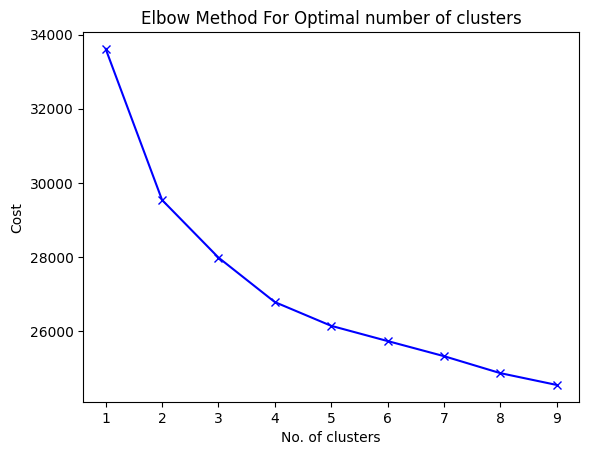

In [103]:
"""plt.plot(k, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title("Elbow Method For Optimal number of clusters")
plt.show()"""

Let's try with 6 clusters

In [162]:
"""from kmodes.kmodes import KModes

# Instantiate the k-modes model
km = KModes(n_clusters=6, init='Huang', n_init=15, verbose=1, n_jobs=1, random_state=0)

# Fit the model to your categorical data
clusters = km.fit_predict(x)"""

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2047, cost: 25602.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1834, cost: 25577.0
Run 2, iteration: 2/100, moves: 145, cost: 25577.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 1741, cost: 26135.0
Run 3, iteration: 2/100, moves: 132, cost: 26135.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 2138, cost: 25685.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 2352, cost: 25761.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 2147, cost: 25333.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, iteration: 1/100, m

In [163]:
"""from sklearn.preprocessing import LabelEncoder, OneHotEncoder


# Create an instance of LabelEncoder
le = LabelEncoder()

# Create an instance of OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform your categorical data using OneHotEncoder
data_encoder = encoder.fit_transform(x)

# Fit and transform your categorical data using LabelEncoder
df_data_encoder = x.apply(le.fit_transform)
df_data_encoder.sample(2)"""

/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,POSSESS_INTERNET,BOOKS,SCHOOL_PRIDE,TEACHER_FAIR,MEAN_TALK,ENJOY_LEARN_MATH,TEACHER_GOOD_EXPLAINER,DISORDER,JOB_INVOLVE_MATH,IMPORTANT_TO_DO_WELL
6222,1,1,0,0,2,0,0,3,0,0
3228,0,4,0,1,2,0,1,1,0,1


In [164]:
"""df_data_encoder['clusters'] = clusters
df_data_encoder.sample()"""

,POSSESS_INTERNET,BOOKS,SCHOOL_PRIDE,TEACHER_FAIR,MEAN_TALK,ENJOY_LEARN_MATH,TEACHER_GOOD_EXPLAINER,DISORDER,JOB_INVOLVE_MATH,IMPORTANT_TO_DO_WELL,clusters
2665,1,0,3,0,1,0,1,1,2,0,4


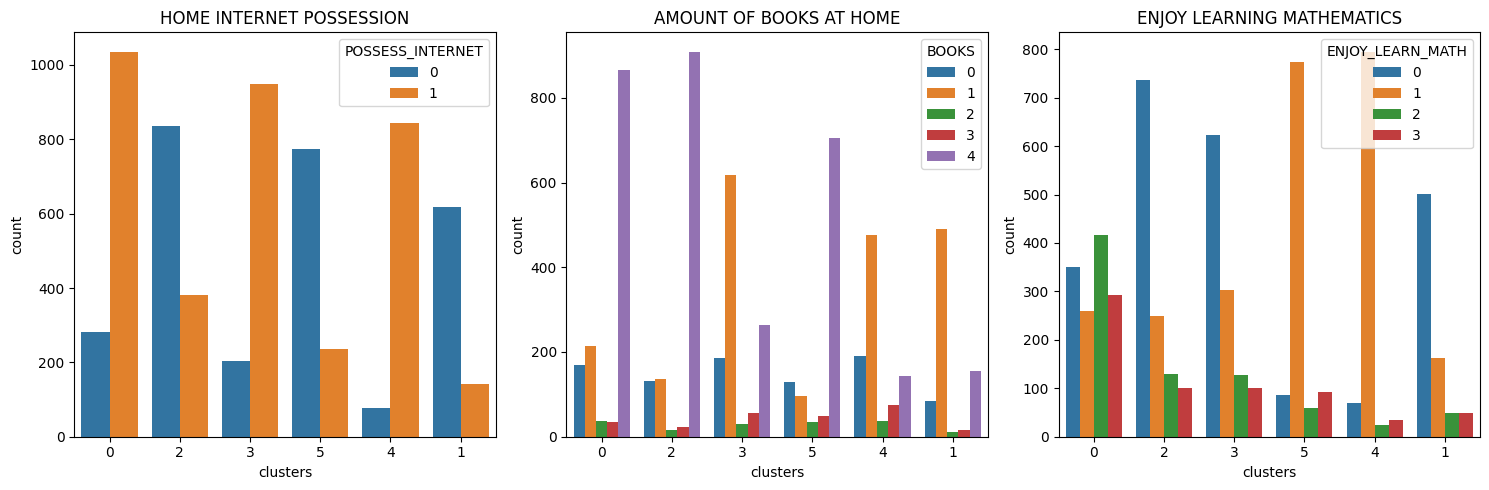

In [118]:
"""f, axs = plt.subplots(1,3,figsize = (15,5))
sns.countplot(x=df_data_encoder['clusters'],order=df_data_encoder['clusters'].value_counts().index,hue=df_data_encoder['POSSESS_INTERNET'],ax=axs[0])
sns.countplot(x=df_data_encoder['clusters'],order=df_data_encoder['clusters'].value_counts().index,hue=df_data_encoder['BOOKS'],ax=axs[1])
sns.countplot(x=df_data_encoder['clusters'],order=df_data_encoder['clusters'].value_counts().index,hue=df_data_encoder['ENJOY_LEARN_MATH'],ax=axs[2])


axs[0].set_title('HOME INTERNET POSSESSION')
axs[1].set_title('AMOUNT OF BOOKS AT HOME')
axs[2].set_title('ENJOY LEARNING MATHEMATICS')
plt.tight_layout()

plt.show()"""

<Axes: >

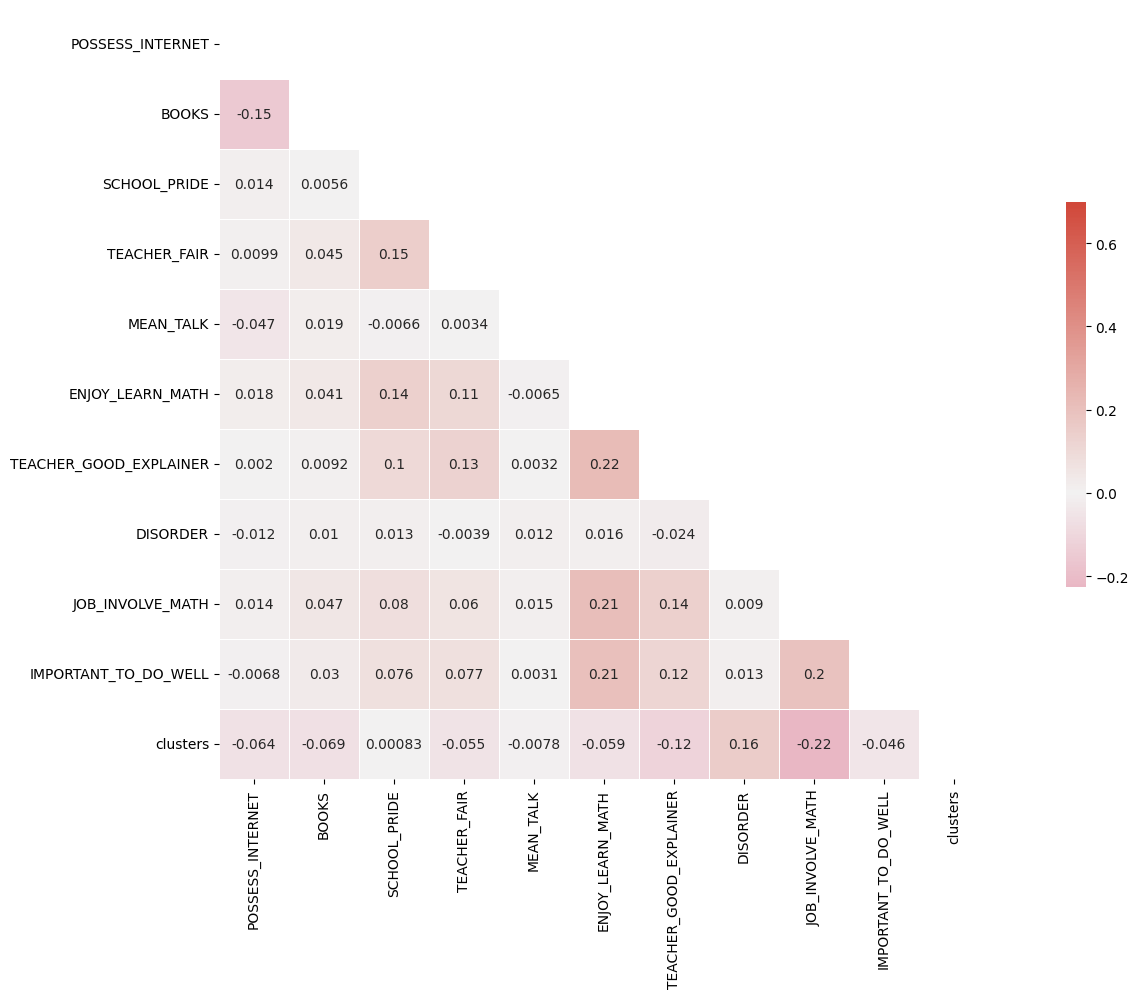

In [119]:
"""corr = df_data_encoder.corr()
cmap = sns.diverging_palette(2, 15, as_cmap=True)
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 10))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.7, center=0,annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})"""

In [160]:
"""from sklearn.metrics import silhouette_score
# Calculate the silhouette score
silhouette_avg = silhouette_score(data_encoder,clusters)
print("Silhouette Score:", silhouette_avg)"""

Silhouette Score: 0.03671359431679489


This value is near 0 which denotes overlapping clusters 

In [110]:
"""from sklearn.metrics import davies_bouldin_score

# Calculate the Davies-Bouldin Index
dbi = davies_bouldin_score(df_data_encoder,clusters)
print("davies_bouldin_score:", dbi)"""

davies_bouldin_score: 3.5306052009146214


In [166]:
"""df_data_encoder.describe()"""

,POSSESS_INTERNET,BOOKS,SCHOOL_PRIDE,TEACHER_FAIR,MEAN_TALK,ENJOY_LEARN_MATH,TEACHER_GOOD_EXPLAINER,DISORDER,JOB_INVOLVE_MATH,IMPORTANT_TO_DO_WELL,clusters
count,6382.000000,6382.000000,6382.00000,6382.000000,6382.000000,6382.000000,6382.000000,6382.000000,6382.000000,6382.000000,6382.000000
mean,0.562363,2.395957,0.93466,0.918051,1.543403,0.964588,1.085083,1.490755,1.200251,0.971169,2.253369
std,0.496134,1.632533,0.77633,0.862797,0.963808,0.956342,0.873866,1.130489,1.071059,0.723126,1.730435
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
50%,1.000000,3.000000,1.00000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
75%,1.000000,4.000000,1.00000,1.000000,2.000000,1.000000,1.000000,3.000000,2.000000,1.000000,4.000000
max,1.000000,4.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,5.000000


In [ ]:
"""from sklearn.manifold import TSNE
import seaborn as sns

# Perform t-SNE dimensionality reduction
tsne = TSNE(n_components=2, random_state=0)
tsne_data = tsne.fit_transform(df_data_encoder)

# Create a scatterplot to visualize clusters
sns.scatterplot(x=tsne_data[:, 0], y=tsne_data[:, 1], hue=clusters, palette='viridis')
plt.show()"""
